In [2]:
df = pd.read_csv("data/us_diseases.csv")
df.head()

,Unnamed: 0,disease,state,year,weeks_reporting,count,population
0,1,Hepatitis A,Alabama,1966,50,321,3345787.0
1,2,Hepatitis A,Alabama,1967,49,291,3364130.0
2,3,Hepatitis A,Alabama,1968,52,314,3386068.0
3,4,Hepatitis A,Alabama,1969,49,380,3412450.0
4,5,Hepatitis A,Alabama,1970,51,413,3444165.0


In [3]:
df2 = df[(df.disease == 'Measles') & (df.state == 'California')]
df2.head()

,Unnamed: 0,disease,state,year,weeks_reporting,count,population
2650,2651,Measles,California,1928,52,3698,5230775.0
2651,2652,Measles,California,1929,52,4024,5465979.0
2652,2653,Measles,California,1930,52,43416,5677251.0
2653,2654,Measles,California,1931,52,27807,5856343.0
2654,2655,Measles,California,1932,52,12618,6004994.0


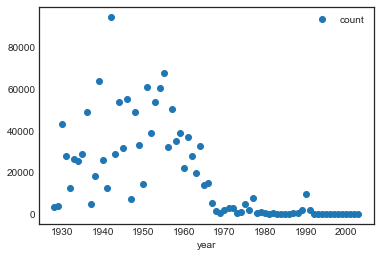

In [4]:
df2.plot(x='year', y='count', style='o')

In [272]:
df2

,Unnamed: 0,disease,state,year,weeks_reporting,count,population
2650,2651,Measles,California,1928,52,3698,5230775.0
2651,2652,Measles,California,1929,52,4024,5465979.0
2652,2653,Measles,California,1930,52,43416,5677251.0
2653,2654,Measles,California,1931,52,27807,5856343.0
2654,2655,Measles,California,1932,52,12618,6004994.0
2655,2656,Measles,California,1933,52,26551,6128552.0
2656,2657,Measles,California,1934,52,25650,6233386.0
2657,2658,Measles,California,1935,52,28799,6326636.0
2658,2659,Measles,California,1936,50,49050,6416022.0
2659,2660,Measles,California,1937,51,5107,6509758.0


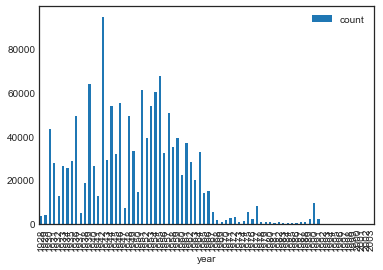

In [5]:
df2.plot(x="year", y=["count"], kind="bar")

In [6]:
population = np.asarray(df2['population'], float)
count = np.asarray(df2['count'], float)

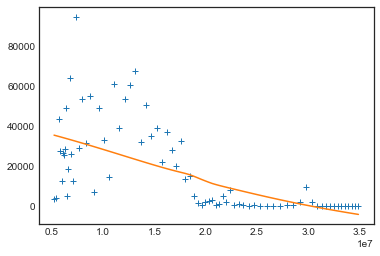

In [12]:

lowess_ = sm.nonparametric.lowess(df2['count'], df2['population'], frac=0.9)
plt.plot(df2['population'], df2['count'], '+')
plt.plot(lowess_[:, 0], lowess_[:, 1])
plt.show()

In [14]:
def lowess_bell_shape_kern(x, y, tau = .005):
    """lowess_bell_shape_kern(x, y, tau = .005) -> yest
    Locally weighted regression: fits a nonparametric regression curve to a scatterplot.
    The arrays x and y contain an equal number of elements; each pair
    (x[i], y[i]) defines a data point in the scatterplot. The function returns
    the estimated (smooth) values of y.
    The kernel function is the bell shaped function with parameter tau. Larger tau will result in a
    smoother curve. 
    """
    m = len(x)
    yest = np.zeros(m)


    #Initializing all weights from the bell shape kernel function 
    x = x.astype('float')
    w = np.array([np.exp(- (x - x[i])**2/(2*tau)) for i in range(m)])     
    
    #Looping through all x-points
    for i in range(m):
        weights = w[:, i]
        b = np.array([np.sum(weights * y), np.sum(weights * y * x)])
        A = np.array([[np.sum(weights), np.sum(weights * x)],
                    [np.sum(weights * x), np.sum(weights * x * x)]])
        
        theta = linalg.solve(A, b)
        
        yest[i] = theta[0] + theta[1] * x[i] 

    return yest

/opt/anaconda/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:24: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number1.099063e-30
/opt/anaconda/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:24: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number1.466384e-30
/opt/anaconda/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:24: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number9.609670e-31
/opt/anaconda/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:24: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number1.382427e-30
/opt/anaconda/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:24: LinAlgWarning: scipy.li

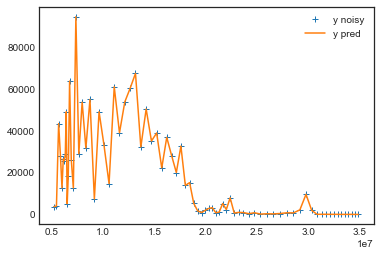

In [15]:

yest = lowess_bell_shape_kern(population, count, .9)

pl.clf()
pl.plot(population, count, '+', label='y noisy')
pl.plot(population, yest, label='y pred')
pl.legend()
pl.show()

In [149]:
def genData(numPoints, slope, intercept):
    
    x = np.zeros(shape=(numPoints, 2))
    y = np.zeros(shape=numPoints)
    
    x[:,0] = 1
    x[:,1] = np.random.uniform(-2, 2, size = numPoints)
    
    for i in range(0, numPoints): y[i] = (x[i][1] * slope) + (intercept + np.random.normal(0,4))
    
    return x, y



In [270]:
def gradient_descent(loss_measure, x, y, alpha, m, n, delta=2):
    """
    loss_type: string
    n: number of iterations
    """
    xT = x.transpose()
    theta = np.ones(2)
    for i in range(n):
        hypothesis = np.dot(x, theta)
        loss = hypothesis - y
        if loss_measure == 'quadratic_loss':
            loss = loss
        elif loss_measure == 'mean_absolute_error':
            loss[loss>0] = 1
            loss[loss<0] = -1
        elif loss_measure == 'huber_loss':
            loss[abs(loss) <= delta] = loss[abs(loss) <= delta]
            loss[abs(loss) > delta] = delta * np.sign(loss[abs(loss) > delta])
        gradient = np.dot(xT, loss) / m
        
        #print(loss)
        theta = theta - alpha * gradient
    return theta

In [154]:
x

array([[ 1.        , -0.42164789],
       [ 1.        , -1.595014  ],
       [ 1.        ,  0.96954846],
       [ 1.        , -1.88428307],
       [ 1.        , -0.32421342]])

In [194]:
x, y = genData(50, 3, 5)
m = len(x)
yest = np.zeros(m)
numIterations = 5000
alpha = .01
thetasss = gradient_descent('quadratic_loss', x, y, alpha, m , numIterations)
thetasss

array([ 4.98590286,  2.21426978])

In [242]:
def lowess_bell_shape_kern(x, y, tau = .5):
    """lowess_bell_shape_kern(x, y, tau = .005) -> yest
    Locally weighted regression: fits a nonparametric regression curve to a scatterplot.
    The arrays x and y contain an equal number of elements; each pair
    (x[i], y[i]) defines a data point in the scatterplot. The function returns
    the estimated (smooth) values of y.
    The kernel function is the bell shaped function with parameter tau. Larger tau will result in a
    smoother curve. 
    """
    m = len(x)
    yest = np.zeros(m)
    numIterations = 1000
    alpha = .01

    #Initializing all weights from the bell shape kernel function
    x = x.astype('float')
    #x = x[:,1]
    w = np.array([np.exp(- (x - x[i])**2/(2*tau)) for i in range(m)])     
    
    #Looping through all x-points
    for i in range(m):
        weights = w[:, i]
        b = np.array([np.sum(weights * y), np.sum(weights * y * x)])
        A = np.array([[np.sum(weights), np.sum(weights * x)],
                    [np.sum(weights * x), np.sum(weights * x * x)]])

        
        #theta = linalg.solve(A, b)
        theta = gradient_descent('quadratic_loss', A, b, alpha, m , numIterations)
        
        yest[i] = theta[0] + theta[1] * x[i] 

    return yest

In [256]:
values = population
population_ = (values - values.min()) / (values.max() - values.min())

values = count
count_ = (values - values.min()) / (values.max() - values.min())

In [269]:
yest = lowess_bell_shape_kern(population_,count_, .9)

[ 76.90883561  39.22513227]
[ 16.25177712  13.2826578 ]
[ 2.05860169  7.19499419]
[-1.25768157  5.75527459]
[-2.02777242  5.40366305]
[-2.2018373   5.30682328]
[-2.23639835  5.26967608]
[-2.23832454  5.24655442]
[-2.2326332   5.22676771]
[-2.22518063  5.20781319]
[-2.2173377   5.18910478]
[-2.20942523  5.1705051 ]
[-2.20151824  5.15198181]
[-2.19363423  5.13352716]
[-2.1857772   5.11513914]
[-2.17794802  5.09681711]
[-2.17014682  5.07856074]
[-2.16237355  5.06036977]
[-2.15462811  5.04224396]
[-2.14691042  5.02418308]
[-2.13922037  5.00618688]
[-2.13155787  4.98825515]
[-2.12392281  4.97038765]
[-2.1163151   4.95258415]
[-2.10873464  4.93484442]
[-2.10118133  4.91716823]
[-2.09365508  4.89955536]
[-2.08615579  4.88200557]
[-2.07868336  4.86451864]
[-2.07123769  4.84709436]
[-2.0638187   4.82973248]
[-2.05642628  4.81243279]
[-2.04906034  4.79519507]
[-2.04172078  4.7780191 ]
[-2.03440751  4.76090464]
[-2.02712044  4.74385149]
[-2.01985946  4.72685942]
[-2.0126245   4.70992822]
[-2.0054

[-0.59844488  1.40047605]
[-0.5963013   1.39545966]
[-0.5941654   1.39046125]
[-0.59203715  1.38548074]
[-0.58991652  1.38051806]
[-0.58780349  1.37557317]
[-0.58569803  1.37064598]
[-0.58360011  1.36573644]
[-0.58150971  1.36084449]
[-0.57942679  1.35597007]
[-0.57735133  1.3511131 ]
[-0.57528331  1.34627353]
[-0.57322269  1.34145129]
[-0.57116946  1.33664633]
[-0.56912358  1.33185857]
[-0.56708503  1.32708797]
[-0.56505378  1.32233446]
[-0.5630298   1.31759797]
[-0.56101308  1.31287844]
[-0.55900358  1.30817583]
[-0.55700127  1.30349005]
[-0.55500614  1.29882106]
[-0.55301816  1.2941688 ]
[-0.5510373  1.2895332]
[-0.54906353  1.2849142 ]
[-0.54709683  1.28031175]
[-0.54513718  1.27572578]
[-0.54318454  1.27115624]
[-0.5412389   1.26660307]
[-0.53930023  1.2620662 ]
[-0.5373685   1.25754559]
[-0.53544369  1.25304117]
[-0.53352578  1.24855289]
[-0.53161474  1.24408068]
[-0.52971054  1.23962449]
[-0.52781316  1.23518426]
[-0.52592258  1.23075993]
[-0.52403877  1.22635146]
[-0.52216171  

[-0.15141107  0.35433101]
[-0.15086873  0.35306183]
[-0.15032833  0.35179719]
[-0.14978987  0.35053708]
[-0.14925333  0.34928149]
[-0.14871872  0.34803039]
[-0.14818602  0.34678378]
[-0.14765523  0.34554163]
[-0.14712634  0.34430393]
[-0.14659935  0.34307066]
[-0.14607424  0.34184181]
[-0.14555102  0.34061736]
[-0.14502967  0.3393973 ]
[-0.14451018  0.33818161]
[-0.14399256  0.33697027]
[-0.14347679  0.33576327]
[-0.14296287  0.3345606 ]
[-0.14245079  0.33336223]
[-0.14194054  0.33216816]
[-0.14143212  0.33097836]
[-0.14092553  0.32979282]
[-0.14042074  0.32861153]
[-0.13991777  0.32743447]
[-0.13941659  0.32626163]
[-0.13891722  0.32509299]
[-0.13841963  0.32392854]
[-0.13792382  0.32276825]
[-0.13742979  0.32161212]
[-0.13693753  0.32046014]
[-0.13644703  0.31931228]
[-0.13595829  0.31816853]
[-0.1354713   0.31702887]
[-0.13498605  0.3158933 ]
[-0.13450254  0.3147618 ]
[-0.13402076  0.31363435]
[-0.13354071  0.31251094]
[-0.13306238  0.31139155]
[-0.13258576  0.31027618]
[-0.13211085

[-1.402342    3.27476128]
[-1.39727962  3.26293956]
[-1.39223552  3.25116052]
[-1.38720962  3.23942401]
[-1.38220187  3.22772986]
[-1.37721219  3.21607792]
[-1.37224053  3.20446805]
[-1.36728682  3.19290009]
[-1.36235098  3.18137389]
[-1.35743297  3.1698893 ]
[-1.35253271  3.15844617]
[-1.34765014  3.14704435]
[-1.34278519  3.13568369]
[-1.33793781  3.12436403]
[-1.33310792  3.11308525]
[-1.32829547  3.10184717]
[-1.3235004   3.09064967]
[-1.31872263  3.07949259]
[-1.31396211  3.06837578]
[-1.30921878  3.05729911]
[-1.30449257  3.04626242]
[-1.29978342  3.03526558]
[-1.29509127  3.02430843]
[-1.29041606  3.01339084]
[-1.28575773  3.00251266]
[-1.28111621  2.99167375]
[-1.27649145  2.98087396]
[-1.27188338  2.97011317]
[-1.26729195  2.95939122]
[-1.26271709  2.94870797]
[-1.25815875  2.93806329]
[-1.25361687  2.92745704]
[-1.24909138  2.91688907]
[-1.24458222  2.90635926]
[-1.24008935  2.89586746]
[-1.23561269  2.88541353]
[-1.23115219  2.87499734]
[-1.2267078   2.86461875]
[-1.22227945

[-0.24804391  0.57923431]
[-0.24714849  0.5771433 ]
[-0.24625629  0.57505985]
[-0.24536732  0.57298391]
[-0.24448156  0.57091547]
[-0.24359899  0.56885449]
[-0.24271961  0.56680096]
[-0.24184341  0.56475484]
[-0.24097037  0.5627161 ]
[-0.24010048  0.56068473]
[-0.23923373  0.55866069]
[-0.23837011  0.55664395]
[-0.2375096  0.5546345]
[-0.23665221  0.5526323 ]
[-0.2357979   0.55063732]
[-0.23494669  0.54864955]
[-0.23409854  0.54666895]
[-0.23325346  0.54469551]
[-0.23241143  0.54272919]
[-0.23157243  0.54076996]
[-0.23073647  0.53881781]
[-0.22990352  0.53687271]
[-0.22907358  0.53493463]
[-0.22824664  0.53300354]
[-0.22742268  0.53107943]
[-0.2266017   0.52916226]
[-0.22578368  0.52725201]
[-0.22496861  0.52534866]
[-0.22415649  0.52345218]
[-0.22334729  0.52156254]
[-0.22254102  0.51967973]
[-0.22173766  0.51780371]
[-0.2209372   0.51593447]
[-0.22013963  0.51407197]
[-0.21934493  0.5122162 ]
[-0.21855311  0.51036713]
[-0.21776415  0.50852473]
[-0.21697803  0.50668898]
[-0.21619475  

[-0.96469072  2.24845032]
[-0.9611842   2.24027751]
[-0.95769043  2.23213442]
[-0.95420936  2.22402092]
[-0.95074094  2.21593691]
[-0.94728513  2.20788229]
[-0.94384188  2.19985694]
[-0.94041114  2.19186077]
[-0.93699288  2.18389366]
[-0.93358704  2.17595551]
[-0.93019358  2.16804621]
[-0.92681246  2.16016566]
[-0.92344362  2.15231376]
[-0.92008703  2.1444904 ]
[-0.91674264  2.13669547]
[-0.91341041  2.12892888]
[-0.91009029  2.12119052]
[-0.90678224  2.11348029]
[-0.90348621  2.10579808]
[-0.90020216  2.0981438 ]
[-0.89693005  2.09051733]
[-0.89366984  2.08291859]
[-0.89042147  2.07534747]
[-0.88718491  2.06780387]
[-0.88396012  2.06028769]
[-0.88074705  2.05279883]
[-0.87754565  2.0453372 ]
[-0.8743559   2.03790268]
[-0.87117774  2.03049519]
[-0.86801112  2.02311462]
[-0.86485602  2.01576088]
[-0.86171239  2.00843387]
[-0.85858019  2.00113349]
[-0.85545937  1.99385964]
[-0.85234989  1.98661224]
[-0.84925172  1.97939118]
[-0.84616481  1.97219637]
[-0.84308912  1.96502771]
[-0.8400246 

[-0.19221805  0.44801171]
[-0.19151937  0.44638325]
[-0.19082322  0.44476071]
[-0.1901296   0.44314407]
[-0.18943851  0.4415333 ]
[-0.18874993  0.43992839]
[-0.18806385  0.43832931]
[-0.18738026  0.43673604]
[-0.18669916  0.43514857]
[-0.18602053  0.43356686]
[-0.18534437  0.43199091]
[-0.18467067  0.43042068]
[-0.18399942  0.42885616]
[-0.18333061  0.42729733]
[-0.18266423  0.42574416]
[-0.18200027  0.42419664]
[-0.18133872  0.42265475]
[-0.18067958  0.42111845]
[-0.18002284  0.41958775]
[-0.17936848  0.4180626 ]
[-0.1787165  0.416543 ]
[-0.17806689  0.41502893]
[-0.17741964  0.41352036]
[-0.17677475  0.41201727]
[-0.17613219  0.41051964]
[-0.17549198  0.40902746]
[-0.17485409  0.4075407 ]
[-0.17421852  0.40605935]
[-0.17358526  0.40458338]
[-0.1729543   0.40311277]
[-0.17232563  0.40164751]
[-0.17169926  0.40018758]
[-0.17107515  0.39873296]
[-0.17045332  0.39728362]
[-0.16983374  0.39583955]
[-0.16921642  0.39440072]
[-0.16860134  0.39296713]
[-0.1679885   0.39153875]
[-0.16737789  

[-1.329759    3.09431812]
[-1.3248977   3.08300598]
[-1.32005417  3.0717352 ]
[-1.31522834  3.06050562]
[-1.31042016  3.04931709]
[-1.30562956  3.03816946]
[-1.30085647  3.02706259]
[-1.29610082  3.01599633]
[-1.29136257  3.00497051]
[-1.28664163  2.99398501]
[-1.28193796  2.98303967]
[-1.27725148  2.97213434]
[-1.27258213  2.96126887]
[-1.26792985  2.95044313]
[-1.26329458  2.93965697]
[-1.25867626  2.92891024]
[-1.25407482  2.91820279]
[-1.2494902   2.90753449]
[-1.24492234  2.89690519]
[-1.24037118  2.88631475]
[-1.23583666  2.87576303]
[-1.23131872  2.86524988]
[-1.22681729  2.85477516]
[-1.22233232  2.84433874]
[-1.21786374  2.83394047]
[-1.21341151  2.82358021]
[-1.20897554  2.81325783]
[-1.2045558   2.80297319]
[-1.20015221  2.79272614]
[-1.19576472  2.78251655]
[-1.19139327  2.77234429]
[-1.1870378   2.76220922]
[-1.18269825  2.7521112 ]
[-1.17837457  2.74205009]
[-1.1740667   2.73202576]
[-1.16977457  2.72203808]
[-1.16549813  2.71208692]
[-1.16123733  2.70217213]
[-1.15699211

[-0.26932352  0.62670954]
[-0.26833894  0.62441843]
[-0.26735795  0.6221357 ]
[-0.26638055  0.61986131]
[-0.26540672  0.61759523]
[-0.26443645  0.61533744]
[-0.26346973  0.6130879 ]
[-0.26250654  0.61084659]
[-0.26154688  0.60861347]
[-0.26059072  0.60638852]
[-0.25963806  0.60417169]
[-0.25868888  0.60196298]
[-0.25774317  0.59976233]
[-0.25680092  0.59756974]
[-0.25586211  0.59538515]
[-0.25492674  0.59320856]
[-0.25399478  0.59103992]
[-0.25306623  0.58887921]
[-0.25214108  0.5867264 ]
[-0.25121931  0.58458146]
[-0.25030091  0.58244436]
[-0.24938586  0.58031507]
[-0.24847416  0.57819357]
[-0.2475658   0.57607982]
[-0.24666075  0.5739738 ]
[-0.24575901  0.57187548]
[-0.24486057  0.56978483]
[-0.24396542  0.56770182]
[-0.24307353  0.56562643]
[-0.24218491  0.56355863]
[-0.24129954  0.56149838]
[-0.2404174   0.55944567]
[-0.23953849  0.55740046]
[-0.23866279  0.55536273]
[-0.23779029  0.55333245]
[-0.23692098  0.55130959]
[-0.23605485  0.54929412]
[-0.23519189  0.54728602]
[-0.23433208

[-0.07724707  0.17975212]
[-0.07696467  0.17909498]
[-0.0766833   0.17844025]
[-0.07640296  0.17778791]
[-0.07612365  0.17713796]
[-0.07584536  0.17649038]
[-0.07556809  0.17584517]
[-0.07529183  0.17520232]
[-0.07501658  0.17456182]
[-0.07474233  0.17392366]
[-0.07446909  0.17328784]
[-0.07419685  0.17265433]
[-0.0739256   0.17202315]
[-0.07365535  0.17139427]
[-0.07338608  0.17076769]
[-0.0731178  0.1701434]
[-0.07285049  0.1695214 ]
[-0.07258417  0.16890166]
[-0.07231882  0.1682842 ]
[-0.07205444  0.16766899]
[-0.07179102  0.16705603]
[-0.07152857  0.16644531]
[-0.07126708  0.16583682]
[-0.07100654  0.16523056]
[-0.07074696  0.16462651]
[-0.07048832  0.16402467]
[-0.07023063  0.16342504]
[-0.06997388  0.16282759]
[-0.06971807  0.16223233]
[-0.0694632   0.16163924]
[-0.06920926  0.16104833]
[-0.06895624  0.16045957]
[-0.06870416  0.15987296]
[-0.06845299  0.1592885 ]
[-0.06820274  0.15870618]
[-0.06795341  0.15812599]
[-0.06770498  0.15754791]
[-0.06745747  0.15697195]
[-0.06721086  

[-0.84291101  1.95880261]
[-0.839815    1.95160794]
[-0.83673036  1.9444397 ]
[-0.83365706  1.93729778]
[-0.83059504  1.9301821 ]
[-0.82754427  1.92309255]
[-0.82450471  1.91602905]
[-0.82147631  1.90899148]
[-0.81845903  1.90197977]
[-0.81545283  1.89499381]
[-0.81245768  1.88803351]
[-0.80947353  1.88109878]
[-0.80650034  1.87418951]
[-0.80353807  1.86730563]
[-0.80058668  1.86044702]
[-0.79764613  1.85361361]
[-0.79471638  1.8468053 ]
[-0.79179739  1.840022  ]
[-0.78888912  1.83326361]
[-0.78599154  1.82653004]
[-0.7831046   1.81982121]
[-0.78022826  1.81313702]
[-0.77736248  1.80647738]
[-0.77450724  1.7998422 ]
[-0.77166248  1.79323139]
[-0.76882816  1.78664486]
[-0.76600426  1.78008253]
[-0.76319073  1.77354429]
[-0.76038754  1.76703008]
[-0.75759464  1.76053979]
[-0.754812    1.75407334]
[-0.75203958  1.74763063]
[-0.74927734  1.7412116 ]
[-0.74652525  1.73481614]
[-0.74378327  1.72844417]
[-0.74105136  1.72209561]
[-0.73832948  1.71577036]
[-0.7356176   1.70946835]
[-0.73291568

[-0.17450021  0.40551312]
[-0.17385927  0.40402367]
[-0.17322069  0.4025397 ]
[-0.17258445  0.40106117]
[-0.17195055  0.39958807]
[-0.17131898  0.39812039]
[-0.17068972  0.3966581 ]
[-0.17006278  0.39520117]
[-0.16943814  0.3937496 ]
[-0.1688158   0.39230336]
[-0.16819574  0.39086243]
[-0.16757795  0.3894268 ]
[-0.16696244  0.38799644]
[-0.16634919  0.38657133]
[-0.16573819  0.38515145]
[-0.16512943  0.3837368 ]
[-0.16452292  0.38232733]
[-0.16391862  0.38092305]
[-0.16331655  0.37952392]
[-0.16271669  0.37812993]
[-0.16211903  0.37674106]
[-0.16152357  0.37535729]
[-0.1609303   0.37397861]
[-0.1603392   0.37260499]
[-0.15975028  0.37123641]
[-0.15916351  0.36987286]
[-0.15857891  0.36851432]
[-0.15799645  0.36716077]
[-0.15741613  0.36581219]
[-0.15683794  0.36446857]
[-0.15626187  0.36312988]
[-0.15568793  0.3617961 ]
[-0.15511609  0.36046723]
[-0.15454634  0.35914323]
[-0.1539787  0.3578241]
[-0.15341313  0.35650982]
[-0.15284965  0.35520036]
[-0.15228823  0.35389571]
[-0.15172888  

[-0.5383127   1.24956638]
[-0.53632783  1.24495898]
[-0.53435028  1.24036857]
[-0.53238003  1.23579508]
[-0.53041703  1.23123845]
[-0.52846128  1.22669863]
[-0.52651274  1.22217554]
[-0.52457138  1.21766914]
[-0.52263718  1.21317934]
[-0.52071011  1.20870611]
[-0.51879015  1.20424936]
[-0.51687726  1.19980905]
[-0.51497143  1.19538512]
[-0.51307263  1.19097749]
[-0.51118083  1.18658612]
[-0.509296    1.18221094]
[-0.50741812  1.17785189]
[-0.50554717  1.17350891]
[-0.50368312  1.16918194]
[-0.50182593  1.16487094]
[-0.4999756   1.16057582]
[-0.49813209  1.15629654]
[-0.49629538  1.15203305]
[-0.49446544  1.14778527]
[-0.49264224  1.14355315]
[-0.49082577  1.13933664]
[-0.489016    1.13513568]
[-0.4872129   1.13095021]
[-0.48541645  1.12678016]
[-0.48362662  1.1226255 ]
[-0.48184339  1.11848615]
[-0.48006674  1.11436207]
[-0.47829663  1.11025319]
[-0.47653306  1.10615946]
[-0.47477598  1.10208083]
[-0.47302539  1.09801724]
[-0.47128125  1.09396863]
[-0.46954354  1.08993494]
[-0.46781224

[-1.15622038  2.68135769]
[-1.15194331  2.67143886]
[-1.14768206  2.66155673]
[-1.14343657  2.65171114]
[-1.13920679  2.64190198]
[-1.13499266  2.6321291 ]
[-1.13079412  2.62239238]
[-1.1266111   2.61269167]
[-1.12244356  2.60302685]
[-1.11829144  2.59339778]
[-1.11415468  2.58380433]
[-1.11003322  2.57424637]
[-1.105927    2.56472376]
[-1.10183597  2.55523638]
[-1.09776008  2.54578409]
[-1.09369927  2.53636678]
[-1.08965348  2.52698429]
[-1.08562265  2.51763652]
[-1.08160673  2.50832332]
[-1.07760567  2.49904458]
[-1.07361941  2.48980016]
[-1.0696479   2.48058993]
[-1.06569108  2.47141378]
[-1.06174889  2.46227157]
[-1.05782129  2.45316318]
[-1.05390822  2.44408848]
[-1.05000962  2.43504735]
[-1.04612544  2.42603967]
[-1.04225563  2.41706531]
[-1.03840014  2.40812414]
[-1.03455891  2.39921605]
[-1.03073189  2.39034091]
[-1.02691902  2.38149861]
[-1.02312026  2.37268901]
[-1.01933555  2.363912  ]
[-1.01556484  2.35516746]
[-1.01180808  2.34645527]
[-1.00806522  2.3377753 ]
[-1.00433621

[-0.20407437  0.47326304]
[-0.20331946  0.47151236]
[-0.20256734  0.46976815]
[-0.20181801  0.46803039]
[-0.20107145  0.46629906]
[-0.20032765  0.46457414]
[-0.1995866   0.46285559]
[-0.19884829  0.4611434 ]
[-0.19811272  0.45943755]
[-0.19737986  0.45773801]
[-0.19664972  0.45604475]
[-0.19592227  0.45435776]
[-0.19519752  0.45267701]
[-0.19447545  0.45100247]
[-0.19375605  0.44933413]
[-0.19303931  0.44767196]
[-0.19232522  0.44601594]
[-0.19161378  0.44436605]
[-0.19090496  0.44272226]
[-0.19019877  0.44108455]
[-0.18949519  0.43945289]
[-0.18879421  0.43782728]
[-0.18809583  0.43620768]
[-0.18740003  0.43459406]
[-0.1867068   0.43298642]
[-0.18601614  0.43138473]
[-0.18532803  0.42978896]
[-0.18464247  0.42819909]
[-0.18395944  0.4266151 ]
[-0.18327895  0.42503697]
[-0.18260096  0.42346468]
[-0.18192549  0.42189821]
[-0.18125251  0.42033753]
[-0.18058203  0.41878263]
[-0.17991402  0.41723348]
[-0.17924849  0.41569005]
[-0.17858541  0.41415234]
[-0.17792479  0.41262031]
[-0.17726662

[-1.21325001  2.8112499 ]
[-1.20874911  2.80082078]
[-1.20426492  2.79043035]
[-1.19979736  2.78007846]
[-1.19534638  2.76976498]
[-1.1909119   2.75948976]
[-1.18649388  2.74925266]
[-1.18209225  2.73905353]
[-1.17770694  2.72889224]
[-1.17333791  2.71876865]
[-1.16898508  2.70868261]
[-1.1646484   2.69863399]
[-1.16032781  2.68862265]
[-1.15602325  2.67864845]
[-1.15173466  2.66871125]
[-1.14746197  2.65881091]
[-1.14320514  2.64894731]
[-1.1389641   2.63912029]
[-1.13473879  2.62932973]
[-1.13052916  2.6195755 ]
[-1.12633514  2.60985744]
[-1.12215669  2.60017544]
[-1.11799373  2.59052936]
[-1.11384622  2.58091907]
[-1.10971409  2.57134442]
[-1.1055973  2.5618053]
[-1.10149577  2.55230156]
[-1.09740946  2.54283308]
[-1.09333831  2.53339972]
[-1.08928227  2.52400137]
[-1.08524127  2.51463787]
[-1.08121526  2.50530912]
[-1.07720419  2.49601497]
[-1.073208   2.4867553]
[-1.06922663  2.47752998]
[-1.06526003  2.46833889]
[-1.06130815  2.45918189]
[-1.05737093  2.45005886]
[-1.05344832  2.

[-0.21228619  0.49189329]
[-0.21149866  0.49006847]
[-0.21071404  0.48825043]
[-0.20993234  0.48643912]
[-0.20915354  0.48463454]
[-0.20837762  0.48283665]
[-0.20760459  0.48104543]
[-0.20683442  0.47926086]
[-0.20606711  0.47748291]
[-0.20530265  0.47571155]
[-0.20454102  0.47394677]
[-0.20378222  0.47218853]
[-0.20302623  0.47043681]
[-0.20227304  0.46869159]
[-0.20152266  0.46695285]
[-0.20077505  0.46522056]
[-0.20003022  0.46349469]
[-0.19928815  0.46177523]
[-0.19854884  0.46006214]
[-0.19781226  0.45835541]
[-0.19707842  0.45665501]
[-0.19634731  0.45496092]
[-0.1956189   0.45327312]
[-0.1948932   0.45159157]
[-0.19417019  0.44991627]
[-0.19344986  0.44824718]
[-0.1927322   0.44658428]
[-0.19201721  0.44492755]
[-0.19130486  0.44327696]
[-0.19059516  0.4416325 ]
[-0.1898881   0.43999414]
[-0.18918365  0.43836186]
[-0.18848182  0.43673563]
[-0.1877826   0.43511544]
[-0.18708597  0.43350126]
[-0.18639192  0.43189306]
[-0.18570045  0.43029083]
[-0.18501154  0.42869455]
[-0.18432518

[-1.20869653  2.79844493]
[-1.20420031  2.78803502]
[-1.19972082  2.77766384]
[-1.19525799  2.76733124]
[-1.19081177  2.75703708]
[-1.18638208  2.7467812 ]
[-1.18196887  2.73656348]
[-1.17757208  2.72638377]
[-1.17319164  2.71624192]
[-1.16882749  2.7061378 ]
[-1.16447959  2.69607127]
[-1.16014785  2.68604218]
[-1.15583223  2.6760504 ]
[-1.15153266  2.66609579]
[-1.14724909  2.65617821]
[-1.14298145  2.64629752]
[-1.13872968  2.63645359]
[-1.13449374  2.62664627]
[-1.13027354  2.61687544]
[-1.12606905  2.60714095]
[-1.1218802   2.59744268]
[-1.11770693  2.58778048]
[-1.11354918  2.57815422]
[-1.1094069   2.56856377]
[-1.10528003  2.559009  ]
[-1.10116851  2.54948977]
[-1.09707229  2.54000595]
[-1.0929913   2.53055741]
[-1.08892549  2.52114402]
[-1.08487481  2.51176564]
[-1.0808392   2.50242215]
[-1.0768186   2.49311342]
[-1.07281295  2.48383931]
[-1.0688222  2.4745997]
[-1.0648463   2.46539447]
[-1.06088519  2.45622347]
[-1.05693882  2.44708659]
[-1.05300712  2.4379837 ]
[-1.04909005  

[-0.0608483   0.14087955]
[-0.06062196  0.1403555 ]
[-0.06039645  0.13983339]
[-0.06017178  0.13931323]
[-0.05994795  0.138795  ]
[-0.05972495  0.13827869]
[-0.05950278  0.13776431]
[-0.05928143  0.13725185]
[-0.05906091  0.13674128]
[-0.05884121  0.13623262]
[-0.05862233  0.13572585]
[-0.05840426  0.13522097]
[-0.05818701  0.13471796]
[-0.05797056  0.13421682]
[-0.05775491  0.13371755]
[-0.05754007  0.13322014]
[-0.05732603  0.13272457]
[-0.05711278  0.13223085]
[-0.05690033  0.13173897]
[ 78.74029476  40.51647847]
[ 13.93657556  12.47884056]
[ 0.92898329  6.83181737]
[-1.67636853  5.68158355]
[-2.1926543  5.4345045]
[-2.28941684  5.36886688]
[-2.30195194  5.33972807]
[-2.2975973   5.31797887]
[-2.28987631  5.29777304]
[-2.28150479  5.27793625]
[-2.27302807  5.25823244]
[-2.26455557  5.23861397]
[-2.25610918  5.21907107]
[-2.24769319  5.19960155]
[-2.23930838  5.18020475]
[-2.2309548   5.16088033]
[-2.22263237  5.14162801]
[-2.21434098  5.1224475 ]
[-2.20608053  5.10333855]
[-2.197850

[-0.45738397  1.05806892]
[-0.45567773  1.05412186]
[-0.45397785  1.05018953]
[-0.45228432  1.04627187]
[-0.4505971   1.04236882]
[-0.44891618  1.03848033]
[-0.44724153  1.03460635]
[-0.44557312  1.03074681]
[-0.44391094  1.02690168]
[-0.44225496  1.02307089]
[-0.44060516  1.01925439]
[-0.43896151  1.01545213]
[-0.43732399  1.01166405]
[-0.43569258  1.00789011]
[-0.43406726  1.00413024]
[-0.432448   1.0003844]
[-0.43083478  0.99665253]
[-0.42922758  0.99293458]
[-0.42762637  0.98923051]
[-0.42603114  0.98554025]
[-0.42444186  0.98186375]
[-0.42285851  0.97820098]
[-0.42128106  0.97455186]
[-0.4197095   0.97091636]
[-0.4181438   0.96729442]
[-0.41658394  0.96368599]
[-0.41502991  0.96009102]
[-0.41348166  0.95650947]
[-0.4119392   0.95294127]
[-0.41040249  0.94938639]
[-0.40887151  0.94584476]
[-0.40734624  0.94231635]
[-0.40582666  0.9388011 ]
[-0.40431275  0.93529897]
[-0.40280449  0.9318099 ]
[-0.40130185  0.92833384]
[-0.39980482  0.92487075]
[-0.39831338  0.92142058]
[-0.39682749  

[-0.09307324  0.21530685]
[-0.09272604  0.21450366]
[-0.09238013  0.21370347]
[-0.09203551  0.21290627]
[-0.09169218  0.21211203]
[-0.09135013  0.21132076]
[-0.09100935  0.21053244]
[-0.09066985  0.20974707]
[-0.09033161  0.20896462]
[-0.08999463  0.20818509]
[-0.08965891  0.20740847]
[-0.08932445  0.20663475]
[-0.08899123  0.20586391]
[-0.08865925  0.20509595]
[-0.08832851  0.20433085]
[-0.08799901  0.20356861]
[-0.08767074  0.20280921]
[-0.08734369  0.20205264]
[-0.08701786  0.2012989 ]
[-0.08669324  0.20054796]
[-0.08636984  0.19979983]
[-0.08604764  0.19905449]
[-0.08572665  0.19831193]
[-0.08540685  0.19757214]
[-0.08508824  0.19683511]
[-0.08477083  0.19610083]
[-0.0844546   0.19536929]
[-0.08413954  0.19464048]
[-0.08382567  0.19391439]
[-0.08351296  0.193191  ]
[-0.08320142  0.19247032]
[-0.08289104  0.19175232]
[-0.08258182  0.191037  ]
[-0.08227376  0.19032435]
[-0.08196684  0.18961436]
[-0.08166107  0.18890701]
[-0.08135644  0.18820231]
[-0.08105294  0.18750023]
[-0.08075058

[-0.20058344  0.46356522]
[-0.19983278  0.46183039]
[-0.19908493  0.46010204]
[-0.19833988  0.45838017]
[-0.19759761  0.45666473]
[-0.19685813  0.45495572]
[-0.19612141  0.45325311]
[-0.19538745  0.45155686]
[-0.19465624  0.44986696]
[-0.19392776  0.44818339]
[-0.19320201  0.44650612]
[-0.19247897  0.44483513]
[-0.19175865  0.44317038]
[-0.19104101  0.44151187]
[-0.19032606  0.43985957]
[-0.18961379  0.43821345]
[-0.18890419  0.43657349]
[-0.18819723  0.43493966]
[-0.18749293  0.43331196]
[-0.18679126  0.43169034]
[-0.18609222  0.43007479]
[-0.18539579  0.42846529]
[-0.18470197  0.42686181]
[-0.18401074  0.42526433]
[-0.18332211  0.42367283]
[-0.18263604  0.42208729]
[-0.18195255  0.42050768]
[-0.18127162  0.41893398]
[-0.18059323  0.41736617]
[-0.17991738  0.41580423]
[-0.17924406  0.41424813]
[-0.17857326  0.41269786]
[-0.17790497  0.41115339]
[-0.17723919  0.40961469]
[-0.17657589  0.40808176]
[-0.17591508  0.40655456]
[-0.17525674  0.40503308]
[-0.17460086  0.4035173 ]
[-0.17394744

[-1.70211017  3.9291552 ]
[-1.69571582  3.91439445]
[-1.68934548  3.89968915]
[-1.68299908  3.8850391 ]
[-1.67667652  3.87044408]
[-1.67037771  3.85590389]
[-1.66410256  3.84141833]
[-1.65785099  3.82698718]
[-1.6516229   3.81261025]
[-1.64541821  3.79828733]
[-1.63923683  3.78401821]
[-1.63307867  3.7698027 ]
[-1.62694364  3.7556406 ]
[-1.62083167  3.74153169]
[-1.61474265  3.72747579]
[-1.60867651  3.7134727 ]
[-1.60263315  3.69952221]
[-1.59661251  3.68562413]
[-1.59061447  3.67177826]
[-1.58463898  3.6579844 ]
[-1.57868592  3.64424236]
[-1.57275524  3.63055195]
[-1.56684683  3.61691297]
[-1.56096062  3.60332523]
[-1.55509652  3.58978854]
[-1.54925446  3.57630269]
[-1.54343434  3.56286751]
[-1.53763608  3.54948281]
[-1.53185961  3.53614838]
[-1.52610483  3.52286405]
[-1.52037168  3.50962962]
[-1.51466007  3.49644492]
[-1.50896991  3.48330974]
[-1.50330112  3.47022391]
[-1.49765364  3.45718724]
[-1.49202737  3.44419954]
[-1.48642223  3.43126064]
[-1.48083816  3.41837034]
[-1.47527506

[-0.4228506   0.97610934]
[-0.42126207  0.97244237]
[-0.4196795   0.96878917]
[-0.41810288  0.9651497 ]
[-0.41653219  0.9615239 ]
[-0.41496739  0.95791172]
[-0.41340847  0.95431311]
[-0.41185541  0.95072802]
[-0.41030818  0.94715639]
[-0.40876677  0.94359819]
[-0.40723115  0.94005335]
[-0.40570129  0.93652183]
[-0.40417718  0.93300358]
[-0.4026588   0.92949854]
[-0.40114612  0.92600667]
[-0.39963913  0.92252792]
[-0.3981378   0.91906224]
[-0.3966421   0.91560958]
[-0.39515203  0.91216989]
[-0.39366755  0.90874312]
[-0.39218865  0.90532922]
[-0.39071531  0.90192815]
[-0.3892475   0.89853985]
[-0.3877852   0.89516429]
[-0.3863284  0.8918014]
[-0.38487707  0.88845115]
[-0.38343119  0.88511349]
[-0.38199075  0.88178836]
[-0.38055572  0.87847572]
[-0.37912607  0.87517553]
[-0.3777018   0.87188774]
[-0.37628288  0.8686123 ]
[-0.37486929  0.86534916]
[-0.37346101  0.86209829]
[-0.37205802  0.85885962]
[-0.3706603   0.85563312]
[-0.36926783  0.85241875]
[-0.3678806   0.84921645]
[-0.36649857  

[-0.06109481  0.14103141]
[-0.0608653  0.1405016]
[-0.06063664  0.13997377]
[-0.06040885  0.13944793]
[-0.06018191  0.13892406]
[-0.05995582  0.13840216]
[-0.05973058  0.13788222]
[-0.05950619  0.13736424]
[-0.05928264  0.1368482 ]
[-0.05905994  0.1363341 ]
[-0.05883806  0.13582193]
[-0.05861703  0.13531168]
[-0.05839682  0.13480335]
[-0.05817744  0.13429693]
[-0.05795888  0.13379242]
[-0.05774114  0.1332898 ]
[-0.05752423  0.13278906]
[-0.05730812  0.13229021]
[-0.05709283  0.13179323]
[-0.05687835  0.13129812]
[-0.05666468  0.13080487]
[-0.0564518   0.13031347]
[-0.05623973  0.12982392]
[-0.05602845  0.12933621]
[-0.05581797  0.12885033]
[-0.05560828  0.12836628]
[-0.05539937  0.12788404]
[-0.05519125  0.12740361]
[ 79.28858604  40.91030209]
[ 13.21278099  12.22007979]
[ 0.61300931  6.72943675]
[-1.78377541  5.66524396]
[-2.23389802  5.44566291]
[-2.31263233  5.38729284]
[-2.32053421  5.35974336]
[-2.31494841  5.33813628]
[-2.306816   5.3177247]
[-2.29822438  5.29760271]
[-2.28957171

[-0.60484714  1.39420438]
[-0.60256413  1.38894192]
[-0.60028973  1.38369933]
[-0.59802392  1.37847652]
[-0.59576667  1.37327343]
[-0.59351793  1.36808997]
[-0.59127768  1.36292608]
[-0.58904589  1.35778168]
[-0.58682252  1.3526567 ]
[-0.58460755  1.34755107]
[-0.58240093  1.3424647 ]
[-0.58020264  1.33739753]
[-0.57801266  1.33234949]
[-0.57583093  1.32732051]
[-0.57365744  1.3223105 ]
[-0.57149216  1.31731941]
[-0.56933505  1.31234715]
[-0.56718608  1.30739367]
[-0.56504522  1.30245888]
[-0.56291244  1.29754271]
[-0.56078772  1.29264511]
[-0.55867101  1.28776598]
[-0.55656229  1.28290528]
[-0.55446153  1.27806292]
[-0.5523687   1.27323884]
[-0.55028378  1.26843297]
[-0.54820672  1.26364524]
[-0.5461375   1.25887558]
[-0.54407609  1.25412392]
[-0.54202246  1.2493902 ]
[-0.53997658  1.24467434]
[-0.53793842  1.23997629]
[-0.53590796  1.23529597]
[-0.53388517  1.23063331]
[-0.53187     1.22598826]
[-0.52986245  1.22136073]
[-0.52786247  1.21675068]
[-0.52587004  1.21215802]
[-0.52388513

[-0.10701538  0.24667606]
[-0.10661145  0.24574498]
[-0.10620904  0.24481741]
[-0.10580815  0.24389334]
[-0.10540877  0.24297275]
[-0.10501091  0.24205565]
[-0.10461454  0.241142  ]
[-0.10421967  0.24023181]
[-0.10382629  0.23932505]
[-0.1034344   0.23842171]
[-0.10304398  0.23752178]
[-0.10265504  0.23662525]
[-0.10226756  0.2357321 ]
[-0.10188155  0.23484232]
[-0.101497   0.2339559]
[-0.10111389  0.23307283]
[-0.10073224  0.23219309]
[-0.10035202  0.23131667]
[-0.09997324  0.23044356]
[-0.09959589  0.22957375]
[-0.09921996  0.22870722]
[-0.09884545  0.22784396]
[-0.09847236  0.22698395]
[-0.09810067  0.2261272 ]
[-0.09773039  0.22527367]
[-0.0973615   0.22442337]
[-0.09699401  0.22357628]
[-0.0966279   0.22273239]
[-0.09626318  0.22189168]
[-0.09589983  0.22105414]
[-0.09553785  0.22021977]
[-0.09517724  0.21938854]
[-0.094818    0.21856045]
[-0.0944601   0.21773549]
[-0.09410356  0.21691364]
[-0.09374836  0.2160949 ]
[-0.09339451  0.21527924]
[-0.09304199  0.21446667]
[-0.0926908   

[-0.75099993  1.72794062]
[-0.74814865  1.72138023]
[-0.74530819  1.71484476]
[-0.74247852  1.70833409]
[-0.73965959  1.70184815]
[-0.73685136  1.69538683]
[-0.73405379  1.68895004]
[-0.73126685  1.68253769]
[-0.72849048  1.67614968]
[-0.72572466  1.66978593]
[-0.72296934  1.66344634]
[-0.72022448  1.65713081]
[-0.71749004  1.65083927]
[-0.71476598  1.64457161]
[-0.71205226  1.63832775]
[-0.70934885  1.63210759]
[-0.7066557   1.62591105]
[-0.70397278  1.61973804]
[-0.70130004  1.61358846]
[-0.69863745  1.60746223]
[-0.69598497  1.60135926]
[-0.69334256  1.59527946]
[-0.69071018  1.58922275]
[-0.68808779  1.58318902]
[-0.68547537  1.57717821]
[-0.68287286  1.57119022]
[-0.68028023  1.56522496]
[-0.67769744  1.55928235]
[-0.67512446  1.5533623 ]
[-0.67256125  1.54746473]
[-0.67000777  1.54158955]
[-0.66746399  1.53573667]
[-0.66492986  1.52990602]
[-0.66240536  1.5240975 ]
[-0.65989044  1.51831104]
[-0.65738506  1.51254655]
[-0.6548892   1.50680394]
[-0.65240282  1.50108313]
[-0.64992587

[-0.1762898   0.40561696]
[-0.17562049  0.40407697]
[-0.17495372  0.40254283]
[-0.17428948  0.40101452]
[-0.17362777  0.39949201]
[-0.17296856  0.39797528]
[-0.17231186  0.39646431]
[-0.17165766  0.39495907]
[-0.17100593  0.39345955]
[-0.17035668  0.39196572]
[-0.1697099   0.39047756]
[-0.16906557  0.38899506]
[-0.16842369  0.38751818]
[-0.16778424  0.38604691]
[-0.16714722  0.38458123]
[-0.16651262  0.3831211 ]
[-0.16588043  0.38166653]
[-0.16525064  0.38021747]
[-0.16462324  0.37877392]
[-0.16399823  0.37733585]
[-0.16337558  0.37590324]
[-0.1627553   0.37447607]
[-0.16213738  0.37305431]
[-0.1615218   0.37163796]
[-0.16090856  0.37022698]
[-0.16029764  0.36882135]
[-0.15968905  0.36742107]
[-0.15908277  0.3660261 ]
[-0.15847879  0.36463643]
[-0.1578771   0.36325203]
[-0.15727769  0.36187289]
[-0.15668057  0.36049899]
[-0.1560857  0.3591303]
[-0.1554931   0.35776681]
[-0.15490275  0.35640849]
[-0.15431464  0.35505533]
[-0.15372876  0.35370731]
[-0.1531451   0.35236441]
[-0.15256367  

[-1.274547  2.926104]
[-1.26967443  2.91491755]
[-1.26482048  2.90377387]
[-1.25998509  2.89267278]
[-1.25516819  2.88161414]
[-1.2503697   2.87059777]
[-1.24558955  2.85962352]
[-1.24082768  2.84869122]
[-1.23608402  2.83780071]
[-1.23135849  2.82695184]
[-1.22665102  2.81614445]
[-1.22196155  2.80537837]
[-1.21729001  2.79465345]
[-1.21263633  2.78396953]
[-1.20800044  2.77332646]
[-1.20338227  2.76272407]
[-1.19878176  2.75216222]
[-1.19419883  2.74164075]
[-1.18963343  2.7311595 ]
[-1.18508548  2.72071831]
[-1.18055492  2.71031705]
[-1.17604167  2.69995555]
[-1.17154568  2.68963366]
[-1.16706688  2.67935123]
[-1.1626052   2.66910811]
[-1.15816058  2.65890415]
[-1.15373295  2.6487392 ]
[-1.14932224  2.63861311]
[-1.1449284   2.62852573]
[-1.14055136  2.61847691]
[-1.13619105  2.60846652]
[-1.13184741  2.59849439]
[-1.12752037  2.58856038]
[-1.12320988  2.57866435]
[-1.11891586  2.56880616]
[-1.11463826  2.55898565]
[-1.11037702  2.54920269]
[-1.10613206  2.53945712]
[-1.10190334  2.

[-0.32846027  0.75407883]
[-0.32720457  0.751196  ]
[-0.32595367  0.74832419]
[-0.32470756  0.74546336]
[-0.32346621  0.74261346]
[-0.3222296   0.73977446]
[-0.32099772  0.73694631]
[-0.31977055  0.73412898]
[-0.31854807  0.73132241]
[-0.31733027  0.72852658]
[-0.31611712  0.72574143]
[-0.31490861  0.72296693]
[-0.31370472  0.72020304]
[-0.31250543  0.71744972]
[-0.31131073  0.71470692]
[-0.31012059  0.7119746 ]
[-0.308935    0.70925274]
[-0.30775395  0.70654127]
[-0.30657741  0.70384018]
[-0.30540537  0.70114941]
[-0.30423781  0.69846892]
[-0.30307471  0.69579869]
[-0.30191606  0.69313866]
[-0.30076184  0.6904888 ]
[-0.29961203  0.68784907]
[-0.29846662  0.68521943]
[-0.29732559  0.68259985]
[-0.29618892  0.67999028]
[-0.29505659  0.67739069]
[-0.29392859  0.67480103]
[-0.29280491  0.67222128]
[-0.29168552  0.66965139]
[-0.29057041  0.66709132]
[-0.28945956  0.66454104]
[-0.28835297  0.66200051]
[-0.2872506   0.65946969]
[-0.28615244  0.65694855]
[-0.28505848  0.65443705]
[-0.28396871

[-0.05386651  0.12366669]
[-0.05366058  0.12319391]
[-0.05345543  0.12272295]
[-0.05325108  0.12225378]
[-0.0530475  0.1217864]
[-0.0528447   0.12132082]
[-0.05264267  0.12085701]
[-0.05244142  0.12039497]
[-0.05224094  0.11993471]
[ 80.27410135  41.62758267]
[ 11.87688001  11.73357443]
[ 0.07365044  6.55394351]
[-1.95692044  5.64207519]
[-2.29997147  5.46723419]
[-2.3516497   5.41973051]
[-2.3530426   5.39428224]
[-2.34578121  5.37270896]
[-2.3370543  5.351871 ]
[-2.32810313  5.33122596]
[-2.3191419   5.31067992]
[-2.31020752  5.2902164 ]
[-2.30130623  5.26983231]
[-2.29243901  5.24952686]
[-2.28360592  5.22929967]
[-2.27480686  5.20915042]
[-2.2660417   5.18907881]
[-2.25731031  5.16908454]
[-2.24861257  5.14916731]
[-2.23994834  5.12932682]
[-2.2313175   5.10956278]
[-2.22271991  5.0898749 ]
[-2.21415544  5.07026287]
[-2.20562398  5.05072642]
[-2.1971254   5.03126524]
[-2.18865955  5.01187904]
[-2.18022633  4.99256755]
[-2.1718256   4.97333046]
[-2.16345725  4.9541675 ]
[-2.15512113

[-0.45301488  1.03737276]
[-0.45126935  1.03337562]
[-0.44953055  1.02939387]
[-0.44779844  1.02542747]
[-0.44607301  1.02147635]
[-0.44435422  1.01754045]
[-0.44264206  1.01361972]
[-0.4409365  1.0097141]
[-0.43923751  1.00582352]
[-0.43754506  1.00194794]
[-0.43585914  0.99808729]
[-0.43417971  0.99424151]
[-0.43250675  0.99041056]
[-0.43084024  0.98659436]
[-0.42918015  0.98279287]
[-0.42752646  0.97900603]
[-0.42587914  0.97523377]
[-0.42423816  0.97147606]
[-0.42260351  0.96773282]
[-0.42097516  0.96400401]
[-0.41935308  0.96028956]
[-0.41773725  0.95658942]
[-0.41612765  0.95290355]
[-0.41452425  0.94923187]
[-0.41292703  0.94557434]
[-0.41133596  0.94193091]
[-0.40975102  0.93830151]
[-0.40817219  0.9346861 ]
[-0.40659945  0.93108462]
[-0.40503276  0.92749702]
[-0.40347211  0.92392324]
[-0.40191747  0.92036323]
[-0.40036883  0.91681693]
[-0.39882615  0.9132843 ]
[-0.39728941  0.90976529]
[-0.3957586   0.90625983]
[-0.39423369  0.90276788]
[-0.39271465  0.89928939]
[-0.39120146  

[-0.06014979  0.13773885]
[-0.05991802  0.13720812]
[-0.05968715  0.13667944]
[-0.05945716  0.13615279]
[-0.05922807  0.13562818]
[-0.05899985  0.13510558]
[-0.05877252  0.134585  ]
[-0.05854606  0.13406643]
[-0.05832047  0.13354985]
[-0.05809575  0.13303526]
[-0.0578719   0.13252266]
[-0.05764891  0.13201203]
[-0.05742679  0.13150337]
[-0.05720551  0.13099667]
[-0.05698509  0.13049192]
[-0.05676552  0.12998911]
[-0.05654679  0.12948825]
[-0.05632891  0.12898931]
[-0.05611187  0.12849229]
[-0.05589566  0.12799719]
[-0.05568029  0.127504  ]
[-0.05546574  0.12701271]
[-0.05525202  0.12652331]
[-0.05503913  0.1260358 ]
[-0.05482706  0.12555017]
[-0.0546158  0.1250664]
[-0.05440536  0.1245845 ]
[-0.05419572  0.12410446]
[-0.0539869   0.12362627]
[-0.05377888  0.12314992]
[-0.05357166  0.12267541]
[-0.05336524  0.12220272]
[-0.05315962  0.12173185]
[-0.05295479  0.1212628 ]
[-0.05275075  0.12079556]
[-0.05254749  0.12033012]
[-0.05234502  0.11986647]
[-0.05214332  0.11940461]
[-0.05194241  

[-0.42854346  0.97848973]
[-0.42687784  0.97468664]
[-0.4252187   0.97089833]
[-0.42356601  0.96712475]
[-0.42191973  0.96336583]
[-0.42027986  0.95962152]
[-0.41864636  0.95589177]
[-0.41701921  0.95217651]
[-0.41539839  0.94847569]
[-0.41378386  0.94478926]
[-0.41217561  0.94111715]
[-0.41057361  0.93745932]
[-0.40897784  0.9338157 ]
[-0.40738827  0.93018625]
[-0.40580487  0.9265709 ]
[-0.40422763  0.9229696 ]
[-0.40265652  0.9193823 ]
[-0.40109152  0.91580894]
[-0.3995326   0.91224948]
[-0.39797974  0.90870384]
[-0.39643292  0.90517199]
[-0.3948921   0.90165386]
[-0.39335728  0.89814941]
[-0.39182842  0.89465858]
[-0.3903055   0.89118132]
[-0.38878851  0.88771757]
[-0.3872774   0.88426728]
[-0.38577218  0.88083041]
[-0.3842728   0.87740689]
[-0.38277925  0.87399668]
[-0.3812915   0.87059972]
[-0.37980954  0.86721597]
[-0.37833333  0.86384536]
[-0.37686287  0.86048786]
[-0.37539812  0.85714341]
[-0.37393906  0.85381196]
[-0.37248568  0.85049345]
[-0.37103794  0.84718784]
[-0.36959583

[-0.08613834  0.19667895]
[-0.08580354  0.19591452]
[-0.08547005  0.19515306]
[-0.08513785  0.19439456]
[-0.08480695  0.193639  ]
[-0.08447733  0.19288639]
[-0.08414899  0.1921367 ]
[-0.08382193  0.19138992]
[-0.08349614  0.19064605]
[-0.08317162  0.18990507]
[-0.08284836  0.18916696]
[-0.08252635  0.18843173]
[-0.08220559  0.18769935]
[-0.08188609  0.18696982]
[-0.08156782  0.18624313]
[-0.08125079  0.18551926]
[-0.08093499  0.1847982 ]
[-0.08062043  0.18407995]
[-0.08030708  0.18336449]
[-0.07999495  0.1826518 ]
[-0.07968403  0.18194189]
[-0.07937433  0.18123474]
[-0.07906582  0.18053034]
[-0.07875852  0.17982867]
[-0.07845241  0.17912973]
[-0.07814749  0.17843351]
[-0.07784375  0.17773999]
[-0.0775412   0.17704917]
[-0.07723982  0.17636104]
[-0.07693961  0.17567558]
[-0.07664057  0.17499278]
[-0.07634269  0.17431264]
[-0.07604597  0.17363514]
[-0.0757504   0.17296027]
[-0.07545599  0.17228803]
[-0.07516271  0.17161839]
[-0.07487058  0.17095137]
[-0.07457958  0.17028693]
[-0.07428971

[-0.60197937  1.37006428]
[-0.59961773  1.36468934]
[-0.59726535  1.35933549]
[-0.5949222   1.35400264]
[-0.59258824  1.34869071]
[-0.59026344  1.34339962]
[-0.58794776  1.33812929]
[-0.58564117  1.33287964]
[-0.58334362  1.32765058]
[-0.58105509  1.32244203]
[-0.57877553  1.31725392]
[-0.57650492  1.31208617]
[-0.57424322  1.30693868]
[-0.57199039  1.30181139]
[-0.5697464   1.29670422]
[-0.56751121  1.29161708]
[-0.56528479  1.2865499 ]
[-0.5630671   1.28150259]
[-0.56085812  1.27647509]
[-0.5586578   1.27146732]
[-0.55646611  1.26647919]
[-0.55428302  1.26151062]
[-0.5521085   1.25656155]
[-0.5499425  1.2516319]
[-0.54778501  1.24672159]
[-0.54563598  1.24183054]
[-0.54349538  1.23695867]
[-0.54136317  1.23210592]
[-0.53923933  1.22727221]
[-0.53712383  1.22245747]
[-0.53501662  1.21766161]
[-0.53291768  1.21288456]
[-0.53082698  1.20812626]
[-0.52874448  1.20338662]
[-0.52667014  1.19866558]
[-0.52460395  1.19396306]
[-0.52254586  1.18927899]
[-0.52049584  1.18461329]
[-0.51845387  

[-0.0843353   0.19194144]
[-0.08400444  0.19118843]
[-0.08367488  0.19043837]
[-0.08334662  0.18969126]
[-0.08301964  0.18894707]
[-0.08269394  0.18820581]
[-0.08236952  0.18746745]
[-0.08204637  0.18673199]
[-0.0817245   0.18599942]
[-0.08140388  0.18526972]
[-0.08108452  0.18454288]
[-0.08076642  0.1838189 ]
[-0.08044956  0.18309775]
[-0.08013395  0.18237944]
[-0.07981957  0.18166394]
[-0.07950643  0.18095125]
[-0.07919451  0.18024135]
[-0.07888382  0.17953424]
[-0.07857435  0.1788299 ]
[-0.07826609  0.17812833]
[-0.07795905  0.17742951]
[-0.0776532   0.17673343]
[-0.07734856  0.17604008]
[-0.07704511  0.17534946]
[-0.07674285  0.17466154]
[-0.07644178  0.17397632]
[-0.07614189  0.17329379]
[-0.07584318  0.17261393]
[-0.07554563  0.17193675]
[-0.07524926  0.17126222]
[-0.07495405  0.17059033]
[-0.07465999  0.16992108]
[-0.07436709  0.16925446]
[-0.07407534  0.16859045]
[-0.07378473  0.16792905]
[-0.07349526  0.16727024]
[-0.07320693  0.16661402]
[-0.07291973  0.16596037]
[-0.07263366

[-0.35672213  0.80901504]
[-0.35530884  0.80580983]
[-0.35390115  0.80261731]
[-0.35249904  0.79943744]
[-0.35110248  0.79627017]
[-0.34971146  0.79311545]
[-0.34832595  0.78997323]
[-0.34694592  0.78684345]
[-0.34557137  0.78372608]
[-0.34420226  0.78062105]
[-0.34283857  0.77752833]
[-0.34148029  0.77444786]
[-0.34012739  0.7713796 ]
[-0.33877984  0.76832349]
[-0.33743764  0.76527949]
[-0.33610076  0.76224755]
[-0.33476917  0.75922762]
[-0.33344285  0.75621966]
[-0.3321218   0.75322361]
[-0.33080597  0.75023943]
[-0.32949536  0.74726708]
[-0.32818994  0.7443065 ]
[-0.32688969  0.74135765]
[-0.3255946   0.73842049]
[-0.32430463  0.73549496]
[-0.32301978  0.73258102]
[-0.32174002  0.72967863]
[-0.32046532  0.72678774]
[-0.31919568  0.72390829]
[-0.31793107  0.72104026]
[-0.31667146  0.71818359]
[-0.31541685  0.71533824]
[-0.31416721  0.71250416]
[-0.31292252  0.70968131]
[-0.31168276  0.70686964]
[-0.31044791  0.70406911]
[-0.30921796  0.70127968]
[-0.30799287  0.6985013 ]
[-0.30677265

[-0.08244423  0.18697642]
[-0.0821176   0.18623564]
[-0.08179226  0.1854978 ]
[-0.08146821  0.18476288]
[-0.08114544  0.18403087]
[-0.08082396  0.18330177]
[-0.08050374  0.18257555]
[-0.0801848   0.18185221]
[-0.07986711  0.18113173]
[-0.07955069  0.18041411]
[-0.07923552  0.17969933]
[-0.0789216   0.17898739]
[-0.07860892  0.17827826]
[-0.07829748  0.17757195]
[-0.07798728  0.17686843]
[-0.0776783  0.1761677]
[-0.07737055  0.17546974]
[-0.07706402  0.17477456]
[-0.0767587   0.17408212]
[-0.07645459  0.17339243]
[-0.07615169  0.17270547]
[-0.07584999  0.17202123]
[-0.07554948  0.17133971]
[-0.07525016  0.17066088]
[-0.07495203  0.16998474]
[-0.07465508  0.16931129]
[-0.07435931  0.1686405 ]
[-0.0740647   0.16797236]
[-0.07377127  0.16730688]
[-0.073479    0.16664403]
[-0.07318788  0.16598381]
[-0.07289792  0.1653262 ]
[-0.07260911  0.1646712 ]
[-0.07232144  0.16401879]
[-0.07203491  0.16336897]
[-0.07174952  0.16272172]
[-0.07146526  0.16207704]
[-0.07118212  0.16143491]
[-0.0709001   

[-0.89297788  2.01751544]
[-0.88940395  2.00944082]
[-0.88584433  2.00139852]
[-0.88229895  1.99338841]
[-0.87876776  1.98541035]
[-0.87525071  1.97746423]
[-0.87174773  1.96954991]
[-0.86825877  1.96166726]
[-0.86478377  1.95381616]
[-0.86132269  1.94599649]
[-0.85787545  1.93820811]
[-0.85444201  1.9304509 ]
[-0.85102231  1.92272473]
[-0.8476163   1.91502949]
[-0.84422392  1.90736505]
[-0.84084512  1.89973128]
[-0.83747984  1.89212807]
[-0.83412803  1.88455529]
[-0.83078964  1.87701281]
[-0.8274646   1.86950052]
[-0.82415288  1.8620183 ]
[-0.8208544   1.85456602]
[-0.81756913  1.84714357]
[-0.81429701  1.83975082]
[-0.81103798  1.83238766]
[-0.807792    1.82505397]
[-0.80455901  1.81774964]
[-0.80133895  1.81047453]
[-0.79813179  1.80322855]
[-0.79493746  1.79601156]
[-0.79175591  1.78882346]
[-0.7885871   1.78166413]
[-0.78543097  1.77453345]
[-0.78228748  1.76743131]
[-0.77915656  1.76035759]
[-0.77603817  1.75331219]
[-0.77293227  1.74629498]
[-0.7698388   1.73930585]
[-0.7667577 

[-0.0919025  0.2076364]
[-0.09153468  0.20680538]
[-0.09116834  0.2059777 ]
[-0.09080346  0.20515332]
[-0.09044004  0.20433224]
[-0.09007807  0.20351445]
[-0.08971756  0.20269994]
[-0.08935849  0.20188868]
[-0.08900085  0.20108067]
[-0.08864465  0.20027589]
[-0.08828987  0.19947433]
[-0.08793651  0.19867599]
[-0.08758456  0.19788083]
[-0.08723403  0.19708886]
[-0.08688489  0.19630006]
[-0.08653716  0.19551442]
[-0.08619081  0.19473192]
[-0.08584586  0.19395255]
[-0.08550228  0.19317631]
[-0.08516008  0.19240316]
[-0.08481924  0.19163312]
[-0.08447978  0.19086615]
[-0.08414167  0.19010226]
[-0.08380491  0.18934142]
[-0.0834695   0.18858362]
[-0.08313543  0.18782886]
[-0.0828027   0.18707712]
[-0.08247131  0.18632839]
[-0.08214123  0.18558266]
[-0.08181248  0.18483991]
[-0.08148505  0.18410013]
[-0.08115893  0.18336332]
[-0.08083411  0.18262945]
[-0.08051059  0.18189852]
[-0.08018836  0.18117051]
[-0.07986743  0.18044542]
[-0.07954778  0.17972323]
[-0.07922941  0.17900394]
[-0.07891231  

[-0.59585243  1.34079842]
[-0.59344308  1.33537685]
[-0.59104347  1.32997721]
[-0.58865357  1.32459941]
[-0.58627333  1.31924335]
[-0.58390272  1.31390895]
[-0.58154169  1.30859611]
[-0.5791902   1.30330476]
[-0.57684823  1.29803481]
[-0.57451573  1.29278616]
[-0.57219265  1.28755874]
[-0.56987897  1.28235245]
[-0.56757465  1.27716722]
[-0.56527964  1.27200295]
[-0.56299392  1.26685957]
[-0.56071743  1.26173698]
[-0.55845015  1.25663511]
[-0.55619204  1.25155386]
[-0.55394306  1.24649317]
[-0.55170318  1.24145293]
[-0.54947235  1.23643308]
[-0.54725054  1.23143352]
[-0.54503771  1.22645418]
[-0.54283383  1.22149497]
[-0.54063887  1.21655582]
[-0.53845278  1.21163663]
[-0.53627553  1.20673734]
[-0.53410708  1.20185786]
[-0.5319474   1.19699811]
[-0.52979645  1.19215801]
[-0.52765421  1.18733748]
[-0.52552062  1.18253644]
[-0.52339566  1.17775482]
[-0.52127929  1.17299253]
[-0.51917148  1.1682495 ]
[-0.5170722   1.16352564]
[-0.5149814   1.15882089]
[-0.51289905  1.15413516]
[-0.51082513

[-0.08216237  0.18488332]
[-0.08183014  0.18413574]
[-0.08149926  0.18339118]
[-0.08116971  0.18264963]
[-0.0808415   0.18191108]
[-0.08051462  0.18117552]
[-0.08018905  0.18044293]
[-0.07986481  0.1797133 ]
[-0.07954187  0.17898662]
[-0.07922024  0.17826289]
[-0.07889991  0.17754207]
[-0.07858088  0.17682418]
[-0.07826313  0.17610918]
[-0.07794667  0.17539708]
[-0.07763149  0.17468786]
[-0.07731759  0.1739815 ]
[-0.07700495  0.173278  ]
[-0.07669358  0.17257734]
[-0.07638347  0.17187952]
[-0.07607461  0.17118452]
[-0.075767    0.17049233]
[-0.07546063  0.16980294]
[-0.0751555   0.16911634]
[-0.07485161  0.16843251]
[-0.07454895  0.16775145]
[-0.0742475   0.16707314]
[-0.07394728  0.16639757]
[-0.07364827  0.16572474]
[-0.07335047  0.16505463]
[-0.07305388  0.16438722]
[-0.07275848  0.16372252]
[-0.07246428  0.1630605 ]
[-0.07217127  0.16240116]
[-0.07187944  0.16174449]
[-0.0715888   0.16109047]
[-0.07129933  0.16043909]
[-0.07101102  0.15979035]
[-0.07072389  0.15914423]
[-0.07043791

[-1.03609972  2.32163873]
[-1.03186738  2.31215513]
[-1.02765234  2.30271027]
[-1.02345451  2.29330399]
[-1.01927383  2.28393614]
[-1.01511022  2.27460655]
[-1.01096363  2.26531507]
[-1.00683397  2.25606155]
[-1.00272118  2.24684582]
[-0.99862519  2.23766775]
[-0.99454594  2.22852716]
[-0.99048334  2.21942391]
[-0.98643734  2.21035784]
[-0.98240787  2.20132881]
[-0.97839486  2.19233667]
[-0.97439824  2.18338125]
[-0.97041795  2.17446242]
[-0.96645392  2.16558001]
[-0.96250608  2.15673389]
[-0.95857436  2.14792391]
[-0.95465871  2.13914992]
[-0.95075905  2.13041176]
[-0.94687532  2.1217093 ]
[-0.94300745  2.11304239]
[-0.93915539  2.10441088]
[-0.93531906  2.09581463]
[-0.9314984   2.08725349]
[-0.92769335  2.07872733]
[-0.92390384  2.07023599]
[-0.92012981  2.06177934]
[-0.91637119  2.05335724]
[-0.91262793  2.04496953]
[-0.90889997  2.03661609]
[-0.90518723  2.02829678]
[-0.90148965  2.02001144]
[-0.89780718  2.01175995]
[-0.89413975  2.00354217]
[-0.89048731  1.99535795]
[-0.88684978

[-0.26403377  0.59163323]
[-0.26295522  0.58921648]
[-0.26188109  0.58680961]
[-0.26081133  0.58441257]
[-0.25974595  0.58202532]
[-0.25868492  0.57964782]
[-0.25762823  0.57728003]
[-0.25657585  0.57492191]
[-0.25552777  0.57257343]
[-0.25448397  0.57023454]
[-0.25344444  0.56790521]
[-0.25240915  0.56558538]
[-0.25137809  0.56327504]
[-0.25035124  0.56097413]
[-0.24932859  0.55868263]
[-0.24831011  0.55640048]
[-0.2472958   0.55412765]
[-0.24628563  0.55186411]
[-0.24527958  0.54960982]
[-0.24427765  0.54736473]
[-0.2432798   0.54512882]
[-0.24228604  0.54290203]
[-0.24129633  0.54068435]
[-0.24031066  0.53847572]
[-0.23932903  0.53627612]
[-0.2383514  0.5340855]
[-0.23737776  0.53190383]
[-0.2364081   0.52973107]
[-0.23544241  0.52756718]
[-0.23448065  0.52541214]
[-0.23352283  0.5232659 ]
[-0.23256892  0.52112842]
[-0.23161891  0.51899968]
[-0.23067277  0.51687963]
[-0.2297305   0.51476824]
[-0.22879208  0.51266548]
[-0.2278575   0.51057131]
[-0.22692673  0.50848569]
[-0.22599976  

[-0.59435362  1.32602397]
[-0.59190167  1.32055358]
[-0.58945983  1.31510575]
[-0.58702807  1.3096804 ]
[-0.58460634  1.30427743]
[-0.5821946   1.29889675]
[-0.57979281  1.29353827]
[-0.57740092  1.2882019 ]
[-0.57501891  1.28288754]
[-0.57264672  1.2775951 ]
[-0.57028432  1.2723245 ]
[-0.56793166  1.26707564]
[-0.56558871  1.26184843]
[-0.56325543  1.25664279]
[-0.56093177  1.25145863]
[-0.55861769  1.24629585]
[-0.55631317  1.24115437]
[-0.55401815  1.2360341 ]
[-0.55173259  1.23093495]
[-0.54945647  1.22585684]
[-0.54718974  1.22079968]
[-0.54493236  1.21576338]
[-0.54268429  1.21074786]
[-0.54044549  1.20575303]
[-0.53821593  1.2007788 ]
[-0.53599557  1.1958251 ]
[-0.53378437  1.19089183]
[-0.53158229  1.18597891]
[-0.5293893   1.18108626]
[-0.52720535  1.1762138 ]
[-0.52503041  1.17136144]
[-0.52286445  1.16652909]
[-0.52070742  1.16171668]
[-0.51855929  1.15692412]
[-0.51642002  1.15215134]
[-0.51428957  1.14739824]
[-0.51216792  1.14266475]
[-0.51005501  1.13795079]
[-0.50795083

[-1.72507888  3.83177064]
[-1.71789503  3.81581378]
[-1.71074111  3.79992337]
[-1.70361697  3.78409914]
[-1.6965225  3.7683408]
[-1.68945758  3.75264808]
[-1.68242207  3.73702072]
[-1.67541587  3.72145843]
[-1.66843884  3.70596095]
[-1.66149086  3.690528  ]
[-1.65457182  3.67515933]
[-1.64768159  3.65985465]
[-1.64082006  3.64461371]
[-1.6339871   3.62943624]
[-1.62718259  3.61432197]
[-1.62040642  3.59927065]
[-1.61365847  3.584282  ]
[-1.60693862  3.56935577]
[-1.60024676  3.5544917 ]
[-1.59358276  3.53968953]
[-1.58694651  3.524949  ]
[-1.5803379   3.51026985]
[-1.57375681  3.49565184]
[-1.56720313  3.4810947 ]
[-1.56067673  3.46659818]
[-1.55417752  3.45216202]
[-1.54770537  3.43778599]
[-1.54126017  3.42346982]
[-1.53484181  3.40921327]
[-1.52845019  3.39501609]
[-1.52208517  3.38087803]
[-1.51574667  3.36679885]
[-1.50943456  3.3527783 ]
[-1.50314873  3.33881614]
[-1.49688909  3.32491211]
[-1.49065551  3.31106599]
[-1.48444788  3.29727753]
[-1.47826611  3.28354649]
[-1.47211009  

[-0.27503139  0.61090378]
[-0.27388606  0.60835976]
[-0.2727455   0.60582633]
[-0.27160969  0.60330345]
[-0.27047861  0.60079108]
[-0.26935224  0.59828917]
[-0.26823056  0.59579768]
[-0.26711356  0.59331657]
[-0.2660012   0.59084579]
[-0.26489348  0.58838529]
[-0.26379036  0.58593505]
[-0.26269185  0.58349501]
[-0.2615979   0.58106512]
[-0.26050852  0.57864536]
[-0.25942367  0.57623568]
[-0.25834333  0.57383603]
[-0.2572675   0.57144637]
[-0.25619615  0.56906666]
[-0.25512926  0.56669686]
[-0.25406681  0.56433694]
[-0.25300878  0.56198684]
[-0.25195516  0.55964652]
[-0.25090593  0.55731595]
[-0.24986107  0.55499509]
[-0.24882056  0.55268389]
[-0.24778438  0.55038232]
[-0.24675252  0.54809033]
[-0.24572495  0.54580789]
[-0.24470167  0.54353495]
[-0.24368264  0.54127148]
[-0.24266786  0.53901743]
[-0.2416573   0.53677277]
[-0.24065096  0.53453746]
[-0.2396488   0.53231145]
[-0.23865082  0.53009472]
[-0.23765699  0.52788721]
[-0.2366673  0.5256889]
[-0.23568173  0.52349975]
[-0.23470027  

[-0.05847989  0.1298964 ]
[-0.05823636  0.12935547]
[-0.05799385  0.12881678]
[-0.05775234  0.12828035]
[-0.05751184  0.12774614]
[-0.05727234  0.12721416]
[-0.05703383  0.12668439]
[-0.05679633  0.12615684]
[-0.05655981  0.12563147]
[-0.05632427  0.1251083 ]
[-0.05608972  0.1245873 ]
[-0.05585614  0.12406848]
[-0.05562353  0.12355181]
[-0.0553919  0.1230373]
[-0.05516123  0.12252493]
[-0.05493151  0.12201469]
[-0.05470276  0.12150658]
[-0.05447496  0.12100058]
[-0.0542481   0.12049669]
[-0.0540222  0.1199949]
[-0.05379723  0.1194952 ]
[-0.0535732   0.11899758]
[-0.0533501   0.11850203]
[-0.05312793  0.11800854]
[-0.05290669  0.11751711]
[-0.05268637  0.11702773]
[-0.05246696  0.11654039]
[-0.05224847  0.11605507]
[-0.05203089  0.11557178]
[-0.05181421  0.11509049]
[-0.05159844  0.11461122]
[-0.05138357  0.11413393]
[-0.05116959  0.11365864]
[-0.0509565   0.11318532]
[-0.0507443   0.11271398]
[-0.05053298  0.1122446 ]
[-0.05032254  0.11177717]
[-0.05011298  0.11131169]
[-0.04990429  0.

[-0.59388051  1.31327178]
[-0.59138543  1.3077543 ]
[-0.58890083  1.30226   ]
[-0.58642666  1.29678879]
[-0.58396289  1.29134056]
[-0.58150948  1.28591522]
[-0.57906637  1.28051267]
[-0.57663352  1.27513282]
[-0.5742109   1.26977558]
[-0.57179845  1.26444084]
[-0.56939614  1.25912851]
[-0.56700392  1.25383851]
[-0.56462176  1.24857073]
[-0.5622496   1.24332508]
[-0.55988741  1.23810146]
[-0.55753514  1.2328998 ]
[-0.55519275  1.22771999]
[-0.55286021  1.22256194]
[-0.55053746  1.21742556]
[-0.54822448  1.21231076]
[-0.54592121  1.20721745]
[-0.54362762  1.20214554]
[-0.54134366  1.19709494]
[-0.5390693   1.19206555]
[-0.5368045  1.1870573]
[-0.53454921  1.18207009]
[-0.53230339  1.17710383]
[-0.53006701  1.17215843]
[-0.52784003  1.16723382]
[-0.5256224   1.16232989]
[-0.52341409  1.15744657]
[-0.52121506  1.15258376]
[-0.51902527  1.14774138]
[-0.51684467  1.14291935]
[-0.51467324  1.13811757]
[-0.51251093  1.13333597]
[-0.51035771  1.12857446]
[-0.50821353  1.12383295]
[-0.50607836  

[-0.07235547  0.16000255]
[-0.07205148  0.15933033]
[-0.07174877  0.15866093]
[-0.07144733  0.15799434]
[-0.07114716  0.15733056]
[-0.07084824  0.15666956]
[-0.07055059  0.15601134]
[-0.07025418  0.15535589]
[-0.06995902  0.15470319]
[-0.0696651   0.15405323]
[-0.06937241  0.153406  ]
[-0.06908096  0.15276149]
[-0.06879073  0.15211969]
[-0.06850171  0.15148059]
[-0.06821392  0.15084417]
[-0.06792733  0.15021042]
[-0.06764194  0.14957934]
[-0.06735776  0.14895091]
[-0.06707477  0.14832512]
[-0.06679296  0.14770196]
[-0.06651234  0.14708141]
[-0.0662329   0.14646348]
[-0.06595464  0.14584814]
[-0.06567754  0.14523538]
[-0.06540161  0.1446252 ]
[-0.06512684  0.14401758]
[-0.06485322  0.14341252]
[-0.06458075  0.14281   ]
[-0.06430942  0.14221001]
[-0.06403924  0.14161253]
[-0.06377019  0.14101757]
[-0.06350227  0.14042511]
[-0.06323548  0.13983514]
[-0.0629698   0.13924765]
[-0.06270525  0.13866263]
[-0.0624418   0.13808006]
[-0.06217946  0.13749994]
[-0.06191823  0.13692226]
[-0.06165809

[-0.59288521  1.30520383]
[-0.59037373  1.29967494]
[-0.58787289  1.29416948]
[-0.58538264  1.28868733]
[-0.58290294  1.28322841]
[-0.58043374  1.27779261]
[-0.57797501  1.27237984]
[-0.57552669  1.26699   ]
[-0.57308874  1.26162299]
[-0.57066111  1.25627871]
[-0.56824377  1.25095708]
[-0.56583667  1.24565798]
[-0.56343977  1.24038133]
[-0.56105302  1.23512704]
[-0.55867638  1.229895  ]
[-0.55630981  1.22468513]
[-0.55395327  1.21949732]
[-0.5516067   1.21433149]
[-0.54927008  1.20918754]
[-0.54694335  1.20406538]
[-0.54462648  1.19896492]
[-0.54231943  1.19388607]
[-0.54002214  1.18882873]
[-0.53773459  1.18379281]
[-0.53545673  1.17877823]
[-0.53318852  1.17378488]
[-0.53092992  1.16881269]
[-0.52868088  1.16386157]
[-0.52644137  1.15893141]
[-0.52421135  1.15402214]
[-0.52199077  1.14913366]
[-0.5197796  1.1442659]
[-0.5175778   1.13941875]
[-0.51538532  1.13459213]
[-0.51320213  1.12978596]
[-0.51102819  1.12500015]
[-0.50886346  1.12023462]
[-0.5067079   1.11548927]
[-0.50456147  

[-0.07098623  0.15627223]
[-0.07068553  0.15561026]
[-0.0703861   0.15495109]
[-0.07008794  0.15429471]
[-0.06979105  0.15364111]
[-0.06949541  0.15299028]
[-0.06920103  0.15234221]
[-0.06890789  0.15169688]
[-0.06861599  0.15105429]
[-0.06832533  0.15041442]
[-0.0680359   0.14977726]
[-0.0677477  0.1491428]
[-0.06746072  0.14851103]
[-0.06717495  0.14788193]
[-0.0668904  0.1472555]
[-0.06660705  0.14663172]
[-0.0663249   0.14601058]
[-0.06604395  0.14539207]
[-0.06576418  0.14477619]
[-0.0654856   0.14416291]
[-0.0652082   0.14355223]
[-0.06493198  0.14294414]
[-0.06465692  0.14233863]
[-0.06438304  0.14173567]
[-0.06411031  0.14113528]
[-0.06383873  0.14053742]
[-0.06356831  0.1399421 ]
[-0.06329903  0.1393493 ]
[-0.0630309   0.13875902]
[-0.0627639   0.13817123]
[-0.06249803  0.13758593]
[-0.06223328  0.13700311]
[-0.06196966  0.13642276]
[-0.06170715  0.13584487]
[-0.06144576  0.13526943]
[-0.06118547  0.13469642]
[-0.06092629  0.13412584]
[-0.06066821  0.13355768]
[-0.06041121  0.

[-0.59224417  1.29794001]
[-0.58971634  1.29240011]
[-0.58719929  1.28688385]
[-0.58469299  1.28139114]
[-0.58219739  1.27592187]
[-0.57971244  1.27047594]
[-0.57723809  1.26505326]
[-0.57477431  1.25965372]
[-0.57232104  1.25427723]
[-0.56987824  1.24892369]
[-0.56744587  1.243593  ]
[-0.56502388  1.23828506]
[-0.56261223  1.23299978]
[-0.56021088  1.22773706]
[-0.55781977  1.22249679]
[-0.55543887  1.2172789 ]
[-0.55306813  1.21208327]
[-0.55070751  1.20690983]
[-0.54835696  1.20175846]
[-0.54601645  1.19662908]
[-0.54368592  1.19152159]
[-0.54136535  1.18643591]
[-0.53905468  1.18137193]
[-0.53675387  1.17632956]
[-0.53446288  1.17130872]
[-0.53218167  1.16630931]
[-0.5299102   1.16133123]
[-0.52764842  1.15637441]
[-0.5253963   1.15143874]
[-0.52315379  1.14652413]
[-0.52092085  1.14163051]
[-0.51869744  1.13675777]
[-0.51648352  1.13190582]
[-0.51427905  1.12707459]
[-0.51208399  1.12226398]
[-0.5098983  1.1174739]
[-0.50772193  1.11270427]
[-0.50555486  1.10795499]
[-0.50339704  

[-1.48796249  3.24633243]
[-1.48156769  3.2323807 ]
[-1.47520037  3.21848894]
[-1.46886042  3.20465688]
[-1.46254772  3.19088426]
[-1.45626215  3.17717084]
[-1.45000359  3.16351635]
[-1.44377192  3.14992055]
[-1.43756704  3.13638317]
[-1.43138883  3.12290397]
[-1.42523717  3.10948271]
[-1.41911194  3.09611912]
[-1.41301304  3.08281297]
[-1.40694035  3.069564  ]
[-1.40089376  3.05637197]
[-1.39487316  3.04323664]
[-1.38887843  3.03015776]
[-1.38290946  3.01713509]
[-1.37696615  3.00416838]
[-1.37104838  2.9912574 ]
[-1.36515604  2.97840191]
[-1.35928903  2.96560167]
[-1.35344723  2.95285644]
[-1.34763053  2.94016599]
[-1.34183884  2.92753007]
[-1.33607203  2.91494846]
[-1.33033001  2.90242092]
[-1.32461267  2.88994722]
[-1.3189199   2.87752713]
[-1.31325159  2.86516042]
[-1.30760764  2.85284685]
[-1.30198796  2.84058621]
[-1.29639242  2.82837825]
[-1.29082093  2.81622277]
[-1.28527338  2.80411952]
[-1.27974968  2.79206829]
[-1.27424971  2.78006885]
[-1.26877339  2.76812098]
[-1.26332059

[-0.09532854  0.20798114]
[-0.09491885  0.2070873 ]
[-0.09451092  0.2061973 ]
[-0.09410474  0.20531113]
[-0.09370031  0.20442877]
[-0.09329761  0.2035502 ]
[-0.09289665  0.2026754 ]
[-0.09249741  0.20180437]
[-0.09209988  0.20093707]
[-0.09170406  0.20007351]
[-0.09130995  0.19921366]
[-0.09091753  0.1983575 ]
[-0.09052679  0.19750502]
[-0.09013774  0.1966562 ]
[-0.08975035  0.19581104]
[-0.08936463  0.1949695 ]
[-0.08898057  0.19413158]
[-0.08859816  0.19329727]
[-0.08821739  0.19246654]
[-0.08783826  0.19163938]
[-0.08746076  0.19081577]
[-0.08708488  0.1899957 ]
[-0.08671062  0.18917916]
[-0.08633796  0.18836613]
[-0.08596691  0.18755659]
[-0.08559745  0.18675053]
[-0.08522958  0.18594793]
[-0.08486329  0.18514879]
[-0.08449857  0.18435308]
[-0.08413543  0.18356078]
[-0.08377384  0.1827719 ]
[-0.0834138  0.1819864]
[-0.08305532  0.18120428]
[-0.08269837  0.18042552]
[-0.08234296  0.17965011]
[-0.08198908  0.17887803]
[-0.08163671  0.17810927]
[-0.08128586  0.17734381]
[-0.08093652  

[-0.90935106  1.97509678]
[-0.90541882  1.96655602]
[-0.90150359  1.95805218]
[-0.89760528  1.94958512]
[-0.89372383  1.94115467]
[-0.88985917  1.93276068]
[-0.88601122  1.92440299]
[-0.8821799   1.91608143]
[-0.87836516  1.90779586]
[-0.87456691  1.89954612]
[-0.87078508  1.89133206]
[-0.86701961  1.88315351]
[-0.86327042  1.87501033]
[-0.85953745  1.86690236]
[-0.85582061  1.85882945]
[-0.85211985  1.85079145]
[-0.84843509  1.84278821]
[-0.84476627  1.83481957]
[-0.8411133  1.8268854]
[-0.83747614  1.81898553]
[-0.8338547   1.81111983]
[-0.83024893  1.80328814]
[-0.82665874  1.79549031]
[-0.82308408  1.7877262 ]
[-0.81952488  1.77999567]
[-0.81598107  1.77229857]
[-0.81245258  1.76463475]
[-0.80893936  1.75700407]
[-0.80544132  1.74940638]
[-0.80195841  1.74184155]
[-0.79849056  1.73430944]
[-0.7950377   1.72680989]
[-0.79159978  1.71934277]
[-0.78817672  1.71190795]
[-0.78476847  1.70450527]
[-0.78137495  1.6971346 ]
[-0.77799611  1.68979581]
[-0.77463188  1.68248875]
[-0.7712822   

[-0.10281477  0.22331212]
[-0.10237017  0.22234647]
[-0.1019275  0.221385 ]
[-0.10148674  0.22042768]
[-0.10104789  0.2194745 ]
[-0.10061094  0.21852544]
[-0.10017587  0.21758049]
[-0.09974269  0.21663962]
[-0.09931138  0.21570282]
[-0.09888194  0.21477007]
[-0.09845435  0.21384136]
[-0.09802861  0.21291666]
[-0.09760471  0.21199596]
[-0.09718265  0.21107924]
[-0.09676241  0.21016649]
[-0.09634398  0.20925768]
[-0.09592737  0.2083528 ]
[-0.09551256  0.20745184]
[-0.09509954  0.20655477]
[-0.09468831  0.20566158]
[-0.09427886  0.20477225]
[-0.09387117  0.20388677]
[-0.09346525  0.20300512]
[-0.09306109  0.20212728]
[-0.09265867  0.20125323]
[-0.09225799  0.20038297]
[-0.09185905  0.19951647]
[-0.09146183  0.19865371]
[-0.09106633  0.19779469]
[-0.09067254  0.19693938]
[-0.09028045  0.19608777]
[-0.08989006  0.19523984]
[-0.08950135  0.19439558]
[-0.08911433  0.19355497]
[-0.08872898  0.192718  ]
[-0.08834529  0.19188464]
[-0.08796327  0.19105489]
[-0.08758289  0.19022872]
[-0.08720417  

[-0.1631877   0.35287147]
[-0.16247821  0.35133728]
[-0.16177181  0.34980977]
[-0.16106847  0.34828891]
[-0.16036819  0.34677465]
[-0.15967096  0.34526697]
[-0.15897676  0.34376586]
[-0.15828557  0.34227126]
[-0.15759739  0.34078317]
[-0.15691221  0.33930155]
[-0.15623     0.33782636]
[-0.15555076  0.33635759]
[-0.15487447  0.33489521]
[-0.15420112  0.33343919]
[-0.1535307   0.33198949]
[-0.15286319  0.3305461 ]
[-0.15219859  0.32910898]
[-0.15153688  0.32767811]
[-0.15087804  0.32625347]
[-0.15022207  0.32483501]
[-0.14956894  0.32342273]
[-0.14891866  0.32201658]
[-0.14827121  0.32061655]
[-0.14762657  0.3192226 ]
[-0.14698473  0.31783472]
[-0.14634569  0.31645287]
[-0.14570942  0.31507702]
[-0.14507592  0.31370716]
[-0.14444517  0.31234326]
[-0.14381717  0.31098528]
[-0.14319189  0.30963321]
[-0.14256934  0.30828701]
[-0.14194949  0.30694667]
[-0.14133233  0.30561216]
[-0.14071786  0.30428345]
[-0.14010606  0.30296051]
[-0.13949692  0.30164333]
[-0.13889043  0.30033188]
[-0.13828658

[-1.76565146  3.80129073]
[-1.75793904  3.78468658]
[-1.7502603   3.76815495]
[-1.74261511  3.75169553]
[-1.73500331  3.735308  ]
[-1.72742477  3.71899206]
[-1.71987932  3.70274739]
[-1.71236683  3.68657367]
[-1.70488716  3.6704706 ]
[-1.69744016  3.65443787]
[-1.69002569  3.63847517]
[-1.6826436  3.6225822]
[-1.67529376  3.60675865]
[-1.66797603  3.59100421]
[-1.66069026  3.57531859]
[-1.65343631  3.55970149]
[-1.64621405  3.5441526 ]
[-1.63902333  3.52867163]
[-1.63186403  3.51325828]
[-1.62473599  3.49791226]
[-1.6176391   3.48263327]
[-1.6105732   3.46742102]
[-1.60353816  3.45227522]
[-1.59653386  3.43719557]
[-1.58956015  3.42218179]
[-1.5826169   3.40723359]
[-1.57570398  3.39235069]
[-1.56882126  3.3775328 ]
[-1.5619686   3.36277963]
[-1.55514587  3.3480909 ]
[-1.54835294  3.33346634]
[-1.54158969  3.31890565]
[-1.53485598  3.30440857]
[-1.52815168  3.28997481]
[-1.52147666  3.27560409]
[-1.51483081  3.26129615]
[-1.50821398  3.24705071]
[-1.50162605  3.23286749]
[-1.4950669   

[-0.24517637  0.52784294]
[-0.24410543  0.52553731]
[-0.24303917  0.52324174]
[-0.24197757  0.52095621]
[-0.2409206   0.51868066]
[-0.23986825  0.51641504]
[-0.2388205   0.51415932]
[-0.23777733  0.51191346]
[-0.23673871  0.50967741]
[-0.23570463  0.50745112]
[-0.23467506  0.50523456]
[-0.23364999  0.50302768]
[-0.2326294   0.50083044]
[-0.23161327  0.49864279]
[-0.23060158  0.49646471]
[-0.2295943   0.49429613]
[-0.22859143  0.49213703]
[-0.22759293  0.48998736]
[-0.2265988   0.48784708]
[-0.22560901  0.48571615]
[-0.22462354  0.48359453]
[-0.22364238  0.48148217]
[-0.2226655   0.47937904]
[-0.22169289  0.4772851 ]
[-0.22072453  0.4752003 ]
[-0.2197604   0.47312461]
[-0.21880048  0.47105799]
[-0.21784475  0.46900039]
[-0.2168932   0.46695179]
[-0.2159458   0.46491213]
[-0.21500254  0.46288137]
[-0.2140634   0.46085949]
[-0.21312837  0.45884645]
[-0.21219742  0.45684219]
[-0.21127053  0.45484669]
[-0.2103477  0.4528599]
[-0.20942889  0.4508818 ]
[-0.2085141   0.44891233]
[-0.2076033   

[-2.57100478  5.51136463]
[-2.55973048  5.48719633]
[-2.54850561  5.46313401]
[-2.53732996  5.43917721]
[-2.52620333  5.41532546]
[-2.51512548  5.39157831]
[-2.50409621  5.36793529]
[-2.49311531  5.34439595]
[-2.48218257  5.32095984]
[-2.47129776  5.29762649]
[-2.46046068  5.27439547]
[-2.44967113  5.25126632]
[-2.43892889  5.2282386 ]
[-2.42823376  5.20531185]
[-2.41758553  5.18248565]
[-2.40698399  5.15975954]
[-2.39642895  5.13713308]
[-2.38592019  5.11460585]
[-2.37545751  5.09217741]
[-2.36504071  5.06984732]
[-2.35466959  5.04761515]
[-2.34434395  5.02548047]
[-2.33406359  5.00344285]
[-2.32382831  4.98150188]
[-2.31363792  4.95965712]
[-2.30349221  4.93790815]
[-2.29339099  4.91625456]
[-2.28333407  4.89469592]
[-2.27332125  4.87323182]
[-2.26335233  4.85186184]
[-2.25342714  4.83058557]
[-2.24354546  4.80940261]
[-2.23370712  4.78831253]
[-2.22391192  4.76731494]
[-2.21415968  4.74640943]
[-2.2044502   4.72559559]
[-2.1947833   4.70487302]
[-2.18515879  4.68424133]
[-2.17557649

[-0.18895895  0.40506407]
[-0.18813033  0.4032878 ]
[-0.18730535  0.40151931]
[-0.18648398  0.39975858]
[-0.18566621  0.39800556]
[-0.18485204  0.39626024]
[-0.18404143  0.39452257]
[-0.18323437  0.39279252]
[-0.18243086  0.39107005]
[-0.18163087  0.38935514]
[-0.18083438  0.38764775]
[-0.18004139  0.38594785]
[-0.17925188  0.3842554 ]
[-0.17846583  0.38257037]
[-0.17768323  0.38089273]
[-0.17690405  0.37922245]
[-0.1761283  0.3775595]
[-0.17535594  0.37590383]
[-0.17458698  0.37425543]
[-0.17382138  0.37261425]
[-0.17305915  0.37098027]
[-0.17230025  0.36935346]
[-0.17154468  0.36773378]
[-0.17079243  0.3661212 ]
[-0.17004348  0.3645157 ]
[-0.16929781  0.36291723]
[-0.1685554   0.36132577]
[-0.16781626  0.3597413 ]
[-0.16708036  0.35816377]
[-0.16634768  0.35659316]
[-0.16561822  0.35502943]
[-0.16489195  0.35347257]
[-0.16416887  0.35192253]
[-0.16344896  0.35037929]
[-0.16273221  0.34884281]
[-0.1620186   0.34731307]
[-0.16130812  0.34579005]
[-0.16060075  0.3442737 ]
[-0.15989649  

[-1.92819798  4.11604237]
[-1.91971553  4.09793524]
[-1.91127039  4.07990776]
[-1.9028624   4.06195959]
[-1.8944914   4.04409037]
[-1.88615723  4.02629976]
[-1.87785972  4.00858742]
[-1.86959871  3.990953  ]
[-1.86137405  3.97339615]
[-1.85318556  3.95591654]
[-1.8450331   3.93851382]
[-1.8369165   3.92118767]
[-1.82883561  3.90393773]
[-1.82079026  3.88676368]
[-1.81278031  3.86966518]
[-1.8048056   3.85264189]
[-1.79686597  3.8356935 ]
[-1.78896127  3.81881967]
[-1.78109134  3.80202006]
[-1.77325603  3.78529436]
[-1.76545519  3.76864224]
[-1.75768867  3.75206337]
[-1.74995631  3.73555744]
[-1.74225797  3.71912412]
[-1.7345935   3.70276309]
[-1.72696274  3.68647404]
[-1.71936555  3.67025665]
[-1.71180178  3.6541106 ]
[-1.70427129  3.63803557]
[-1.69677393  3.62203127]
[-1.68930954  3.60609737]
[-1.681878    3.59023356]
[-1.67447915  3.57443955]
[-1.66711284  3.55871501]
[-1.65977894  3.54305965]
[-1.65247731  3.52747316]
[-1.64520779  3.51195523]
[-1.63797026  3.49650557]
[-1.63076456

[-0.11423502  0.24385265]
[-0.11373248  0.2427799 ]
[-0.11323215  0.24171187]
[-0.11273403  0.24064854]
[-0.11223809  0.23958989]
[-0.11174434  0.2385359 ]
[-0.11125276  0.23748654]
[-0.11076334  0.2364418 ]
[-0.11027607  0.23540165]
[-0.10979095  0.23436608]
[-0.10930796  0.23333507]
[-0.1088271   0.23230859]
[-0.10834835  0.23128663]
[-0.10787171  0.23026916]
[-0.10739716  0.22925617]
[-0.10692471  0.22824763]
[-0.10645433  0.22724353]
[-0.10598602  0.22624385]
[-0.10551977  0.22524857]
[-0.10505557  0.22425766]
[-0.10459341  0.22327112]
[-0.10413329  0.22228891]
[-0.10367519  0.22131103]
[-0.10321911  0.22033745]
[-0.10276503  0.21936815]
[-0.10231295  0.21840311]
[-0.10186286  0.21744232]
[-0.10141475  0.21648576]
[-0.10096861  0.2155334 ]
[-0.10052443  0.21458523]
[-0.10008221  0.21364124]
[-0.09964193  0.2127014 ]
[-0.09920359  0.21176569]
[-0.09876718  0.2108341 ]
[-0.09833268  0.2099066 ]
[-0.0979001   0.20898319]
[-0.09746942  0.20806384]
[-0.09704064  0.20714853]
[-0.09661374

[-0.9913791  2.1076063]
[-0.98700704  2.09831159]
[-0.98265426  2.08905787]
[-0.97832067  2.07984496]
[-0.9740062   2.07067268]
[-0.96971076  2.06154084]
[-0.96543426  2.05244929]
[-0.96117661  2.04339782]
[-0.95693775  2.03438627]
[-0.95271758  2.02541447]
[-0.94851602  2.01648223]
[-0.94433299  2.00758938]
[-0.9401684   1.99873576]
[-0.93602219  1.98992117]
[-0.93189425  1.98114546]
[-0.92778453  1.97240845]
[-0.92369292  1.96370998]
[-0.91961936  1.95504986]
[-0.91556377  1.94642793]
[-0.91152606  1.93784403]
[-0.90750616  1.92929799]
[-0.90350398  1.92078963]
[-0.89951946  1.91231879]
[-0.89555251  1.90388532]
[-0.89160305  1.89548903]
[-0.88767101  1.88712977]
[-0.88375631  1.87880738]
[-0.87985887  1.87052169]
[-0.87597863  1.86227254]
[-0.87211549  1.85405977]
[-0.86826939  1.84588322]
[-0.86444026  1.83774273]
[-0.86062801  1.82963814]
[-0.85683257  1.82156929]
[-0.85305387  1.81353602]
[-0.84929183  1.80553819]
[-0.84554639  1.79757562]
[-0.84181746  1.78964817]
[-0.83810498  

[-0.09154286  0.19461406]
[-0.09113915  0.1937558 ]
[-0.09073722  0.19290132]
[-0.09033706  0.19205061]
[-0.08993867  0.19120365]
[-0.08954203  0.19036043]
[-0.08914714  0.18952092]
[-0.088754    0.18868512]
[-0.08836258  0.187853  ]
[-0.0879729   0.18702456]
[-0.08758493  0.18619976]
[-0.08719867  0.18537861]
[-0.08681412  0.18456107]
[-0.08643126  0.18374714]
[-0.0860501  0.1829368]
[-0.08567061  0.18213004]
[-0.08529279  0.18132683]
[-0.08491665  0.18052717]
[-0.08454216  0.17973103]
[-0.08416932  0.1789384 ]
[-0.08379813  0.17814927]
[-0.08342857  0.17736361]
[-0.08306064  0.17658143]
[-0.08269434  0.17580269]
[-0.08232965  0.17502738]
[-0.08196657  0.1742555 ]
[-0.08160509  0.17348702]
[-0.08124521  0.17272193]
[-0.08088691  0.17196021]
[-0.08053019  0.17120185]
[-0.08017505  0.17044684]
[-0.07982147  0.16969515]
[-0.07946945  0.16894678]
[-0.07911898  0.16820172]
[-0.07877006  0.16745993]
[-0.07842268  0.16672142]
[-0.07807683  0.16598617]
[-0.0777325   0.16525415]
[-0.0773897   

[-0.6961833   1.47417119]
[-0.6931075   1.46765817]
[-0.69004529  1.46117392]
[-0.68699661  1.45471833]
[-0.68396139  1.44829125]
[-0.68093959  1.44189257]
[-0.67793114  1.43552216]
[-0.67493598  1.42917989]
[-0.67195405  1.42286565]
[-0.6689853  1.4165793]
[-0.66602966  1.41032072]
[-0.66308708  1.4040898 ]
[-0.6601575  1.3978864]
[-0.65724087  1.39171042]
[-0.65433712  1.38556172]
[-0.6514462   1.37944018]
[-0.64856805  1.37334569]
[-0.64570262  1.36727812]
[-0.64284985  1.36123737]
[-0.64000968  1.3552233 ]
[-0.63718206  1.3492358 ]
[-0.63436693  1.34327475]
[-0.63156424  1.33734005]
[-0.62877393  1.33143156]
[-0.62599595  1.32554917]
[-0.62323025  1.31969278]
[-0.62047676  1.31386226]
[-0.61773544  1.30805749]
[-0.61500623  1.30227838]
[-0.61228907  1.2965248 ]
[-0.60958393  1.29079663]
[-0.60689073  1.28509378]
[-0.60420943  1.27941612]
[-0.60153998  1.27376354]
[-0.59888232  1.26813594]
[-0.59623641  1.2625332 ]
[-0.59360218  1.25695522]
[-0.59097959  1.25140188]
[-0.58836859  1.

[-0.06870573  0.14548468]
[-0.06840218  0.14484191]
[-0.06809997  0.14420199]
[-0.0677991   0.14356489]
[-0.06749956  0.14293061]
[-0.06720134  0.14229913]
[-0.06690444  0.14167044]
[-0.06660885  0.14104453]
[-0.06631456  0.14042138]
[-0.06602158  0.13980098]
[-0.06572989  0.13918333]
[-0.06543949  0.13856841]
[-0.06515037  0.1379562 ]
[-0.06486253  0.1373467 ]
[-0.06457596  0.13673989]
[-0.06429066  0.13613576]
[-0.06400662  0.1355343 ]
[-0.06372383  0.13493549]
[-0.06344229  0.13433934]
[-0.063162    0.13374581]
[-0.06288295  0.13315491]
[-0.06260512  0.13256662]
[-0.06232853  0.13198093]
[-0.06205316  0.13139783]
[-0.061779   0.1308173]
[-0.06150605  0.13023934]
[-0.06123431  0.12966393]
[-0.06096378  0.12909106]
[-0.06069443  0.12852073]
[-0.06042628  0.12795291]
[-0.06015931  0.1273876 ]
[-0.05989352  0.12682479]
[-0.05962891  0.12626447]
[-0.05936546  0.12570662]
[-0.05910318  0.12515124]
[-0.05884205  0.12459831]
[-0.05858209  0.12404782]
[-0.05832326  0.12349977]
[-0.05806559  

[-0.71218086  1.50225694]
[-0.70903061  1.49561188]
[-0.70589429  1.48899622]
[-0.70277185  1.48240982]
[-0.69966322  1.47585255]
[-0.69656835  1.46932429]
[-0.69348716  1.46282491]
[-0.6904196   1.45635427]
[-0.68736561  1.44991226]
[-0.68432513  1.44349874]
[-0.68129809  1.4371136 ]
[-0.67828445  1.43075669]
[-0.67528414  1.42442791]
[-0.6722971   1.41812712]
[-0.66932327  1.4118542 ]
[-0.6663626   1.40560903]
[-0.66341502  1.39939148]
[-0.66048048  1.39320144]
[-0.65755893  1.38703877]
[-0.65465029  1.38090337]
[-0.65175452  1.37479511]
[-0.64887156  1.36871386]
[-0.64600136  1.36265952]
[-0.64314385  1.35663195]
[-0.64029897  1.35063105]
[-0.63746669  1.34465669]
[-0.63464693  1.33870876]
[-0.63183964  1.33278714]
[-0.62904477  1.32689171]
[-0.62626227  1.32102236]
[-0.62349207  1.31517897]
[-0.62073412  1.30936143]
[-0.61798838  1.30356963]
[-0.61525478  1.29780344]
[-0.61253327  1.29206276]
[-0.6098238   1.28634747]
[-0.60712632  1.28065746]
[-0.60444077  1.27499263]
[-0.6017671 

[-0.06587153  0.13894779]
[-0.06558015  0.13833317]
[-0.06529006  0.13772127]
[-0.06500126  0.13711208]
[-0.06471374  0.13650558]
[-0.06442748  0.13590176]
[-0.0641425   0.13530062]
[-0.06385877  0.13470213]
[-0.0635763   0.13410629]
[-0.06329507  0.13351309]
[-0.0630151   0.13292251]
[-0.06273636  0.13233454]
[-0.06245885  0.13174917]
[-0.06218257  0.1311664 ]
[-0.06190751  0.1305862 ]
[-0.06163367  0.13000857]
[-0.06136104  0.12943349]
[-0.06108962  0.12886095]
[-0.0608194   0.12829095]
[-0.06055037  0.12772347]
[-0.06028253  0.1271585 ]
[-0.06001588  0.12659603]
[-0.05975041  0.12603605]
[-0.05948611  0.12547854]
[-0.05922298  0.1249235 ]
[-0.05896101  0.12437092]
[-0.0587002   0.12382078]
[-0.05844055  0.12327307]
[-0.05818205  0.12272779]
[-0.05792468  0.12218492]
[-0.05766846  0.12164445]
[-0.05741337  0.12110637]
[-0.05715941  0.12057067]
[-0.05690657  0.12003734]
[-0.05665485  0.11950636]
[-0.05640425  0.11897774]
[-0.05615475  0.11845146]
[-0.05590635  0.1179275 ]
[-0.05565906

[-0.60766008  1.27702862]
[-0.60497048  1.27137628]
[-0.60229278  1.26574896]
[-0.59962693  1.26014655]
[-0.59697289  1.25456893]
[-0.59433059  1.24901601]
[-0.59169998  1.24348766]
[-0.58908102  1.23798378]
[-0.58647366  1.23250426]
[-0.58387783  1.227049  ]
[-0.58129349  1.22161788]
[-0.57872059  1.2162108 ]
[-0.57615908  1.21082765]
[-0.5736089   1.20546833]
[-0.57107002  1.20013273]
[-0.56854237  1.19482075]
[-0.56602591  1.18953228]
[-0.56352058  1.18426721]
[-0.56102635  1.17902545]
[-0.55854316  1.1738069 ]
[-0.55607095  1.16861143]
[-0.55360969  1.16343897]
[-0.55115933  1.1582894 ]
[-0.5487198   1.15316262]
[-0.54629108  1.14805854]
[-0.54387311  1.14297704]
[-0.54146584  1.13791804]
[-0.53906922  1.13288143]
[-0.53668321  1.12786711]
[-0.53430777  1.12287499]
[-0.53194283  1.11790496]
[-0.52958837  1.11295693]
[-0.52724432  1.1080308 ]
[-0.52491065  1.10312648]
[-0.52258731  1.09824386]
[-0.52027426  1.09338285]
[-0.51797144  1.08854336]
[-0.51567881  1.08372529]
[-0.51339633

[-0.06612996  0.13897548]
[-0.06583726  0.13836035]
[-0.06554585  0.13774795]
[-0.06525574  0.13713825]
[-0.0649669   0.13653126]
[-0.06467935  0.13592695]
[-0.06439307  0.13532531]
[-0.06410805  0.13472634]
[-0.0638243   0.13413002]
[-0.0635418   0.13353634]
[-0.06326056  0.13294529]
[-0.06298056  0.13235685]
[-0.06270179  0.13177101]
[-0.06242427  0.13118777]
[-0.06214797  0.13060712]
[-0.06187289  0.13002903]
[-0.06159903  0.1294535 ]
[-0.06132638  0.12888052]
[-0.06105494  0.12831007]
[-0.0607847   0.12774215]
[-0.06051566  0.12717674]
[-0.06024781  0.12661384]
[-0.05998114  0.12605342]
[-0.05971565  0.12549549]
[-0.05945134  0.12494003]
[-0.0591882   0.12438702]
[-0.05892623  0.12383646]
[-0.05866541  0.12328834]
[-0.05840575  0.12274265]
[-0.05814723  0.12219937]
[-0.05788986  0.1216585 ]
[-0.05763363  0.12112002]
[-0.05737854  0.12058392]
[-0.05712457  0.12005019]
[-0.05687173  0.11951883]
[-0.05662     0.11898982]
[-0.05636939  0.11846315]
[-0.05611989  0.11793882]
[-0.0558715 

[-0.61117004  1.279809  ]
[-0.60846461  1.27414374]
[-0.60577115  1.26850356]
[-0.60308962  1.26288835]
[-0.60041996  1.25729799]
[-0.59776211  1.25173238]
[-0.59511603  1.24619141]
[-0.59248166  1.24067496]
[-0.58985896  1.23518293]
[-0.58724786  1.22971522]
[-0.58464832  1.2242717 ]
[-0.58206029  1.21885229]
[-0.57948372  1.21345686]
[-0.57691855  1.20808532]
[-0.57436474  1.20273756]
[-0.57182223  1.19741346]
[-0.56929098  1.19211294]
[-0.56677093  1.18683588]
[-0.56426203  1.18158218]
[-0.56176425  1.17635174]
[-0.55927752  1.17114444]
[-0.55680179  1.1659602 ]
[-0.55433703  1.16079891]
[-0.55188318  1.15566047]
[-0.54944019  1.15054477]
[-0.54700801  1.14545172]
[-0.5445866   1.14038121]
[-0.54217591  1.13533315]
[-0.53977589  1.13030743]
[-0.53738649  1.12530396]
[-0.53500767  1.12032264]
[-0.53263938  1.11536337]
[-0.53028158  1.11042605]
[-0.52793421  1.10551059]
[-0.52559723  1.10061689]
[-0.5232706   1.09574485]
[-0.52095427  1.09089438]
[-0.51864819  1.08606538]
[-0.51635232

[-0.06649586  0.13924438]
[-0.0662015  0.138628 ]
[-0.06590845  0.13801434]
[-0.0656167  0.1374034]
[-0.06532624  0.13679516]
[-0.06503706  0.13618962]
[-0.06474917  0.13558676]
[-0.06446254  0.13498656]
[-0.06417719  0.13438903]
[-0.0638931   0.13379413]
[-0.06361027  0.13320187]
[-0.06332869  0.13261224]
[-0.06304836  0.13202521]
[-0.06276926  0.13144078]
[-0.06249141  0.13085894]
[-0.06221478  0.13027967]
[-0.06193938  0.12970297]
[-0.06166519  0.12912882]
[-0.06139222  0.12855722]
[-0.06112046  0.12798814]
[-0.0608499   0.12742158]
[-0.06058054  0.12685753]
[-0.06031237  0.12629598]
[-0.06004539  0.12573691]
[-0.05977959  0.12518032]
[-0.05951497  0.12462619]
[-0.05925152  0.12407451]
[-0.05898923  0.12352528]
[-0.05872811  0.12297848]
[-0.05846814  0.12243409]
[-0.05820932  0.12189212]
[-0.05795165  0.12135255]
[-0.05769512  0.12081536]
[-0.05743972  0.12028056]
[-0.05718546  0.11974812]
[-0.05693232  0.11921804]
[-0.0566803  0.1186903]
[-0.05642939  0.1181649 ]
[-0.0561796   0.11

[-0.61494261  1.28327073]
[-0.61222146  1.2775922 ]
[-0.60951235  1.27193879]
[-0.60681523  1.26631041]
[-0.60413005  1.26070693]
[-0.60145675  1.25512825]
[-0.59879527  1.24957425]
[-0.59614558  1.24404483]
[-0.59350761  1.23853987]
[-0.59088131  1.23305928]
[-0.58826663  1.22760294]
[-0.58566353  1.22217074]
[-0.58307194  1.21676258]
[-0.58049182  1.21137835]
[-0.57792312  1.20601795]
[-0.57536578  1.20068126]
[-0.57281977  1.1953682 ]
[-0.57028501  1.19007864]
[-0.56776148  1.18481249]
[-0.56524911  1.17956964]
[-0.56274785  1.17434999]
[-0.56025767  1.16915344]
[-0.5577785   1.16397989]
[-0.55531031  1.15882922]
[-0.55285304  1.15370135]
[-0.55040664  1.14859617]
[-0.54797106  1.14351358]
[-0.54554627  1.13845349]
[-0.5431322   1.13341578]
[-0.54072882  1.12840036]
[-0.53833607  1.12340714]
[-0.53595391  1.11843601]
[-0.53358229  1.11348689]
[-0.53122116  1.10855966]
[-0.52887048  1.10365423]
[-0.52653021  1.09877051]
[-0.52420029  1.0939084 ]
[-0.52188068  1.08906781]
[-0.51957134

[-0.06696011  0.13973327]
[-0.0666638   0.13911495]
[-0.06636881  0.13849936]
[-0.06607513  0.13788649]
[-0.06578274  0.13727634]
[-0.06549165  0.13666888]
[-0.06520185  0.13606412]
[-0.06491333  0.13546203]
[-0.06462608  0.1348626 ]
[-0.06434011  0.13426583]
[-0.0640554  0.1336717]
[-0.06377195  0.13308019]
[-0.06348976  0.13249131]
[-0.06320882  0.13190503]
[-0.06292911  0.13132134]
[-0.06265065  0.13074024]
[-0.06237342  0.13016171]
[-0.06209741  0.12958574]
[-0.06182263  0.12901231]
[-0.06154906  0.12844143]
[-0.0612767   0.12787307]
[-0.06100555  0.12730723]
[-0.0607356   0.12674389]
[-0.06046684  0.12618304]
[-0.06019927  0.12562467]
[-0.05993289  0.12506878]
[-0.05966768  0.12451534]
[-0.05940365  0.12396436]
[-0.05914079  0.12341581]
[-0.05887909  0.12286969]
[-0.05861854  0.12232599]
[-0.05835915  0.12178469]
[-0.05810091  0.12124579]
[-0.05784381  0.12070927]
[-0.05758785  0.12017512]
[-0.05733302  0.11964334]
[-0.05707932  0.11911392]
[-0.05682674  0.11858683]
[-0.05657528  

[-0.61895021  1.28735143]
[-0.61621347  1.28165931]
[-0.61348884  1.27599236]
[-0.61077625  1.27035046]
[-0.60807565  1.2647335 ]
[-0.605387    1.25914139]
[-0.60271024  1.253574  ]
[-0.60004531  1.24803122]
[-0.59739216  1.24251296]
[-0.59475074  1.23701909]
[-0.59212101  1.23154951]
[-0.5895029   1.22610412]
[-0.58689637  1.22068281]
[-0.58430136  1.21528546]
[-0.58171782  1.20991199]
[-0.57914571  1.20456227]
[-0.57658498  1.1992362 ]
[-0.57403556  1.19393369]
[-0.57149742  1.18865462]
[-0.5689705   1.18339889]
[-0.56645475  1.1781664 ]
[-0.56395013  1.17295704]
[-0.56145658  1.16777072]
[-0.55897406  1.16260734]
[-0.55650251  1.15746678]
[-0.55404189  1.15234895]
[-0.55159215  1.14725375]
[-0.54915324  1.14218108]
[-0.54672512  1.13713084]
[-0.54430773  1.13210292]
[-0.54190103  1.12709724]
[-0.53950498  1.1221137 ]
[-0.53711951  1.11715218]
[-0.5347446   1.11221261]
[-0.53238018  1.10729487]
[-0.53002622  1.10239888]
[-0.52768267  1.09752454]
[-0.52534948  1.09267175]
[-0.52302661

[-0.06751394  0.14042191]
[-0.06721543  0.13980103]
[-0.06691823  0.13918289]
[-0.06662234  0.13856748]
[-0.06632777  0.13795479]
[-0.06603449  0.13734481]
[-0.06574252  0.13673753]
[-0.06545183  0.13613294]
[-0.06516243  0.13553102]
[-0.06487431  0.13493175]
[-0.06458746  0.13433514]
[-0.06430189  0.13374117]
[-0.06401757  0.13314982]
[-0.06373451  0.13256109]
[-0.0634527   0.13197496]
[-0.06317214  0.13139142]
[-0.06289282  0.13081047]
[-0.06261474  0.13023208]
[-0.06233788  0.12965625]
[-0.06206225  0.12908296]
[-0.06178784  0.12851221]
[-0.06151464  0.12794399]
[-0.06124265  0.12737827]
[-0.06097186  0.12681506]
[-0.06070226  0.12625434]
[-0.06043386  0.12569609]
[-0.06016665  0.12514032]
[-0.05990062  0.124587  ]
[-0.05963577  0.12403613]
[-0.05937208  0.12348769]
[-0.05910956  0.12294168]
[-0.05884821  0.12239809]
[-0.058588    0.12185689]
[-0.05832895  0.12131809]
[-0.05807105  0.12078168]
[-0.05781428  0.12024763]
[-0.05755865  0.11971595]
[-0.05730415  0.11918661]
[-0.05705078

[-0.62316632  1.29199065]
[-0.62041414  1.28628463]
[-0.61767411  1.28060382]
[-0.61494618  1.27494809]
[-0.6122303   1.26931735]
[-0.60952642  1.26371147]
[-0.60683447  1.25813035]
[-0.60415442  1.25257388]
[-0.6014862   1.24704195]
[-0.59882977  1.24153445]
[-0.59618506  1.23605127]
[-0.59355204  1.23059231]
[-0.59093065  1.22515746]
[-0.58832083  1.21974661]
[-0.58572254  1.21435966]
[-0.58313573  1.2089965 ]
[-0.58056034  1.20365703]
[-0.57799632  1.19834113]
[-0.57544363  1.19304872]
[-0.57290221  1.18777968]
[-0.57037201  1.18253391]
[-0.56785299  1.1773113 ]
[-0.5653451   1.17211177]
[-0.56284828  1.16693519]
[-0.56036249  1.16178148]
[-0.55788767  1.15665053]
[-0.55542379  1.15154224]
[-0.55297079  1.14645651]
[-0.55052862  1.14139324]
[-0.54809724  1.13635233]
[-0.54567659  1.13133369]
[-0.54326664  1.12633721]
[-0.54086733  1.12136279]
[-0.53847861  1.11641035]
[-0.53610045  1.11147978]
[-0.53373279  1.10657098]
[-0.53137558  1.10168387]
[-0.52902879  1.09681833]
[-0.52669236

[-0.04006685  0.08306931]
[-0.0398899   0.08270244]
[-0.03971373  0.08233719]
[-0.03953833  0.08197355]
[-0.03936371  0.08161152]
[-0.03918986  0.08125108]
[-0.03901678  0.08089224]
[-0.03884447  0.08053498]
[-0.03867291  0.08017931]
[-0.03850212  0.0798252 ]
[-0.03833207  0.07947265]
[-0.03816278  0.07912167]
[-0.03799424  0.07877223]
[-0.03782644  0.07842434]
[-0.03765938  0.07807798]
[-0.03749306  0.07773315]
[-0.03732747  0.07738985]
[-0.03716262  0.07704806]
[-0.03699849  0.07670778]
[-0.03683509  0.076369  ]
[-0.03667241  0.07603172]
[-0.03651045  0.07569593]
[-0.0363492   0.07536163]
[-0.03618867  0.07502879]
[-0.03602884  0.07469743]
[-0.03586972  0.07436754]
[-0.0357113  0.0740391]
[-0.03555359  0.07371211]
[-0.03539657  0.07338656]
[-0.03524024  0.07306245]
[-0.0350846   0.07273977]
[-0.03492965  0.07241852]
[-0.03477539  0.07209869]
[-0.0346218   0.07178027]
[-0.0344689   0.07146326]
[-0.03431667  0.07114764]
[-0.03416511  0.07083342]
[-0.03401422  0.07052059]
[-0.033864    

[-0.56941944  1.17694621]
[-0.56690838  1.17175604]
[-0.56440839  1.16658876]
[-0.56191943  1.16144426]
[-0.55944144  1.15632245]
[-0.55697438  1.15122323]
[-0.5545182   1.14614649]
[-0.55207285  1.14109214]
[-0.54963829  1.13606008]
[-0.54721446  1.13105021]
[-0.54480132  1.12606243]
[-0.54239882  1.12109665]
[-0.54000691  1.11615277]
[-0.53762556  1.11123069]
[-0.5352547   1.10633032]
[-0.5328943   1.10145155]
[-0.53054431  1.0965943 ]
[-0.52820468  1.09175847]
[-0.52587537  1.08694396]
[-0.52355633  1.08215069]
[-0.52124752  1.07737855]
[-0.51894889  1.07262746]
[-0.5166604   1.06789732]
[-0.514382    1.06318804]
[-0.51211364  1.05849953]
[-0.50985529  1.05383169]
[-0.5076069   1.04918444]
[-0.50536842  1.04455768]
[-0.50313982  1.03995132]
[-0.50092104  1.03536528]
[-0.49871205  1.03079946]
[-0.4965128   1.02625377]
[-0.49432324  1.02172813]
[-0.49214334  1.01722245]
[-0.48997306  1.01273664]
[-0.48781235  1.00827061]
[-0.48566116  1.00382428]
[-0.48351946  0.99939755]
[-0.48138721

[-0.07622522  0.15755168]
[-0.07588908  0.1568569 ]
[-0.07555442  0.15616518]
[-0.07522124  0.15547651]
[-0.07488952  0.15479088]
[-0.07455927  0.15410827]
[-0.07423047  0.15342868]
[-0.07390313  0.15275208]
[-0.07357722  0.15207846]
[-0.07325276  0.15140782]
[-0.07292972  0.15074013]
[-0.07260811  0.15007539]
[-0.07228792  0.14941357]
[-0.07196914  0.14875468]
[-0.07165177  0.14809869]
[-0.07133579  0.1474456 ]
[-0.07102121  0.14679538]
[-0.07070802  0.14614804]
[-0.07039621  0.14550354]
[-0.07008577  0.14486189]
[-0.0697767   0.14422307]
[-0.06946899  0.14358707]
[-0.06916264  0.14295387]
[-0.06885765  0.14232346]
[-0.06855399  0.14169583]
[-0.06825168  0.14107098]
[-0.0679507   0.14044887]
[-0.06765105  0.13982951]
[-0.06735271  0.13921288]
[-0.0670557   0.13859897]
[-0.06675999  0.13798777]
[-0.06646559  0.13737926]
[-0.06617249  0.13677344]
[-0.06588067  0.13617029]
[-0.06559015  0.13556979]
[-0.06530091  0.13497195]
[-0.06501294  0.13437674]
[-0.06472624  0.13378416]
[-0.06444081

[-0.63212631  1.30271752]
[-0.62934369  1.29698296]
[-0.62657333  1.29127365]
[-0.62381515  1.28558947]
[-0.62106912  1.27993031]
[-0.61833518  1.27429606]
[-0.61561327  1.26868661]
[-0.61290334  1.26310186]
[-0.61020534  1.25754169]
[-0.60751922  1.252006  ]
[-0.60484493  1.24649467]
[-0.6021824   1.24100761]
[-0.5995316  1.2355447]
[-0.59689246  1.23010584]
[-0.59426494  1.22469092]
[-0.59164899  1.21929983]
[-0.58904456  1.21393248]
[-0.58645158  1.20858876]
[-0.58387003  1.20326855]
[-0.58129983  1.19797177]
[-0.57874095  1.1926983 ]
[-0.57619334  1.18744805]
[-0.57365694  1.18222091]
[-0.5711317   1.17701678]
[-0.56861758  1.17183556]
[-0.56611453  1.16667714]
[-0.5636225   1.16154143]
[-0.56114143  1.15642833]
[-0.55867129  1.15133774]
[-0.55621202  1.14626956]
[-0.55376358  1.14122368]
[-0.55132592  1.13620002]
[-0.54889898  1.13119847]
[-0.54648273  1.12621894]
[-0.54407712  1.12126133]
[-0.54168209  1.11632554]
[-0.53929761  1.11141148]
[-0.53692362  1.10651906]
[-0.53456009  

[-0.06963259  0.14350233]
[-0.06932607  0.14287064]
[-0.0690209   0.14224172]
[-0.06871707  0.14161557]
[-0.06841458  0.14099218]
[-0.06811342  0.14037154]
[-0.06781358  0.13975362]
[-0.06751507  0.13913843]
[-0.06721787  0.13852594]
[-0.06692197  0.13791615]
[-0.06662738  0.13730904]
[-0.06633409  0.13670461]
[-0.06604209  0.13610283]
[-0.06575137  0.13550371]
[-0.06546193  0.13490722]
[-0.06517377  0.13431336]
[-0.06488687  0.13372212]
[-0.06460124  0.13313347]
[-0.06431687  0.13254742]
[-0.06403375  0.13196395]
[-0.06375187  0.13138304]
[-0.06347123  0.13080469]
[-0.06319183  0.13022889]
[-0.06291366  0.12965563]
[-0.06263672  0.12908488]
[-0.06236099  0.12851665]
[-0.06208648  0.12795092]
[-0.06181317  0.12738768]
[-0.06154107  0.12682692]
[-0.06127017  0.12626863]
[-0.06100046  0.1257128 ]
[-0.06073193  0.12515941]
[-0.06046459  0.12460846]
[-0.06019843  0.12405993]
[-0.05993343  0.12351382]
[-0.05966961  0.12297011]
[-0.05940694  0.1224288 ]
[-0.05914543  0.12188987]
[-0.05888508

[-0.63683018  1.30870209]
[-0.63403259  1.30295296]
[-0.63124729  1.29722909]
[-0.62847422  1.29153037]
[-0.62571333  1.28585668]
[-0.62296458  1.28020791]
[-0.62022789  1.27458396]
[-0.61750323  1.26898472]
[-0.61479054  1.26341007]
[-0.61208977  1.25785992]
[-0.60940086  1.25233414]
[-0.60672377  1.24683264]
[-0.60405843  1.24135531]
[-0.6014048   1.23590204]
[-0.59876283  1.23047272]
[-0.59613247  1.22506726]
[-0.59351366  1.21968554]
[-0.59090636  1.21432747]
[-0.58831051  1.20899293]
[-0.58572606  1.20368182]
[-0.58315297  1.19839405]
[-0.58059118  1.19312951]
[-0.57804064  1.1878881 ]
[-0.57550131  1.18266971]
[-0.57297314  1.17747424]
[-0.57045607  1.1723016 ]
[-0.56795005  1.16715168]
[-0.56545505  1.16202439]
[-0.56297101  1.15691962]
[-0.56049788  1.15183727]
[-0.55803561  1.14677726]
[-0.55558416  1.14173947]
[-0.55314348  1.13672381]
[-0.55071353  1.13173018]
[-0.54829424  1.12675849]
[-0.54588559  1.12180865]
[-0.54348751  1.11688054]
[-0.54109997  1.11197409]
[-0.53872292

[-0.07046848  0.1448145 ]
[-0.07015891  0.14417833]
[-0.0698507   0.14354496]
[-0.06954385  0.14291437]
[-0.06923834  0.14228654]
[-0.06893418  0.14166148]
[-0.06863135  0.14103916]
[-0.06832986  0.14041958]
[-0.06802968  0.13980271]
[-0.06773083  0.13918856]
[-0.06743329  0.1385771 ]
[-0.06713705  0.13796834]
[-0.06684212  0.13736224]
[-0.06654848  0.13675881]
[-0.06625614  0.13615803]
[-0.06596507  0.13555989]
[-0.06567529  0.13496437]
[-0.06538678  0.13437147]
[-0.06509953  0.13378118]
[-0.06481355  0.13319348]
[-0.06452882  0.13260836]
[-0.06424535  0.13202581]
[-0.06396312  0.13144582]
[-0.06368213  0.13086838]
[-0.06340237  0.13029348]
[-0.06312385  0.1297211 ]
[-0.06284655  0.12915124]
[-0.06257046  0.12858387]
[-0.06229559  0.12801901]
[-0.06202192  0.12745662]
[-0.06174946  0.1268967 ]
[-0.0614782   0.12633924]
[-0.06120812  0.12578424]
[-0.06093924  0.12523167]
[-0.06067153  0.12468152]
[-0.060405   0.1241338]
[-0.06013964  0.12358848]
[-0.05987545  0.12304556]
[-0.05961242  

[-0.64168044  1.31504819]
[-0.63886801  1.30928446]
[-0.63606791  1.30354598]
[-0.63328008  1.29783266]
[-0.63050447  1.29214438]
[-0.62774103  1.28648103]
[-0.6249897  1.2808425]
[-0.62225043  1.27522869]
[-0.61952316  1.26963948]
[-0.61680785  1.26407476]
[-0.61410444  1.25853444]
[-0.61141287  1.2530184 ]
[-0.60873311  1.24752653]
[-0.60606508  1.24205874]
[-0.60340876  1.23661491]
[-0.60076407  1.23119494]
[-0.59813098  1.22579873]
[-0.59550943  1.22042616]
[-0.59289936  1.21507715]
[-0.59030074  1.20975157]
[-0.5877135   1.20444934]
[-0.58513761  1.19917035]
[-0.58257301  1.1939145 ]
[-0.58001964  1.18868168]
[-0.57747747  1.1834718 ]
[-0.57494644  1.17828475]
[-0.5724265   1.17312044]
[-0.56991761  1.16797876]
[-0.56741971  1.16285961]
[-0.56493276  1.15776291]
[-0.56245671  1.15268854]
[-0.55999152  1.14763641]
[-0.55753713  1.14260643]
[-0.55509349  1.13759849]
[-0.55266057  1.1326125 ]
[-0.55023831  1.12764836]
[-0.54782666  1.12270598]
[-0.54542559  1.11778526]
[-0.54303504  

[-0.07136587  0.14625592]
[-0.07105308  0.14561489]
[-0.07074166  0.14497667]
[-0.07043161  0.14434125]
[-0.07012291  0.14370862]
[-0.06981557  0.14307876]
[-0.06950958  0.14245166]
[-0.06920492  0.1418273 ]
[-0.0689016   0.14120569]
[-0.06859961  0.1405868 ]
[-0.06829895  0.13997062]
[-0.0679996   0.13935714]
[-0.06770156  0.13874635]
[-0.06740483  0.13813824]
[-0.0671094   0.13753279]
[-0.06681527  0.13693   ]
[-0.06652242  0.13632984]
[-0.06623086  0.13573232]
[-0.06594058  0.13513742]
[-0.06565157  0.13454513]
[-0.06536382  0.13395543]
[-0.06507734  0.13336831]
[-0.06479211  0.13278377]
[-0.06450813  0.13220179]
[-0.0642254   0.13162236]
[-0.06394391  0.13104548]
[-0.06366365  0.13047112]
[-0.06338461  0.12989927]
[-0.0631068   0.12932994]
[-0.06283021  0.12876309]
[-0.06255483  0.12819874]
[-0.06228066  0.12763685]
[-0.06200769  0.12707743]
[-0.06173592  0.12652047]
[-0.06146534  0.12596594]
[-0.06119594  0.12541384]
[-0.06092772  0.12486416]
[-0.06066068  0.12431689]
[-0.06039481

[-0.64669475  1.3217396 ]
[-0.64386762  1.31596139]
[-0.64105284  1.31020844]
[-0.63825037  1.30448064]
[-0.63546015  1.29877788]
[-0.63268212  1.29310005]
[-0.62991625  1.28744704]
[-0.62716246  1.28181874]
[-0.62442071  1.27621505]
[-0.62169095  1.27063586]
[-0.61897312  1.26508106]
[-0.61626717  1.25955054]
[-0.61357306  1.2540442 ]
[-0.61089072  1.24856193]
[-0.6082201   1.24310363]
[-0.60556116  1.23766919]
[-0.60291385  1.23225851]
[-0.60027811  1.22687148]
[-0.59765389  1.221508  ]
[-0.59504114  1.21616797]
[-0.59243982  1.21085128]
[-0.58984987  1.20555784]
[-0.58727124  1.20028753]
[-0.58470388  1.19504027]
[-0.58214775  1.18981595]
[-0.57960279  1.18461446]
[-0.57706896  1.17943572]
[-0.5745462   1.17427961]
[-0.57203447  1.16914605]
[-0.56953373  1.16403493]
[-0.56704391  1.15894615]
[-0.56456498  1.15387962]
[-0.56209689  1.14883524]
[-0.55963959  1.14381291]
[-0.55719303  1.13881253]
[-0.55475716  1.13383402]
[-0.55233195  1.12887727]
[-0.54991733  1.12394219]
[-0.54751328

[-0.07233058  0.14783201]
[-0.07201437  0.14718574]
[-0.07169955  0.14654229]
[-0.0713861   0.14590166]
[-0.07107403  0.14526383]
[-0.07076331  0.14462878]
[-0.07045396  0.14399651]
[-0.07014596  0.143367  ]
[-0.0698393   0.14274025]
[-0.06953399  0.14211624]
[-0.06923001  0.14149495]
[-0.06892736  0.14087638]
[-0.06862603  0.14026052]
[-0.06832602  0.13964735]
[-0.06802732  0.13903685]
[-0.06772993  0.13842903]
[-0.06743383  0.13782386]
[-0.06713904  0.13722134]
[-0.06684553  0.13662146]
[-0.0665533   0.13602419]
[-0.06626235  0.13542954]
[-0.06597267  0.13483749]
[-0.06568426  0.13424802]
[-0.06539711  0.13366113]
[-0.06511122  0.13307681]
[-0.06482657  0.13249504]
[-0.06454317  0.13191582]
[-0.06426101  0.13133912]
[-0.06398008  0.13076495]
[-0.06370038  0.13019329]
[-0.06342191  0.12962413]
[-0.06314465  0.12905746]
[-0.0628686   0.12849326]
[-0.06259376  0.12793153]
[-0.06232012  0.12737225]
[-0.06204768  0.12681542]
[-0.06177642  0.12626103]
[-0.06150636  0.12570906]
[-0.06123747

[-0.65190322  1.32878093]
[-0.64906148  1.32298858]
[-0.64623213  1.31722148]
[-0.64341511  1.31147953]
[-0.64061037  1.3057626 ]
[-0.63781786  1.30007059]
[-0.63503752  1.2944034 ]
[-0.6322693   1.28876091]
[-0.62951315  1.28314301]
[-0.62676901  1.27754961]
[-0.62403684  1.27198059]
[-0.62131657  1.26643584]
[-0.61860816  1.26091527]
[-0.61591156  1.25541876]
[-0.61322671  1.24994621]
[-0.61055357  1.24449751]
[-0.60789208  1.23907257]
[-0.60524219  1.23367127]
[-0.60260385  1.22829352]
[-0.59997702  1.22293922]
[-0.59736163  1.21760825]
[-0.59475765  1.21230052]
[-0.59216501  1.20701593]
[-0.58958368  1.20175437]
[-0.5870136   1.19651575]
[-0.58445472  1.19129997]
[-0.581907    1.18610692]
[-0.57937039  1.18093651]
[-0.57684483  1.17578864]
[-0.57433028  1.17066321]
[-0.57182669  1.16556012]
[-0.56933401  1.16047928]
[-0.56685221  1.15542058]
[-0.56438122  1.15038394]
[-0.561921    1.14536925]
[-0.5594715   1.14037642]
[-0.55703269  1.13540535]
[-0.5546045   1.13045596]
[-0.5521869 

[-0.07337329  0.14955753]
[-0.07305345  0.14890559]
[-0.072735    0.14825649]
[-0.07241794  0.14761021]
[-0.07210226  0.14696676]
[-0.07178795  0.14632611]
[-0.07147502  0.14568825]
[-0.07116345  0.14505318]
[-0.07085324  0.14442087]
[-0.07054438  0.14379132]
[-0.07023687  0.14316451]
[-0.06993069  0.14254044]
[-0.06962585  0.14191908]
[-0.06932235  0.14130044]
[-0.06902016  0.14068449]
[-0.06871929  0.14007122]
[-0.06841973  0.13946063]
[-0.06812148  0.13885271]
[-0.06782453  0.13824743]
[-0.06752887  0.13764479]
[-0.06723451  0.13704477]
[-0.06694142  0.13644738]
[-0.06664961  0.13585258]
[-0.06635908  0.13526038]
[-0.06606981  0.13467076]
[-0.0657818   0.13408371]
[-0.06549505  0.13349922]
[-0.06520955  0.13291728]
[-0.06492529  0.13233787]
[-0.06464227  0.13176099]
[-0.06436049  0.13118663]
[-0.06407993  0.13061477]
[-0.0638006  0.1300454]
[-0.06352248  0.12947851]
[-0.06324558  0.1289141 ]
[-0.06296988  0.12835214]
[-0.06269539  0.12779264]
[-0.06242209  0.12723557]
[-0.06214998  

[-0.34207544  0.69533943]
[-0.34058909  0.69231812]
[-0.3391092   0.68930993]
[-0.33763574  0.68631482]
[-0.33616868  0.68333272]
[-0.334708    0.68036357]
[-0.33325366  0.67740733]
[-0.33180564  0.67446393]
[-0.33036392  0.67153333]
[-0.32892845  0.66861545]
[-0.32749923  0.66571026]
[-0.32607622  0.66281769]
[-0.32465938  0.65993768]
[-0.32324871  0.65707019]
[-0.32184417  0.65421516]
[-0.32044572  0.65137254]
[-0.31905336  0.64854227]
[-0.31766704  0.64572429]
[-0.31628675  0.64291856]
[-0.31491245  0.64012502]
[-0.31354413  0.63734362]
[-0.31218175  0.6345743 ]
[-0.31082529  0.63181702]
[-0.30947473  0.62907171]
[-0.30813003  0.62633834]
[-0.30679118  0.62361684]
[-0.30545814  0.62090717]
[-0.3041309   0.61820927]
[-0.30280942  0.6155231 ]
[-0.30149369  0.61284859]
[-0.30018367  0.61018571]
[-0.29887935  0.6075344 ]
[-0.29758069  0.6048946 ]
[-0.29628767  0.60226628]
[-0.29500028  0.59964938]
[-0.29371847  0.59704385]
[-0.29244224  0.59444964]
[-0.29117155  0.5918667 ]
[-0.28990638

[-0.03585094  0.07287449]
[-0.03569517  0.07255784]
[-0.03554007  0.07224257]
[-0.03538564  0.07192867]
[-0.03523189  0.07161614]
[-0.0350788   0.07130496]
[-0.03492638  0.07099513]
[-0.03477462  0.07068665]
[ 90.36912853  51.37024527]
[-2.95673648  5.29810911]
[-2.66854519  5.41103809]
[-2.65780862  5.3872101 ]
[-2.64630006  5.36388907]
[-2.63484375  5.3406678 ]
[-2.62343703  5.31754707]
[-2.61207968  5.29452643]
[-2.60077151  5.27160545]
[-2.58951229  5.24878369]
[-2.57830181  5.22606074]
[-2.56713987  5.20343616]
[-2.55602625  5.18090953]
[-2.54496074  5.15848042]
[-2.53394314  5.1361484 ]
[-2.52297323  5.11391307]
[-2.51205081  5.091774  ]
[-2.50117568  5.06973077]
[-2.49034763  5.04778297]
[-2.47956646  5.02593019]
[-2.46883196  5.00417201]
[-2.45814393  4.98250803]
[-2.44750217  4.96093783]
[-2.43690648  4.93946102]
[-2.42635667  4.91807718]
[-2.41585252  4.89678592]
[-2.40539385  4.87558683]
[-2.39498046  4.85447952]
[-2.38461215  4.83346358]
[-2.37428872  4.81253863]
[-2.364009

[-0.24658659  0.499816  ]
[-0.24551907  0.4976522 ]
[-0.24445617  0.49549778]
[-0.24339788  0.49335267]
[-0.24234416  0.49121686]
[-0.24129501  0.48909029]
[-0.2402504   0.48697293]
[-0.23921031  0.48486473]
[-0.23817473  0.48276567]
[-0.23714362  0.48067568]
[-0.23611699  0.47859475]
[-0.23509479  0.47652283]
[-0.23407702  0.47445987]
[-0.23306366  0.47240585]
[-0.23205469  0.47036071]
[-0.23105008  0.46832444]
[-0.23004982  0.46629697]
[-0.22905389  0.46427829]
[-0.22806228  0.46226834]
[-0.22707495  0.4602671 ]
[-0.2260919   0.45827452]
[-0.22511311  0.45629056]
[-0.22413855  0.45431519]
[-0.22316822  0.45234838]
[-0.22220208  0.45039008]
[-0.22124013  0.44844026]
[-0.22028234  0.44649888]
[-0.21932869  0.4445659 ]
[-0.21837918  0.4426413 ]
[-0.21743378  0.44072502]
[-0.21649246  0.43881704]
[-0.21555523  0.43691732]
[-0.21462205  0.43502582]
[-0.21369291  0.43314252]
[-0.2127678   0.43126736]
[-0.21184668  0.42940033]
[-0.21092956  0.42754137]
[-0.21001641  0.42569047]
[-0.20910721

[-1.6366098   3.30743689]
[-1.6295544   3.29317859]
[-1.62252942  3.27898175]
[-1.61553473  3.26484612]
[-1.60857018  3.25077143]
[-1.60163567  3.23675741]
[-1.59473104  3.22280381]
[-1.58785619  3.20891036]
[-1.58101097  3.19507681]
[-1.57419526  3.18130289]
[-1.56740893  3.16758835]
[-1.56065186  3.15393293]
[-1.55392392  3.14033638]
[-1.54722498  3.12679845]
[-1.54055492  3.11331888]
[-1.53391361  3.09989741]
[-1.52730094  3.08653381]
[-1.52071677  3.07322782]
[-1.51416099  3.05997919]
[-1.50763347  3.04678768]
[-1.50113409  3.03365303]
[-1.49466273  3.020575  ]
[-1.48821926  3.00755336]
[-1.48180358  2.99458785]
[-1.47541555  2.98167824]
[-1.46905506  2.96882428]
[-1.46272199  2.95602573]
[-1.45641622  2.94328235]
[-1.45013764  2.93059392]
[-1.44388612  2.91796018]
[-1.43766155  2.9053809 ]
[-1.43146382  2.89285586]
[-1.4252928   2.88038481]
[-1.41914839  2.86796752]
[-1.41303047  2.85560377]
[-1.40693892  2.84329331]
[-1.40087363  2.83103592]
[-1.39483449  2.81883138]
[-1.38882138

[-0.08596471  0.17372671]
[-0.08559411  0.17297778]
[-0.08522512  0.17223208]
[-0.08485772  0.17148959]
[-0.0844919  0.1707503]
[-0.08412765  0.1700142 ]
[-0.08376498  0.16928127]
[-0.08340387  0.1685515 ]
[-0.08304432  0.16782488]
[-0.08268631  0.16710139]
[-0.08232986  0.16638102]
[-0.08197493  0.16566375]
[-0.08162154  0.16494958]
[-0.08126967  0.16423848]
[-0.08091932  0.16353045]
[-0.08057048  0.16282548]
[-0.08022314  0.16212354]
[-0.0798773   0.16142463]
[-0.07953295  0.16072873]
[-0.07919008  0.16003583]
[-0.0788487   0.15934592]
[-0.07850878  0.15865898]
[-0.07817033  0.157975  ]
[-0.07783334  0.15729398]
[-0.0774978   0.15661589]
[-0.07716371  0.15594072]
[-0.07683106  0.15526846]
[-0.07649984  0.1545991 ]
[-0.07617005  0.15393263]
[-0.07584169  0.15326903]
[-0.07551473  0.15260829]
[-0.07518919  0.15195039]
[-0.07486505  0.15129534]
[-0.07454231  0.15064311]
[-0.07422096  0.14999369]
[-0.07390099  0.14934707]
[-0.07358241  0.14870323]
[-0.0732652   0.14806218]
[-0.07294935  

[-0.67286683  1.35549856]
[-0.66998029  1.34968358]
[-0.66710613  1.34389355]
[-0.66424429  1.33812835]
[-0.66139474  1.33238789]
[-0.65855741  1.32667205]
[-0.65573225  1.32098073]
[-0.65291921  1.31531383]
[-0.65011824  1.30967124]
[-0.64732929  1.30405286]
[-0.6445523   1.29845857]
[-0.64178722  1.29288829]
[-0.639034   1.2873419]
[-0.6362926   1.28181931]
[-0.63356295  1.27632041]
[-0.63084502  1.27084509]
[-0.62813874  1.26539327]
[-0.62544408  1.25996484]
[-0.62276097  1.25455969]
[-0.62008938  1.24917773]
[-0.61742925  1.24381885]
[-0.61478052  1.23848297]
[-0.61214316  1.23316998]
[-0.60951712  1.22787978]
[-0.60690234  1.22261227]
[-0.60429878  1.21736736]
[-0.60170638  1.21214496]
[-0.59912511  1.20694495]
[-0.59655491  1.20176725]
[-0.59399574  1.19661177]
[-0.59144755  1.1914784 ]
[-0.58891028  1.18636705]
[-0.58638391  1.18127763]
[-0.58386837  1.17621005]
[-0.58136362  1.1711642 ]
[-0.57886961  1.16614   ]
[-0.57638631  1.16113735]
[-0.57391366  1.15615617]
[-0.57145162  

[-0.07874955  0.15864195]
[-0.07841172  0.15796139]
[-0.07807534  0.15728375]
[-0.07774041  0.15660901]
[-0.07740691  0.15593717]
[-0.07707484  0.15526822]
[-0.07674419  0.15460213]
[-0.07641497  0.1539389 ]
[-0.07608715  0.15327851]
[-0.07576075  0.15262096]
[-0.07543574  0.15196623]
[-0.07511212  0.1513143 ]
[-0.0747899   0.15066518]
[-0.07446906  0.15001884]
[-0.07414959  0.14937527]
[-0.07383149  0.14873446]
[-0.07351476  0.1480964 ]
[-0.07319939  0.14746108]
[-0.07288537  0.14682848]
[-0.0725727  0.1461986]
[-0.07226137  0.14557142]
[-0.07195137  0.14494693]
[-0.07164271  0.14432512]
[-0.07133537  0.14370598]
[-0.07102934  0.14308949]
[-0.07072463  0.14247565]
[-0.07042123  0.14186444]
[-0.07011913  0.14125585]
[-0.06981832  0.14064987]
[-0.06951881  0.1400465 ]
[-0.06922058  0.13944571]
[-0.06892363  0.1388475 ]
[-0.06862795  0.13825185]
[-0.06833354  0.13765876]
[-0.0680404   0.13706822]
[-0.06774851  0.13648021]
[-0.06745787  0.13589472]
[-0.06716848  0.13531174]
[-0.06688034  

[-0.60071796  1.20603083]
[-0.59815573  1.20088676]
[-0.59560442  1.19576464]
[-0.593064    1.19066436]
[-0.59053441  1.18558583]
[-0.58801562  1.18052897]
[-0.58550756  1.17549368]
[-0.5830102   1.17047986]
[-0.5805235   1.16548743]
[-0.5780474   1.16051629]
[-0.57558186  1.15556636]
[-0.57312684  1.15063754]
[-0.57068229  1.14572974]
[-0.56824817  1.14084288]
[-0.56582443  1.13597686]
[-0.56341102  1.13113159]
[-0.56100792  1.12630699]
[-0.55861506  1.12150297]
[-0.5562324   1.11671944]
[-0.55385991  1.11195631]
[-0.55149754  1.1072135 ]
[-0.54914525  1.10249092]
[-0.54680299  1.09778848]
[-0.54447072  1.0931061 ]
[-0.54214839  1.08844369]
[-0.53983597  1.08380116]
[-0.53753342  1.07917844]
[-0.53524069  1.07457544]
[-0.53295773  1.06999207]
[-0.53068451  1.06542824]
[-0.52842099  1.06088389]
[-0.52616713  1.05635892]
[-0.52392287  1.05185324]
[-0.52168819  1.04736679]
[-0.51946304  1.04289947]
[-0.51724739  1.0384512 ]
[-0.51504118  1.03402191]
[-0.51284438  1.02961151]
[-0.51065695

[-0.06562667  0.13175532]
[-0.06534675  0.13119334]
[-0.06506803  0.13063377]
[-0.0647905   0.13007658]
[-0.06451415  0.12952176]
[-0.06423898  0.12896932]
[-0.06396498  0.12841923]
[-0.06369215  0.12787148]
[-0.06342048  0.12732607]
[-0.06314998  0.12678299]
[-0.06288062  0.12624222]
[-0.06261242  0.12570377]
[-0.06234536  0.1251676 ]
[-0.06207944  0.12463373]
[-0.06181465  0.12410213]
[-0.061551   0.1235728]
[-0.06128846  0.12304572]
[-0.06102705  0.1225209 ]
[-0.06076675  0.12199831]
[-0.06050757  0.12147795]
[-0.06024948  0.12095982]
[-0.0599925   0.12044389]
[-0.05973662  0.11993016]
[-0.05948182  0.11941862]
[-0.05922812  0.11890927]
[-0.05897549  0.11840209]
[-0.05872394  0.11789707]
[-0.05847347  0.1173942 ]
[-0.05822406  0.11689348]
[-0.05797572  0.1163949 ]
[-0.05772844  0.11589844]
[-0.05748221  0.1154041 ]
[-0.05723703  0.11491187]
[-0.0569929   0.11442174]
[-0.05674981  0.1139337 ]
[-0.05650775  0.11344774]
[-0.05626673  0.11296385]
[-0.05602674  0.11248203]
[-0.05578777  

[-0.89493154  1.79004872]
[-0.89114043  1.78246573]
[-0.88736539  1.77491486]
[-0.88360634  1.76739598]
[-0.87986321  1.75990895]
[-0.87613594  1.75245364]
[-0.87242446  1.74502991]
[-0.86872871  1.73763763]
[-0.8650486   1.73027666]
[-0.86138409  1.72294687]
[-0.8577351   1.71564814]
[-0.85410157  1.70838032]
[-0.85048343  1.7011433 ]
[-0.84688062  1.69393693]
[-0.84329307  1.68676108]
[-0.83972072  1.67961564]
[-0.8361635   1.67250046]
[-0.83262135  1.66541543]
[-0.82909421  1.65836041]
[-0.825582    1.65133528]
[-0.82208468  1.6443399 ]
[-0.81860217  1.63737416]
[-0.81513442  1.63043793]
[-0.81168135  1.62353108]
[-0.80824291  1.61665349]
[-0.80481904  1.60980503]
[-0.80140967  1.60298559]
[-0.79801474  1.59619504]
[-0.7946342   1.58943325]
[-0.79126798  1.5827001 ]
[-0.78791601  1.57599548]
[-0.78457825  1.56931926]
[-0.78125463  1.56267132]
[-0.77794508  1.55605154]
[-0.77464955  1.54945981]
[-0.77136799  1.542896  ]
[-0.76810033  1.53636   ]
[-0.76484651  1.52985168]
[-0.76160647

[-0.07825775  0.15653173]
[-0.07792623  0.15586863]
[-0.07759612  0.15520834]
[-0.07726741  0.15455085]
[-0.07694009  0.15389614]
[-0.07661416  0.15324421]
[-0.07628961  0.15259504]
[-0.07596643  0.15194862]
[-0.07564462  0.15130493]
[-0.07532417  0.15066398]
[-0.07500509  0.15002573]
[-0.07468735  0.1493902 ]
[-0.07437096  0.14875735]
[-0.07405591  0.14812719]
[-0.0737422   0.14749969]
[-0.07342981  0.14687485]
[-0.07311875  0.14625266]
[-0.072809    0.14563311]
[-0.07250057  0.14501618]
[-0.07219344  0.14440186]
[-0.07188762  0.14379015]
[-0.07158309  0.14318103]
[-0.07127985  0.14257448]
[-0.07097789  0.14197051]
[-0.07067722  0.1413691 ]
[-0.07037781  0.14077023]
[-0.07007968  0.1401739 ]
[-0.06978281  0.1395801 ]
[-0.0694872   0.13898881]
[-0.06919284  0.13840002]
[-0.06889972  0.13781374]
[-0.06860785  0.13722993]
[-0.06831721  0.1366486 ]
[-0.06802781  0.13606973]
[-0.06773963  0.13549331]
[-0.06745267  0.13491933]
[-0.06716693  0.13434779]
[-0.0668824   0.13377867]
[-0.06659907

[-1.40707607  2.80305083]
[-1.40116394  2.79127322]
[-1.39527666  2.7795451 ]
[-1.38941411  2.76786626]
[-1.38357619  2.75623648]
[-1.37776281  2.74465558]
[-1.37197385  2.73312333]
[-1.36620921  2.72163953]
[-1.36046879  2.71020399]
[-1.3547525  2.6988165]
[-1.34906022  2.68747685]
[-1.34339186  2.67618485]
[-1.33774732  2.6649403 ]
[-1.33212649  2.65374299]
[-1.32652928  2.64259273]
[-1.32095559  2.63148932]
[-1.31540531  2.62043257]
[-1.30987836  2.60942227]
[-1.30437463  2.59845823]
[-1.29889403  2.58754026]
[-1.29343645  2.57666816]
[-1.2880018   2.56584175]
[-1.28258999  2.55506083]
[-1.27720092  2.5443252 ]
[-1.27183449  2.53363468]
[-1.26649061  2.52298908]
[-1.26116918  2.51238821]
[-1.25587012  2.50183188]
[-1.25059331  2.49131991]
[-1.24533868  2.4808521 ]
[-1.24010613  2.47042828]
[-1.23489556  2.46004826]
[-1.22970689  2.44971185]
[-1.22454002  2.43941887]
[-1.21939485  2.42916913]
[-1.21427131  2.41896247]
[-1.20916929  2.40879869]
[-1.20408871  2.39867761]
[-1.19902948  

[-0.14062424  0.28013901]
[-0.14003338  0.27896195]
[-0.139445    0.27778983]
[-0.13885909  0.27662264]
[-0.13827565  0.27546035]
[-0.13769465  0.27430294]
[-0.1371161  0.2731504]
[-0.13653998  0.2720027 ]
[-0.13596628  0.27085983]
[-0.13539498  0.26972175]
[-0.13482609  0.26858846]
[-0.13425959  0.26745993]
[-0.13369547  0.26633614]
[-0.13313372  0.26521707]
[-0.13257433  0.26410271]
[-0.1320173   0.26299302]
[-0.1314626  0.261888 ]
[-0.13091023  0.26078763]
[-0.13036018  0.25969187]
[-0.12981245  0.25860072]
[-0.12926701  0.25751416]
[-0.12872387  0.25643216]
[-0.12818301  0.2553547 ]
[-0.12764442  0.25428178]
[-0.1271081   0.25321336]
[-0.12657403  0.25214943]
[-0.1260422   0.25108997]
[-0.1255126   0.25003496]
[-0.12498524  0.24898439]
[-0.12446009  0.24793823]
[-0.12393714  0.24689646]
[-0.12341639  0.24585907]
[-0.12289783  0.24482605]
[-0.12238145  0.24379736]
[-0.12186724  0.24277299]
[-0.12135519  0.24175293]
[-0.12084529  0.24073715]
[-0.12033753  0.23972565]
[-0.11983191  0.

[-0.77074634  1.5287223 ]
[-0.7675389   1.52236056]
[-0.7643448   1.51602529]
[-0.761164    1.50971639]
[-0.75799644  1.50343374]
[-0.75484205  1.49717724]
[-0.7517008   1.49094677]
[-0.74857261  1.48474223]
[-0.74545745  1.47856352]
[-0.74235524  1.47241051]
[-0.73926595  1.46628311]
[-0.73618951  1.46018121]
[-0.73312588  1.4541047 ]
[-0.73007499  1.44805348]
[-0.7270368   1.44202744]
[-0.72401126  1.43602648]
[-0.7209983   1.43005049]
[-0.71799788  1.42409937]
[-0.71500995  1.41817301]
[-0.71203446  1.41227132]
[-0.70907134  1.40639419]
[-0.70612056  1.40054151]
[-0.70318206  1.39471319]
[-0.70025578  1.38890913]
[-0.69734168  1.38312922]
[-0.69443971  1.37737336]
[-0.69154982  1.37164145]
[-0.68867195  1.3659334 ]
[-0.68580606  1.3602491 ]
[-0.68295209  1.35458846]
[-0.68011001  1.34895137]
[-0.67727974  1.34333774]
[-0.67446126  1.33774747]
[-0.67165451  1.33218047]
[-0.66885943  1.32663663]
[-0.66607599  1.32111587]
[-0.66330413  1.31561808]
[-0.66054381  1.31014316]
[-0.65779497

[-0.16962527  0.33644004]
[-0.16891938  0.33503995]
[-0.16821642  0.33364569]
[-0.1675164   0.33225724]
[-0.16681928  0.33087456]
[-0.16612507  0.32949763]
[-0.16543374  0.32812643]
[-0.16474529  0.32676094]
[-0.16405971  0.32540113]
[-0.16337698  0.32404699]
[-0.16269709  0.32269847]
[-0.16202003  0.32135557]
[-0.16134579  0.32001826]
[-0.16067435  0.31868651]
[-0.16000571  0.3173603 ]
[-0.15933985  0.31603962]
[-0.15867676  0.31472442]
[-0.15801643  0.31341471]
[-0.15735885  0.31211044]
[-0.156704   0.3108116]
[-0.15605188  0.30951816]
[-0.15540248  0.30823011]
[-0.15475577  0.30694742]
[-0.15411176  0.30567006]
[-0.15347043  0.30439803]
[-0.15283176  0.30313128]
[-0.15219576  0.30186981]
[-0.1515624   0.30061358]
[-0.15093168  0.29936259]
[-0.15030358  0.2981168 ]
[-0.14967809  0.29687619]
[-0.14905521  0.29564075]
[-0.14843492  0.29441045]
[-0.14781721  0.29318527]
[-0.14720208  0.29196518]
[-0.1465895   0.29075018]
[-0.14597947  0.28954023]
[-0.14537198  0.28833531]
[-0.14476702  

[-1.95207854  3.85396232]
[-1.94404491  3.83810163]
[-1.93604435  3.82230623]
[-1.92807671  3.80657582]
[-1.92014186  3.79091016]
[-1.91223966  3.77530896]
[-1.90436999  3.75977197]
[-1.8965327   3.74429892]
[-1.88872767  3.72888955]
[-1.88095476  3.7135436 ]
[-1.87321384  3.6982608 ]
[-1.86550477  3.68304089]
[-1.85782743  3.66788362]
[-1.85018169  3.65278873]
[-1.84256741  3.63775597]
[-1.83498447  3.62278506]
[-1.82743273  3.60787577]
[-1.81991207  3.59302784]
[-1.81242237  3.57824102]
[-1.80496348  3.56351504]
[-1.7975353   3.54884967]
[-1.79013768  3.53424466]
[-1.78277051  3.51969975]
[-1.77543365  3.5052147 ]
[-1.76812699  3.49078926]
[-1.76085041  3.47642319]
[-1.75360376  3.46211624]
[-1.74638694  3.44786817]
[-1.73919982  3.43367874]
[-1.73204228  3.4195477 ]
[-1.7249142   3.40547482]
[-1.71781545  3.39145985]
[-1.71074591  3.37750256]
[-1.70370547  3.36360271]
[-1.696694    3.34976007]
[-1.68971139  3.33597439]
[-1.68275751  3.32224545]
[-1.67583226  3.308573  ]
[-1.6689355 

[-0.32331386  0.6383142 ]
[-0.32198329  0.63568727]
[-0.32065819  0.63307114]
[-0.31933855  0.63046579]
[-0.31802434  0.62787116]
[-0.31671553  0.6252872 ]
[-0.31541211  0.62271388]
[-0.31411406  0.62015115]
[-0.31282135  0.61759897]
[-0.31153396  0.61505729]
[-0.31025186  0.61252606]
[-0.30897505  0.61000526]
[-0.30770348  0.60749483]
[-0.30643715  0.60499473]
[-0.30517603  0.60250493]
[-0.30392011  0.60002536]
[-0.30266935  0.59755601]
[-0.30142373  0.59509681]
[-0.30018325  0.59264774]
[-0.29894787  0.59020874]
[-0.29771757  0.58777978]
[-0.29649234  0.58536082]
[-0.29527215  0.58295181]
[-0.29405698  0.58055272]
[-0.29284681  0.5781635 ]
[-0.29164162  0.57578411]
[-0.29044139  0.57341452]
[-0.2892461   0.57105468]
[-0.28805573  0.56870455]
[-0.28687026  0.56636409]
[-0.28568967  0.56403326]
[-0.28451394  0.56171202]
[-0.28334304  0.55940034]
[-0.28217696  0.55709817]
[-0.28101569  0.55480548]
[-0.27985919  0.55252222]
[-0.27870745  0.55024836]
[-0.27756045  0.54798385]
[-0.27641817

[-0.07001094  0.13822166]
[-0.06972282  0.13765282]
[-0.06943588  0.13708632]
[-0.06915012  0.13652215]
[-0.06886554  0.1359603 ]
[-0.06858213  0.13540077]
[-0.06829988  0.13484354]
[-0.0680188  0.1342886]
[-0.06773887  0.13373594]
[-0.0674601   0.13318556]
[-0.06718247  0.13263745]
[-0.06690599  0.13209159]
[-0.06663064  0.13154798]
[-0.06635643  0.1310066 ]
[-0.06608334  0.13046745]
[-0.06581138  0.12993053]
[-0.06554054  0.12939581]
[-0.06527081  0.12886329]
[-0.0650022   0.12833296]
[-0.06473469  0.12780482]
[-0.06446828  0.12727885]
[-0.06420296  0.12675504]
[-0.06393874  0.12623339]
[-0.0636756   0.12571389]
[-0.06341355  0.12519652]
[-0.06315258  0.12468128]
[-0.06289268  0.12416817]
[-0.06263385  0.12365716]
[-0.06237608  0.12314826]
[-0.06211938  0.12264145]
[-0.06186373  0.12213673]
[-0.06160914  0.12163409]
[-0.06135559  0.12113351]
[-0.06110309  0.120635  ]
[-0.06085162  0.12013853]
[-0.06060119  0.11964411]
[-0.06035179  0.11915173]
[-0.06010342  0.11866137]
[-0.05985607  

[-0.59387639  1.16684836]
[-0.59146306  1.16210665]
[-0.58905953  1.15738421]
[-0.58666578  1.15268095]
[-0.58428175  1.14799681]
[-0.58190741  1.1433317 ]
[-0.57954271  1.13868556]
[-0.57718763  1.13405829]
[-0.57484212  1.12944982]
[-0.57250613  1.12486009]
[-0.57017965  1.120289  ]
[-0.56786261  1.11573649]
[-0.56555499  1.11120248]
[-0.56325675  1.10668689]
[-0.56096785  1.10218966]
[-0.55868825  1.0977107 ]
[-0.55641791  1.09324994]
[-0.5541568   1.08880731]
[-0.55190487  1.08438273]
[-0.5496621   1.07997613]
[-0.54742844  1.07558744]
[-0.54520386  1.07121658]
[-0.54298832  1.06686349]
[-0.54078178  1.06252808]
[-0.53858421  1.05821029]
[-0.53639557  1.05391005]
[-0.53421583  1.04962729]
[-0.53204494  1.04536192]
[-0.52988287  1.04111389]
[-0.52772959  1.03688313]
[-0.52558506  1.03266955]
[-0.52344924  1.0284731 ]
[-0.5213221  1.0242937]
[-0.51920361  1.02013129]
[-0.51709373  1.01598579]
[-0.51499242  1.01185713]
[-0.51289965  1.00774525]
[-0.51081538  1.00365009]
[-0.50873958  

[-0.10608355  0.20843297]
[-0.10565246  0.20758596]
[-0.10522312  0.2067424 ]
[-0.10479553  0.20590226]
[-0.10436967  0.20506554]
[-0.10394555  0.20423221]
[-0.10352314  0.20340228]
[-0.10310246  0.20257571]
[-0.10268348  0.20175251]
[-0.10226621  0.20093265]
[-0.10185063  0.20011612]
[-0.10143674  0.19930291]
[-0.10102453  0.198493  ]
[-0.100614    0.19768639]
[-0.10020513  0.19688305]
[-0.09979793  0.19608298]
[-0.09939238  0.19528616]
[-0.09898848  0.19449257]
[-0.09858622  0.19370222]
[-0.0981856   0.19291507]
[-0.0977866   0.19213112]
[-0.09738923  0.19135036]
[-0.09699347  0.19057277]
[-0.09659932  0.18979834]
[-0.09620677  0.18902706]
[-0.09581581  0.18825891]
[-0.09542645  0.18749389]
[-0.09503866  0.18673197]
[-0.09465245  0.18597315]
[-0.09426782  0.18521741]
[-0.09388474  0.18446474]
[-0.09350322  0.18371513]
[-0.09312325  0.18296857]
[-0.09274483  0.18222504]
[-0.09236794  0.18148454]
[-0.09199259  0.18074704]
[-0.09161876  0.18001254]
[-0.09124645  0.17928102]
[-0.09087565

[-1.11469468  2.1793428 ]
[-1.11022845  2.17061087]
[-1.10578012  2.16191392]
[-1.10134961  2.15325182]
[-1.09693686  2.14462442]
[-1.09254178  2.1360316 ]
[-1.08816431  2.1274732 ]
[-1.08380438  2.11894909]
[-1.07946192  2.11045914]
[-1.07513686  2.1020032 ]
[-1.07082913  2.09358114]
[-1.06653866  2.08519283]
[-1.06226538  2.07683812]
[-1.05800922  2.06851689]
[-1.05377012  2.060229  ]
[-1.04954799  2.05197432]
[-1.04534279  2.04375271]
[-1.04115443  2.03556405]
[-1.03698286  2.02740819]
[-1.032828    2.01928501]
[-1.02868979  2.01119438]
[-1.02456815  2.00313616]
[-1.02046303  1.99511023]
[-1.01637436  1.98711646]
[-1.01230208  1.97915472]
[-1.0082461   1.97122488]
[-1.00420638  1.96332681]
[-1.00018285  1.95546038]
[-0.99617543  1.94762547]
[-0.99218407  1.93982196]
[-0.98820871  1.93204971]
[-0.98424927  1.9243086 ]
[-0.9803057   1.91659851]
[-0.97637792  1.90891931]
[-0.97246589  1.90127088]
[-0.96856953  1.89365309]
[-0.96468878  1.88606582]
[-0.96082358  1.87850896]
[-0.95697386

[-0.13709125  0.2680275 ]
[-0.13654197  0.2669536 ]
[-0.13599489  0.265884  ]
[-0.13545     0.26481869]
[-0.1349073   0.26375765]
[-0.13436677  0.26270085]
[-0.1338284   0.26164829]
[-0.13329219  0.26059995]
[-0.13275813  0.25955581]
[-0.13222621  0.25851585]
[-0.13169643  0.25748006]
[-0.13116876  0.25644842]
[-0.13064321  0.25542092]
[-0.13011976  0.25439752]
[-0.12959841  0.25337823]
[-0.12907915  0.25236303]
[-0.12856198  0.25135189]
[-0.12804687  0.2503448 ]
[-0.12753383  0.24934175]
[-0.12702284  0.24834272]
[-0.1265139   0.24734769]
[-0.126007    0.24635664]
[-0.12550213  0.24536957]
[-0.12499928  0.24438645]
[-0.12449845  0.24340728]
[-0.12399962  0.24243202]
[-0.1235028   0.24146067]
[-0.12300796  0.24049322]
[-0.1225151   0.23952964]
[-0.12202423  0.23856992]
[-0.12153531  0.23761404]
[-0.12104836  0.236662  ]
[-0.12056336  0.23571377]
[-0.1200803   0.23476934]
[-0.11959918  0.23382869]
[-0.11911998  0.23289182]
[-0.1186427   0.23195869]
[-0.11816734  0.23102931]
[-0.11769388

[-1.53994268  2.99570246]
[-1.5338675   2.98388421]
[-1.52781629  2.97211259]
[-1.52178895  2.9603874 ]
[-1.51578539  2.94870847]
[-1.50980551  2.93707561]
[-1.50384923  2.92548865]
[-1.49791644  2.9139474 ]
[-1.49200706  2.90245168]
[-1.48612099  2.89100131]
[-1.48025814  2.87959611]
[-1.47441842  2.86823591]
[-1.46860174  2.85692053]
[-1.46280801  2.84564978]
[-1.45703713  2.8344235 ]
[-1.45128902  2.82324151]
[-1.44556359  2.81210363]
[-1.43986074  2.80100969]
[-1.43418039  2.78995951]
[-1.42852245  2.77895293]
[-1.42288683  2.76798978]
[-1.41727345  2.75706987]
[-1.41168221  2.74619304]
[-1.40611303  2.73535912]
[-1.40056581  2.72456795]
[-1.39504049  2.71381934]
[-1.38953696  2.70311314]
[-1.38405514  2.69244917]
[-1.37859495  2.68182728]
[-1.3731563   2.67124729]
[-1.3677391   2.66070904]
[-1.36234328  2.65021236]
[-1.35696874  2.63975709]
[-1.35161541  2.62934307]
[-1.34628319  2.61897013]
[-1.34097202  2.60863812]
[-1.33568179  2.59834686]
[-1.33041244  2.58809621]
[-1.32516387

[-0.25898134  0.50380514]
[-0.25795964  0.50181759]
[-0.25694197  0.49983789]
[-0.25592832  0.49786599]
[-0.25491866  0.49590188]
[-0.25391299  0.49394551]
[-0.25291129  0.49199686]
[-0.25191354  0.4900559 ]
[-0.25091972  0.4881226 ]
[-0.24992982  0.48619692]
[-0.24894383  0.48427884]
[-0.24796173  0.48236833]
[-0.24698351  0.48046535]
[-0.24600914  0.47856989]
[-0.24503862  0.47668189]
[-0.24407192  0.47480135]
[-0.24310904  0.47292823]
[-0.24214996  0.47106249]
[-0.24119466  0.46920412]
[-0.24024314  0.46735308]
[-0.23929536  0.46550934]
[-0.23835132  0.46367287]
[-0.23741101  0.46184365]
[-0.23647441  0.46002165]
[-0.2355415   0.45820683]
[-0.23461227  0.45639917]
[-0.23368671  0.45459865]
[-0.2327648   0.45280523]
[-0.23184653  0.45101888]
[-0.23093188  0.44923958]
[-0.23002084  0.4474673 ]
[-0.22911339  0.44570201]
[-0.22820952  0.44394368]
[-0.22730922  0.4421923 ]
[-0.22641247  0.44044782]
[-0.22551926  0.43871022]
[-0.22462957  0.43697948]
[-0.22374339  0.43525557]
[-0.22286071

[-2.36599192  4.57970591]
[-2.35681226  4.5619374 ]
[-2.34766822  4.54423783]
[-2.33855965  4.52660694]
[-2.32948642  4.50904445]
[-2.3204484  4.4915501]
[-2.31144544  4.47412362]
[-2.30247741  4.45676476]
[-2.29354418  4.43947324]
[-2.2846456   4.42224882]
[-2.27578156  4.40509122]
[-2.2669519   4.38800019]
[-2.2581565   4.37097547]
[-2.24939522  4.35401681]
[-2.24066794  4.33712394]
[-2.23197451  4.32029661]
[-2.22331482  4.30353457]
[-2.21468872  4.28683756]
[-2.2060961   4.27020534]
[-2.19753681  4.25363764]
[-2.18901073  4.23713423]
[-2.18051772  4.22069485]
[-2.17205767  4.20431924]
[-2.16363045  4.18800718]
[-2.15523592  4.1717584 ]
[-2.14687396  4.15557266]
[-2.13854444  4.13944972]
[-2.13024724  4.12338934]
[-2.12198223  4.10739127]
[-2.11374929  4.09145526]
[-2.10554829  4.07558109]
[-2.09737911  4.05976851]
[-2.08924162  4.04401727]
[-2.08113571  4.02832715]
[-2.07306124  4.0126979 ]
[-2.06501811  3.9971293 ]
[-2.05700618  3.98162109]
[-2.04902533  3.96617306]
[-2.04107545  

[-0.38511632  0.74544612]
[-0.38362213  0.74255391]
[-0.38213374  0.73967293]
[-0.38065113  0.73680312]
[-0.37917426  0.73394444]
[-0.37770313  0.73109686]
[-0.3762377   0.72826032]
[-0.37477796  0.72543479]
[-0.37332389  0.72262022]
[-0.37187545  0.71981658]
[-0.37043264  0.71702381]
[-0.36899542  0.71424187]
[-0.36756378  0.71147073]
[-0.36613769  0.70871034]
[-0.36471714  0.70596066]
[-0.36330209  0.70322165]
[-0.36189254  0.70049327]
[-0.36048846  0.69777547]
[-0.35908982  0.69506821]
[-0.35769661  0.69237146]
[-0.35630881  0.68968518]
[-0.35492639  0.68700931]
[-0.35354933  0.68434383]
[-0.35217762  0.68168869]
[-0.35081123  0.67904385]
[-0.34945014  0.67640927]
[-0.34809433  0.67378491]
[-0.34674378  0.67117074]
[-0.34539847  0.6685667 ]
[-0.34405838  0.66597278]
[-0.34272349  0.66338891]
[-0.34139378  0.66081507]
[-0.34006923  0.65825122]
[-0.33874982  0.65569731]
[-0.33743552  0.65315331]
[-0.33612633  0.65061919]
[-0.33482221  0.64809489]
[-0.33352316  0.64558039]
[-0.33222914

[-0.05665988  0.10967306]
[-0.05644004  0.10924754]
[-0.05622107  0.10882368]
[-0.05600294  0.10840146]
[-0.05578566  0.10798088]
[-0.05556922  0.10756194]
[-0.05535362  0.10714461]
[-0.05513885  0.10672891]
[-0.05492492  0.10631482]
[-0.05471183  0.10590233]
[-0.05449955  0.10549145]
[-0.0542881   0.10508216]
[-0.05407747  0.10467446]
[-0.05386766  0.10426834]
[-0.05365866  0.1038638 ]
[-0.05345048  0.10346082]
[-0.0532431   0.10305941]
[ 88.24804948  52.09551171]
[ 2.81255045  7.7164879 ]
[-2.23106296  5.07417186]
[-2.52021051  4.90029683]
[-2.52820643  4.87247634]
[-2.51960931  4.8533606 ]
[-2.51006543  4.83482627]
[-2.50050001  4.81639268]
[-2.49096762  4.79803114]
[-2.48147137  4.7797397 ]
[-2.47201132  4.76151801]
[-2.46258732  4.74336578]
[-2.45319925  4.72528275]
[-2.44384698  4.70726866]
[-2.43453035  4.68932324]
[-2.42524924  4.67144623]
[-2.41600352  4.65363738]
[-2.40679304  4.63589642]
[-2.39761768  4.6182231 ]
[-2.38847729  4.60061715]
[-2.37937175  4.58307831]
[-2.370300

[-0.60850654  1.17208802]
[-0.60618674  1.16761969]
[-0.60387579  1.1631684 ]
[-0.60157365  1.15873408]
[-0.59928028  1.15431666]
[-0.59699566  1.14991609]
[-0.59471975  1.14553229]
[-0.59245251  1.1411652 ]
[-0.59019391  1.13681476]
[-0.58794393  1.13248091]
[-0.58570253  1.12816357]
[-0.58346966  1.1238627 ]
[-0.58124532  1.11957822]
[-0.57902945  1.11531008]
[-0.57682203  1.11105821]
[-0.57462302  1.10682255]
[-0.5724324   1.10260303]
[-0.57025013  1.0983996 ]
[-0.56807617  1.0942122 ]
[-0.56591051  1.09004076]
[-0.5637531   1.08588522]
[-0.56160392  1.08174552]
[-0.55946293  1.07762161]
[-0.5573301   1.07351341]
[-0.5552054   1.06942088]
[-0.5530888   1.06534395]
[-0.55098028  1.06128256]
[-0.54887979  1.05723666]
[-0.5467873   1.05320618]
[-0.5447028   1.04919106]
[-0.54262624  1.04519126]
[-0.5405576  1.0412067]
[-0.53849684  1.03723733]
[-0.53644394  1.03328309]
[-0.53439887  1.02934393]
[-0.53236159  1.02541978]
[-0.53033208  1.0215106 ]
[-0.52831031  1.01761631]
[-0.52629624  

[-0.09617395  0.18524754]
[-0.09580731  0.18454132]
[-0.09544207  0.1838378 ]
[-0.09507822  0.18313696]
[-0.09471575  0.18243879]
[-0.09435467  0.18174328]
[-0.09399496  0.18105043]
[-0.09363663  0.18036021]
[-0.09327966  0.17967263]
[-0.09292405  0.17898767]
[-0.0925698   0.17830532]
[-0.0922169   0.17762557]
[-0.09186534  0.17694841]
[-0.09151512  0.17627383]
[-0.09116624  0.17560183]
[-0.09081869  0.17493239]
[-0.09047247  0.1742655 ]
[-0.09012756  0.17360115]
[-0.08978397  0.17293933]
[-0.08944169  0.17228004]
[-0.08910071  0.17162326]
[-0.08876103  0.17096898]
[-0.08842265  0.1703172 ]
[-0.08808556  0.16966791]
[-0.08774975  0.16902108]
[-0.08741523  0.16837673]
[-0.08708198  0.16773483]
[-0.08675     0.16709538]
[-0.08641928  0.16645836]
[-0.08608983  0.16582378]
[-0.08576163  0.16519161]
[-0.08543468  0.16456186]
[-0.08510898  0.1639345 ]
[-0.08478452  0.16330954]
[-0.0844613   0.16268695]
[-0.08413931  0.16206675]
[-0.08381855  0.1614489 ]
[-0.08349901  0.16083342]
[-0.08318069

[-0.94671341  1.81493645]
[-0.94316893  1.80814136]
[-0.93963772  1.80137171]
[-0.93611973  1.7946274 ]
[-0.93261491  1.78790834]
[-0.92912321  1.78121444]
[-0.92564459  1.7745456 ]
[-0.92217899  1.76790173]
[-0.91872637  1.76128274]
[-0.91528667  1.75468852]
[-0.91185985  1.748119  ]
[-0.90844587  1.74157407]
[-0.90504466  1.73505364]
[-0.90165619  1.72855763]
[-0.8982804   1.72208594]
[-0.89491725  1.71563847]
[-0.8915667   1.70921515]
[-0.88822868  1.70281588]
[-0.88490317  1.69644056]
[-0.88159011  1.69008911]
[-0.87828945  1.68376145]
[-0.87500115  1.67745747]
[-0.87172515  1.6711771 ]
[-0.86846143  1.66492024]
[-0.86520992  1.6586868 ]
[-0.86197059  1.6524767 ]
[-0.85874339  1.64628986]
[-0.85552827  1.64012617]
[-0.85232518  1.63398557]
[-0.84913409  1.62786795]
[-0.84595494  1.62177324]
[-0.8427877   1.61570135]
[-0.83963232  1.60965219]
[-0.83648875  1.60362567]
[-0.83335695  1.59762173]
[-0.83023687  1.59164025]
[-0.82712848  1.58568118]
[-0.82403172  1.57974441]
[-0.82094656

[-0.13665712  0.26198425]
[-0.13614548  0.26100338]
[-0.13563576  0.26002619]
[-0.13512794  0.25905265]
[-0.13462202  0.25808277]
[-0.134118    0.25711651]
[-0.13361586  0.25615387]
[-0.13311561  0.25519483]
[-0.13261722  0.25423939]
[-0.13212071  0.25328752]
[-0.13162605  0.25233921]
[-0.13113324  0.25139446]
[-0.13064228  0.25045324]
[-0.13015316  0.24951555]
[-0.12966587  0.24858137]
[-0.1291804   0.24765068]
[-0.12869675  0.24672348]
[-0.12821491  0.24579975]
[-0.12773488  0.24487948]
[-0.12725664  0.24396266]
[-0.1267802   0.24304927]
[-0.12630553  0.24213929]
[-0.12583265  0.24123273]
[-0.12536153  0.24032956]
[-0.12489218  0.23942977]
[-0.12442458  0.23853334]
[-0.12395874  0.23764028]
[-0.12349464  0.23675056]
[-0.12303228  0.23586417]
[-0.12257165  0.2349811 ]
[-0.12211274  0.23410133]
[-0.12165555  0.23322486]
[-0.12120008  0.23235167]
[-0.12074631  0.23148175]
[-0.12029423  0.23061508]
[-0.11984385  0.22975166]
[-0.11939516  0.22889148]
[-0.11894815  0.22803451]
[-0.11850281

[-1.04457298  1.99363488]
[-1.04073229  1.98630467]
[-1.03690572  1.97900142]
[-1.03309322  1.97172502]
[-1.02929474  1.96447537]
[-1.02551022  1.95725238]
[-1.02173962  1.95005594]
[-1.01798288  1.94288597]
[-1.01423996  1.93574235]
[-1.0105108   1.92862501]
[-1.00679535  1.92153383]
[-1.00309356  1.91446873]
[-0.99940538  1.9074296 ]
[-0.99573076  1.90041635]
[-0.99206965  1.89342889]
[-0.98842201  1.88646712]
[-0.98478777  1.87953095]
[-0.9811669   1.87262029]
[-0.97755934  1.86573503]
[-0.97396504  1.85887508]
[-0.97038397  1.85204036]
[-0.96681605  1.84523077]
[-0.96326126  1.83844622]
[-0.95971954  1.83168661]
[-0.95619084  1.82495186]
[-0.95267511  1.81824187]
[-0.94917231  1.81155655]
[-0.94568239  1.80489581]
[-0.9422053   1.79825956]
[-0.93874099  1.79164771]
[-0.93528943  1.78506017]
[-0.93185055  1.77849685]
[-0.92842432  1.77195767]
[-0.92501068  1.76544253]
[-0.9216096   1.75895134]
[-0.91822102  1.75248402]
[-0.9148449   1.74604048]
[-0.91148119  1.73962063]
[-0.90812986

[-0.21431004  0.40902453]
[-0.21352206  0.40752063]
[-0.21273699  0.40602225]
[-0.21195479  0.40452939]
[-0.21117548  0.40304201]
[-0.21039903  0.40156011]
[-0.20962543  0.40008365]
[-0.20885468  0.39861262]
[-0.20808676  0.397147  ]
[-0.20732167  0.39568677]
[-0.20655938  0.3942319 ]
[-0.20579991  0.39278239]
[-0.20504322  0.39133821]
[-0.20428932  0.38989933]
[-0.20353818  0.38846575]
[-0.20278981  0.38703744]
[-0.2020442   0.38561437]
[-0.20130132  0.38419655]
[-0.20056117  0.38278393]
[-0.19982375  0.38137651]
[-0.19908904  0.37997426]
[-0.19835702  0.37857717]
[-0.1976277   0.37718522]
[-0.19690107  0.37579838]
[-0.1961771   0.37441664]
[-0.19545579  0.37303999]
[-0.19473714  0.37166839]
[-0.19402113  0.37030184]
[-0.19330775  0.36894031]
[-0.192597    0.36758379]
[-0.19188886  0.36623226]
[-0.19118332  0.36488569]
[-0.19048038  0.36354408]
[-0.18978002  0.3622074 ]
[-0.18908223  0.36087563]
[-0.18838701  0.35954876]
[-0.18769435  0.35822677]
[-0.18700424  0.35690964]
[-0.18631666

[-1.33672967  2.54075054]
[-1.33190076  2.53157211]
[-1.32708928  2.52242684]
[-1.32229519  2.51331461]
[-1.31751842  2.5042353 ]
[-1.3127589   2.49518879]
[-1.30801658  2.48617495]
[-1.30329139  2.47719368]
[-1.29858327  2.46824485]
[-1.29389216  2.45932836]
[-1.28921799  2.45044407]
[-1.28456071  2.44159187]
[-1.27992025  2.43277166]
[-1.27529656  2.4239833 ]
[-1.27068957  2.4152267 ]
[-1.26609922  2.40650173]
[-1.26152545  2.39780827]
[-1.25696821  2.38914623]
[-1.25242743  2.38051547]
[-1.24790305  2.37191589]
[-1.24339502  2.36334738]
[-1.23890327  2.35480982]
[-1.23442775  2.3463031 ]
[-1.2299684   2.33782712]
[-1.22552516  2.32938175]
[-1.22109797  2.32096689]
[-1.21668677  2.31258243]
[-1.2122915   2.30422826]
[-1.20791212  2.29590427]
[-1.20354855  2.28761035]
[-1.19920075  2.27934639]
[-1.19486866  2.27111228]
[-1.19055221  2.26290792]
[-1.18625136  2.2547332 ]
[-1.18196604  2.24658801]
[-1.17769621  2.23847224]
[-1.17344179  2.23038579]
[-1.16920275  2.22232855]
[-1.16497902

[-0.31544672  0.5995763 ]
[-0.31430718  0.59741034]
[-0.31317174  0.5952522 ]
[-0.31204042  0.59310186]
[-0.31091317  0.59095929]
[-0.30979001  0.58882446]
[-0.30867089  0.58669734]
[-0.30755582  0.5845779 ]
[-0.30644478  0.58246612]
[-0.30533776  0.58036197]
[-0.30423473  0.57826542]
[-0.30313568  0.57617645]
[-0.30204061  0.57409502]
[-0.30094949  0.57202111]
[-0.29986232  0.56995469]
[-0.29877907  0.56789574]
[-0.29769973  0.56584422]
[-0.2966243   0.56380012]
[-0.29555275  0.5617634 ]
[-0.29448507  0.55973403]
[-0.29342124  0.557712  ]
[-0.29236126  0.55569728]
[-0.29130511  0.55368983]
[-0.29025278  0.55168963]
[-0.28920424  0.54969666]
[-0.2881595   0.54771089]
[-0.28711853  0.54573229]
[-0.28608131  0.54376084]
[-0.28504785  0.54179651]
[-0.28401812  0.53983928]
[-0.28299211  0.53788912]
[-0.2819698  0.535946 ]
[-0.28095119  0.5340099 ]
[-0.27993626  0.5320808 ]
[-0.27892499  0.53015867]
[-0.27791738  0.52824348]
[-0.27691341  0.5263352 ]
[-0.27591306  0.52443383]
[-0.27491633  

[-2.20658213  4.17825679]
[-2.19874533  4.16341748]
[-2.19093637  4.14863088]
[-2.18315514  4.1338968 ]
[-2.17540155  4.11921504]
[-2.16767549  4.10458543]
[-2.15997688  4.09000777]
[-2.15230561  4.07548189]
[-2.14466158  4.0610076 ]
[-2.1370447   4.04658471]
[-2.12945487  4.03221305]
[-2.12189199  4.01789243]
[-2.11435598  4.00362267]
[-2.10684673  3.98940359]
[-2.09936415  3.97523501]
[-2.09190815  3.96111675]
[-2.08447862  3.94704863]
[-2.07707549  3.93303048]
[-2.06969864  3.91906211]
[-2.062348    3.90514335]
[-2.05502346  3.89127402]
[-2.04772493  3.87745395]
[-2.04045233  3.86368297]
[-2.03320555  3.84996089]
[-2.02598451  3.83628755]
[-2.01878912  3.82266277]
[-2.01161928  3.80908637]
[-2.00447491  3.7955582 ]
[-1.99735591  3.78207807]
[-1.99026219  3.76864582]
[-1.98319367  3.75526127]
[-1.97615025  3.74192426]
[-1.96913185  3.72863461]
[-1.96213837  3.71539217]
[-1.95516973  3.70219675]
[-1.94822584  3.6890482 ]
[-1.94130661  3.67594635]
[-1.93441196  3.66289103]
[-1.92754179

[-0.40861244  0.77372498]
[-0.40716123  0.77097705]
[-0.40571518  0.76823888]
[-0.40427426  0.76551044]
[-0.40283846  0.76279169]
[-0.40140775  0.7600826 ]
[-0.39998213  0.75738312]
[-0.39856157  0.75469324]
[-0.39714606  0.7520129 ]
[-0.39573558  0.74934209]
[-0.3943301   0.74668076]
[-0.39292962  0.74402888]
[-0.39153411  0.74138642]
[-0.39014355  0.73875335]
[-0.38875794  0.73612963]
[-0.38737724  0.73351522]
[-0.38600145  0.73091011]
[-0.38463054  0.72831424]
[-0.38326451  0.72572759]
[-0.38190332  0.72315013]
[-0.38054697  0.72058183]
[-0.37919544  0.71802264]
[-0.37784871  0.71547254]
[-0.37650676  0.71293151]
[-0.37516957  0.71039949]
[-0.37383714  0.70787647]
[-0.37250944  0.70536241]
[-0.37118645  0.70285728]
[-0.36986816  0.70036104]
[-0.36855455  0.69787367]
[-0.36724561  0.69539513]
[-0.36594132  0.6929254 ]
[-0.36464166  0.69046444]
[-0.36334662  0.68801222]
[-0.36205617  0.68556871]
[-0.36077031  0.68313387]
[-0.35948901  0.68070769]
[-0.35821227  0.67829012]
[-0.35694006

[-2.38722752  4.50461697]
[-2.37888643  4.48887756]
[-2.37057446  4.47319316]
[-2.36229153  4.45756356]
[-2.35403755  4.44198857]
[-2.3458124  4.426468 ]
[-2.33761599  4.41100166]
[-2.32944822  4.39558935]
[-2.32130899  4.38023091]
[-2.3131982   4.36492612]
[-2.30511575  4.34967481]
[-2.29706154  4.33447679]
[-2.28903547  4.31933187]
[-2.28103745  4.30423987]
[-2.27306737  4.2892006 ]
[-2.26512514  4.27421388]
[-2.25721065  4.25927953]
[-2.24932383  4.24439735]
[-2.24146456  4.22956718]
[-2.23363275  4.21478882]
[-2.2258283  4.2000621]
[-2.21805113  4.18538683]
[-2.21030113  4.17076284]
[-2.2025782   4.15618995]
[-2.19488226  4.14166798]
[-2.18721322  4.12719675]
[-2.17957096  4.11277608]
[-2.17195541  4.09840579]
[-2.16436647  4.08408572]
[-2.15680405  4.06981569]
[-2.14926805  4.05559551]
[-2.14175838  4.04142502]
[-2.13427495  4.02730404]
[-2.12681767  4.0132324 ]
[-2.11938644  3.99920993]
[-2.11198118  3.98523646]
[-2.10460179  3.9713118 ]
[-2.09724819  3.95743581]
[-2.08992028  3.

[-0.40760488  0.76913651]
[-0.40618069  0.7664491 ]
[-0.40476147  0.76377108]
[-0.40334721  0.76110242]
[-0.40193789  0.75844309]
[-0.40053349  0.75579304]
[-0.399134    0.75315226]
[-0.39773941  0.7505207 ]
[-0.39634968  0.74789833]
[-0.39496481  0.74528513]
[-0.39358478  0.74268106]
[-0.39220957  0.74008609]
[-0.39083917  0.73750019]
[-0.38947356  0.73492332]
[-0.38811271  0.73235545]
[-0.38675662  0.72979656]
[-0.38540527  0.72724661]
[-0.38405864  0.72470556]
[-0.38271672  0.7221734 ]
[-0.38137949  0.71965008]
[-0.38004692  0.71713558]
[-0.37871902  0.71462987]
[-0.37739575  0.71213291]
[-0.37607711  0.70964467]
[-0.37476307  0.70716513]
[-0.37345363  0.70469426]
[-0.37214876  0.70223201]
[-0.37084845  0.69977837]
[-0.36955268  0.69733331]
[-0.36826144  0.69489678]
[-0.36697472  0.69246877]
[-0.36569248  0.69004925]
[-0.36441473  0.68763817]
[-0.36314145  0.68523553]
[-0.36187261  0.68284127]
[-0.3606082   0.68045538]
[-0.35934822  0.67807783]
[-0.35809263  0.67570859]
[-0.35684144

[-0.10050699  0.18965326]
[-0.10015581  0.1889906 ]
[-0.09980586  0.18833025]
[-0.09945713  0.18767222]
[-0.09910962  0.18701648]
[-0.09876333  0.18636303]
[-0.09841824  0.18571187]
[-0.09807436  0.18506298]
[-0.09773169  0.18441636]
[-0.09739021  0.183772  ]
[-0.09704992  0.18312989]
[-0.09671082  0.18249002]
[-0.09637291  0.18185239]
[-0.09603618  0.18121699]
[-0.09570062  0.1805838 ]
[-0.09536624  0.17995283]
[-0.09503302  0.17932407]
[-0.09470097  0.1786975 ]
[-0.09437008  0.17807312]
[-0.09404034  0.17745092]
[-0.09371176  0.1768309 ]
[-0.09338433  0.17621304]
[-0.09305804  0.17559734]
[-0.09273289  0.17498379]
[-0.09240887  0.17437239]
[-0.09208599  0.17376312]
[-0.09176424  0.17315598]
[-0.09144361  0.17255097]
[-0.0911241   0.17194806]
[-0.0908057   0.17134727]
[-0.09048842  0.17074857]
[-0.09017225  0.17015196]
[-0.08985718  0.16955744]
[-0.08954322  0.168965  ]
[-0.08923035  0.16837463]
[-0.08891857  0.16778631]
[-0.08860789  0.16720006]
[-0.08829828  0.16661585]
[-0.08798977

[-0.57348879  1.07868986]
[-0.57151605  1.07497929]
[-0.5695501   1.07128148]
[-0.56759091  1.0675964 ]
[-0.56563846  1.06392399]
[-0.56369273  1.06026421]
[-0.56175369  1.05661702]
[-0.55982132  1.05298238]
[-0.5578956   1.04936024]
[-0.5559765   1.04575055]
[-0.55406401  1.04215329]
[-0.55215809  1.0385684 ]
[-0.55025873  1.03499584]
[-0.5483659   1.03143557]
[-0.54647958  1.02788755]
[-0.54459976  1.02435174]
[-0.54272639  1.02082808]
[-0.54085948  1.01731655]
[-0.53899898  1.01381709]
[-0.53714489  1.01032968]
[-0.53529717  1.00685426]
[-0.53345581  1.00339079]
[-0.53162078  0.99993924]
[-0.52979206  0.99649956]
[-0.52796964  0.99307172]
[-0.52615348  0.98965566]
[-0.52434357  0.98625136]
[-0.52253989  0.98285877]
[-0.52074241  0.97947784]
[-0.51895112  0.97610855]
[-0.51716598  0.97275085]
[-0.51538699  0.96940469]
[-0.51361412  0.96607005]
[-0.51184734  0.96274688]
[-0.51008665  0.95943514]
[-0.50833201  0.95613479]
[-0.5065834   0.95284579]
[-0.50484081  0.94956811]
[-0.50310422

[-0.15376666  0.28922368]
[-0.15323772  0.28822878]
[-0.1527106   0.28723731]
[-0.15218529  0.28624925]
[-0.15166179  0.28526458]
[-0.15114009  0.2842833 ]
[-0.15062019  0.2833054 ]
[-0.15010207  0.28233086]
[-0.14958574  0.28135968]
[-0.14907118  0.28039183]
[-0.14855839  0.27942731]
[-0.14804737  0.27846612]
[-0.1475381   0.27750822]
[-0.14703059  0.27655363]
[-0.14652482  0.27560231]
[-0.14602079  0.27465427]
[-0.1455185   0.27370949]
[-0.14501793  0.27276796]
[-0.14451908  0.27182967]
[-0.14402195  0.27089461]
[-0.14352653  0.26996276]
[-0.14303282  0.26903412]
[-0.1425408   0.26810867]
[-0.14205048  0.26718641]
[-0.14156184  0.26626732]
[-0.14107488  0.26535139]
[-0.1405896   0.26443861]
[-0.14010599  0.26352897]
[-0.13962404  0.26262246]
[-0.13914375  0.26171907]
[-0.13866511  0.26081879]
[-0.13818812  0.2599216 ]
[-0.13771277  0.2590275 ]
[-0.13723905  0.25813647]
[-0.13676696  0.25724851]
[-0.1362965   0.25636361]
[-0.13582766  0.25548174]
[-0.13536042  0.25460292]
[-0.1348948 

[-0.87180629  1.63494425]
[-0.86885193  1.62940378]
[-0.86590759  1.62388209]
[-0.86297322  1.61837912]
[-0.86004879  1.61289479]
[-0.85713428  1.60742904]
[-0.85422964  1.60198182]
[-0.85133484  1.59655306]
[-0.84844986  1.59114269]
[-0.84557465  1.58575066]
[-0.84270918  1.58037691]
[-0.83985343  1.57502136]
[-0.83700735  1.56968396]
[-0.83417092  1.56436465]
[-0.8313441   1.55906336]
[-0.82852685  1.55378004]
[-0.82571916  1.54851462]
[-0.82292098  1.54326705]
[-0.82013228  1.53803726]
[-0.81735304  1.53282519]
[-0.81458321  1.52763078]
[-0.81182277  1.52245398]
[-0.80907168  1.51729472]
[-0.80632991  1.51215294]
[-0.80359744  1.50702859]
[-0.80087422  1.5019216 ]
[-0.79816024  1.49683192]
[-0.79545545  1.49175949]
[-0.79275983  1.48670425]
[-0.79007334  1.48166614]
[-0.78739596  1.4766451 ]
[-0.78472764  1.47164107]
[-0.78206838  1.46665401]
[-0.77941812  1.46168384]
[-0.77677684  1.45673052]
[-0.77414452  1.45179398]
[-0.77152111  1.44687417]
[-0.7689066   1.44197103]
[-0.76630095

[-0.15970052  0.2994948 ]
[-0.15915933  0.29847988]
[-0.15861998  0.29746839]
[-0.15808245  0.29646034]
[-0.15754674  0.2954557 ]
[-0.15701285  0.29445447]
[-0.15648077  0.29345663]
[-0.15595049  0.29246217]
[-0.15542201  0.29147108]
[-0.15489532  0.29048335]
[-0.15437041  0.28949896]
[-0.15384728  0.28851791]
[-0.15332593  0.28754019]
[-0.15280634  0.28656578]
[-0.15228852  0.28559467]
[-0.15177244  0.28462685]
[-0.15125812  0.28366232]
[-0.15074554  0.28270105]
[-0.1502347   0.28174304]
[-0.14972558  0.28078827]
[-0.1492182   0.27983674]
[-0.14871253  0.27888844]
[-0.14820858  0.27794335]
[-0.14770633  0.27700146]
[-0.14720579  0.27606276]
[-0.14670694  0.27512725]
[-0.14620978  0.2741949 ]
[-0.14571431  0.27326571]
[-0.14522051  0.27233968]
[-0.14472839  0.27141678]
[-0.14423794  0.27049701]
[-0.14374915  0.26958035]
[-0.14326202  0.2686668 ]
[-0.14277653  0.26775635]
[-0.1422927   0.26684898]
[-0.1418105   0.26594469]
[-0.14132993  0.26504346]
[-0.140851    0.26414529]
[-0.14037368

[-1.0961792   2.05004587]
[-1.09251758  2.04319799]
[-1.08886818  2.03637299]
[-1.08523098  2.02957079]
[-1.08160592  2.0227913 ]
[-1.07799298  2.01603447]
[-1.0743921  2.0093002]
[-1.07080325  2.00258843]
[-1.06722639  1.99589908]
[-1.06366148  1.98923207]
[-1.06010847  1.98258733]
[-1.05656734  1.97596479]
[-1.05303803  1.96936437]
[-1.04952051  1.962786  ]
[-1.04601474  1.9562296 ]
[-1.04252068  1.9496951 ]
[-1.0390383   1.94318243]
[-1.03556754  1.93669151]
[-1.03210838  1.93022228]
[-1.02866077  1.92377466]
[-1.02522468  1.91734857]
[-1.02180007  1.91094395]
[-1.0183869   1.90456072]
[-1.01498513  1.89819882]
[-1.01159472  1.89185816]
[-1.00821563  1.88553869]
[-1.00484784  1.87924032]
[-1.00149129  1.872963  ]
[-0.99814596  1.86670664]
[-0.9948118   1.86047118]
[-0.99148877  1.85425655]
[-0.98817685  1.84806268]
[-0.98487599  1.8418895 ]
[-0.98158616  1.83573694]
[-0.97830731  1.82960493]
[-0.97503942  1.8234934 ]
[-0.97178245  1.81740229]
[-0.96853635  1.81133152]
[-0.9653011   

[-0.24566007  0.45942709]
[-0.24483948  0.45789244]
[-0.24402163  0.45636292]
[-0.24320651  0.4548385 ]
[-0.24239412  0.45331918]
[-0.24158444  0.45180494]
[-0.24077746  0.45029575]
[-0.23997318  0.4487916 ]
[-0.23917158  0.44729248]
[-0.23837266  0.44579836]
[-0.23757641  0.44430924]
[-0.23678283  0.44282509]
[-0.23599189  0.4413459 ]
[-0.23520359  0.43987165]
[-0.23441793  0.43840232]
[-0.23363489  0.4369379 ]
[-0.23285447  0.43547837]
[-0.23207665  0.43402372]
[-0.23130143  0.43257393]
[-0.2305288   0.43112898]
[-0.22975876  0.42968886]
[-0.22899128  0.42825355]
[-0.22822637  0.42682303]
[-0.22746401  0.42539729]
[-0.2267042   0.42397631]
[-0.22594693  0.42256008]
[-0.22519219  0.42114858]
[-0.22443997  0.4197418 ]
[-0.22369026  0.41833971]
[-0.22294305  0.41694231]
[-0.22219834  0.41554957]
[-0.22145612  0.41416149]
[-0.22071638  0.41277804]
[-0.21997911  0.41139922]
[-0.2192443  0.410025 ]
[-0.21851195  0.40865537]
[-0.21778204  0.40729032]
[-0.21705457  0.40592983]
[-0.21632954  

[-1.69114915  3.15452601]
[-1.6855783   3.14413461]
[-1.68002579  3.13377744]
[-1.67449158  3.12345439]
[-1.6689756   3.11316534]
[-1.66347779  3.10291019]
[-1.65799808  3.09268882]
[-1.65253643  3.08250112]
[-1.64709277  3.07234698]
[-1.64166705  3.06222629]
[-1.63625919  3.05213894]
[-1.63086915  3.04208481]
[-1.62549687  3.03206381]
[-1.62014228  3.02207582]
[-1.61480533  3.01212073]
[-1.60948596  3.00219843]
[-1.60418412  2.99230881]
[-1.59889973  2.98245178]
[-1.59363276  2.97262721]
[-1.58838314  2.96283501]
[-1.58315081  2.95307507]
[-1.57793571  2.94334727]
[-1.5727378   2.93365152]
[-1.567557    2.92398771]
[-1.56239328  2.91435573]
[-1.55724656  2.90475549]
[-1.5521168   2.89518686]
[-1.54700393  2.88564976]
[-1.54190791  2.87614407]
[-1.53682868  2.8666697 ]
[-1.53176617  2.85722653]
[-1.52672034  2.84781447]
[-1.52169114  2.83843342]
[-1.5166785   2.82908327]
[-1.51168237  2.81976392]
[-1.5067027   2.81047527]
[-1.50173944  2.80121721]
[-1.49679252  2.79198966]
[-1.4918619 

[-0.5328911   0.99400981]
[-0.53113569  0.99073542]
[-0.52938607  0.98747181]
[-0.5276422   0.98421896]
[-0.52590409  0.98097682]
[-0.52417169  0.97774536]
[-0.52244501  0.97452455]
[-0.52072401  0.97131434]
[-0.51900868  0.96811471]
[-0.517299    0.96492562]
[-0.51559495  0.96174704]
[-0.51389652  0.95857892]
[-0.51220368  0.95542125]
[-0.51051642  0.95227397]
[-0.50883471  0.94913706]
[-0.50715855  0.94601049]
[-0.50548791  0.94289421]
[-0.50382277  0.9397882 ]
[-0.50216311  0.93669242]
[-0.50050892  0.93360684]
[-0.49886019  0.93053143]
[-0.49721688  0.92746614]
[-0.49557899  0.92441095]
[-0.49394649  0.92136583]
[-0.49231937  0.91833073]
[-0.4906976   0.91530564]
[-0.48908119  0.91229051]
[-0.48747009  0.90928531]
[-0.48586431  0.90629001]
[-0.48426381  0.90330458]
[-0.48266858  0.90032899]
[-0.48107861  0.89736319]
[-0.47949388  0.89440716]
[-0.47791437  0.89146088]
[-0.47634006  0.88852429]
[-0.47477094  0.88559739]
[-0.47320698  0.88268012]
[-0.47164818  0.87977246]
[-0.47009451

[-0.12152423  0.22668097]
[-0.12112391  0.22593426]
[-0.12072491  0.22519   ]
[-0.12032723  0.2244482 ]
[-0.11993086  0.22370884]
[-0.11953579  0.22297191]
[-0.11914202  0.22223741]
[-0.11874956  0.22150534]
[-0.11835838  0.22077567]
[-0.11796849  0.22004841]
[-0.11757989  0.21932354]
[-0.11719257  0.21860106]
[-0.11680652  0.21788096]
[-0.11642175  0.21716324]
[-0.11603824  0.21644787]
[-0.11565599  0.21573487]
[-0.11527501  0.21502421]
[-0.11489528  0.2143159 ]
[-0.1145168   0.21360991]
[-0.11413957  0.21290625]
[-0.11376358  0.21220492]
[-0.11338883  0.21150589]
[-0.11301531  0.21080916]
[-0.11264302  0.21011473]
[-0.11227196  0.20942258]
[-0.11190212  0.20873272]
[-0.11153351  0.20804513]
[-0.1111661  0.2073598]
[-0.11079991  0.20667673]
[-0.11043492  0.20599591]
[-0.11007113  0.20531734]
[-0.10970854  0.204641  ]
[-0.10934715  0.20396689]
[-0.10898695  0.20329499]
[-0.10862793  0.20262531]
[-0.1082701   0.20195784]
[-0.10791344  0.20129257]
[-0.10755796  0.20062948]
[-0.10720365  

[-0.83331582  1.55054978]
[-0.83060794  1.54551124]
[-0.82790887  1.54048908]
[-0.82521857  1.53548323]
[-0.822537    1.53049366]
[-0.81986416  1.52552029]
[-0.8172      1.52056309]
[-0.81454449  1.51562199]
[-0.81189762  1.51069696]
[-0.80925934  1.50578792]
[-0.80662964  1.50089484]
[-0.80400848  1.49601766]
[-0.80139585  1.49115632]
[-0.7987917   1.48631079]
[-0.79619601  1.481481  ]
[-0.79360876  1.4766669 ]
[-0.79102991  1.47186845]
[-0.78845945  1.46708559]
[-0.78589734  1.46231827]
[-0.78334355  1.45756644]
[-0.78079806  1.45283006]
[-0.77826085  1.44810906]
[-0.77573188  1.44340341]
[-0.77321112  1.43871305]
[-0.77069856  1.43403792]
[-0.76819416  1.429378  ]
[-0.76569791  1.42473321]
[-0.76320976  1.42010352]
[-0.76072969  1.41548887]
[-0.75825769  1.41088921]
[-0.75579372  1.4063045 ]
[-0.75333776  1.4017347 ]
[-0.75088977  1.39717974]
[-0.74844975  1.39263958]
[-0.74601765  1.38811417]
[-0.74359345  1.38360347]
[-0.74117713  1.37910743]
[-0.73876866  1.374626  ]
[-0.73636802

[-0.17757255  0.33040904]
[-0.17699552  0.32933537]
[-0.17642037  0.32826519]
[-0.17584709  0.32719848]
[-0.17527567  0.32613525]
[-0.17470611  0.32507546]
[-0.1741384   0.32401913]
[-0.17357254  0.32296622]
[-0.17300851  0.32191674]
[-0.17244632  0.32087066]
[-0.17188595  0.31982799]
[-0.1713274  0.3187887]
[-0.17077067  0.31775279]
[-0.17021575  0.31672025]
[-0.16966263  0.31569106]
[-0.16911131  0.31466522]
[-0.16856178  0.31364271]
[-0.16801404  0.31262352]
[-0.16746807  0.31160765]
[-0.16692388  0.31059507]
[-0.16638146  0.30958579]
[-0.1658408   0.30857979]
[-0.1653019   0.30757705]
[-0.16476475  0.30657757]
[-0.16422934  0.30558135]
[-0.16369568  0.30458835]
[-0.16316374  0.30359859]
[-0.16263354  0.30261204]
[-0.16210506  0.3016287 ]
[-0.1615783   0.30064855]
[-0.16105325  0.29967159]
[-0.1605299  0.2986978]
[-0.16000826  0.29772718]
[-0.15948831  0.29675971]
[-0.15897005  0.29579538]
[-0.15845347  0.29483419]
[-0.15793857  0.29387612]
[-0.15742535  0.29292117]
[-0.15691379  0.

[-0.91019127  1.68953946]
[-0.9072733  1.684123 ]
[-0.90436469  1.6787239 ]
[-0.90146541  1.67334211]
[-0.89857542  1.66797758]
[-0.89569469  1.66263024]
[-0.8928232   1.65730005]
[-0.88996092  1.65198695]
[-0.88710781  1.64669087]
[-0.88426385  1.64141178]
[-0.88142901  1.63614961]
[-0.87860325  1.63090431]
[-0.87578656  1.62567583]
[-0.87297889  1.62046411]
[-0.87018022  1.61526909]
[-0.86739053  1.61009073]
[-0.86460978  1.60492897]
[-0.86183794  1.59978377]
[-0.859075    1.59465505]
[-0.8563209   1.58954278]
[-0.85357564  1.58444689]
[-0.85083918  1.57936735]
[-0.84811149  1.57430408]
[-0.84539255  1.56925705]
[-0.84268232  1.5642262 ]
[-0.83998078  1.55921148]
[-0.8372879   1.55421284]
[-0.83460366  1.54923022]
[-0.83192802  1.54426357]
[-0.82926096  1.53931285]
[-0.82660245  1.534378  ]
[-0.82395246  1.52945896]
[-0.82131097  1.5245557 ]
[-0.81867794  1.51966816]
[-0.81605336  1.51479629]
[-0.81343719  1.50994003]
[-0.81082941  1.50509934]
[-0.80822999  1.50027418]
[-0.8056389   

[-0.19054401  0.35369667]
[-0.18993315  0.35256276]
[-0.18932425  0.35143249]
[-0.18871729  0.35030584]
[-0.18811229  0.3491828 ]
[-0.18750922  0.34806336]
[-0.18690809  0.34694751]
[-0.18630889  0.34583524]
[-0.1857116   0.34472653]
[-0.18511623  0.34362138]
[-0.18452277  0.34251977]
[-0.18393122  0.3414217 ]
[-0.18334155  0.34032714]
[-0.18275378  0.33923609]
[-0.1821679   0.33814854]
[-0.18158389  0.33706448]
[-0.18100175  0.33598389]
[-0.18042148  0.33490677]
[-0.17984307  0.33383309]
[-0.17926652  0.33276287]
[-0.17869181  0.33169607]
[-0.17811895  0.33063269]
[-0.17754792  0.32957272]
[-0.17697872  0.32851615]
[-0.17641135  0.32746297]
[-0.17584579  0.32641316]
[-0.17528205  0.32536672]
[-0.17472012  0.32432363]
[-0.17415999  0.32328389]
[-0.17360165  0.32224748]
[-0.17304511  0.32121439]
[-0.17249034  0.32018462]
[-0.17193736  0.31915814]
[-0.17138615  0.31813496]
[-0.17083671  0.31711506]
[-0.17028903  0.31609843]
[-0.1697431   0.31508505]
[-0.16919892  0.31407493]
[-0.16865649

[-1.16573823  2.15880504]
[-1.16205159  2.15197782]
[-1.1583766  2.1451722]
[-1.15471323  2.13838809]
[-1.15106145  2.13162544]
[-1.14742122  2.12488417]
[-1.1437925   2.11816423]
[-1.14017526  2.11146554]
[-1.13656946  2.10478803]
[-1.13297506  2.09813164]
[-1.12939202  2.0914963 ]
[-1.12582032  2.08488194]
[-1.12225992  2.0782885 ]
[-1.11871077  2.07171592]
[-1.11517285  2.06516412]
[-1.11164611  2.05863304]
[-1.10813053  2.05212261]
[-1.10462607  2.04563278]
[-1.10113269  2.03916346]
[-1.09765036  2.03271461]
[-1.09417904  2.02628615]
[-1.0907187   2.01987802]
[-1.08726931  2.01349016]
[-1.08383082  2.0071225 ]
[-1.0804032   2.00077498]
[-1.07698643  1.99444753]
[-1.07358046  1.98814009]
[-1.07018526  1.98185259]
[-1.0668008   1.97558499]
[-1.06342704  1.9693372 ]
[-1.06006396  1.96310917]
[-1.05671151  1.95690084]
[-1.05336966  1.95071214]
[-1.05003838  1.94454302]
[-1.04671763  1.9383934 ]
[-1.04340739  1.93226323]
[-1.04010761  1.92615245]
[-1.03681827  1.920061  ]
[-1.03353933  

[-0.26389396  0.48869944]
[-0.2630594   0.48715392]
[-0.26222747  0.4856133 ]
[-0.26139818  0.48407755]
[-0.26057151  0.48254665]
[-0.25974745  0.4810206 ]
[-0.258926    0.47949937]
[-0.25810715  0.47798296]
[-0.25729088  0.47647134]
[-0.2564772  0.4749645]
[-0.25566609  0.47346242]
[-0.25485755  0.4719651 ]
[-0.25405156  0.47047251]
[-0.25324812  0.46898464]
[-0.25244722  0.46750147]
[-0.25164886  0.466023  ]
[-0.25085302  0.4645492 ]
[-0.2500597   0.46308007]
[-0.24926888  0.46161558]
[-0.24848057  0.46015572]
[-0.24769475  0.45870048]
[-0.24691142  0.45724984]
[-0.24613056  0.45580378]
[-0.24535217  0.4543623 ]
[-0.24457625  0.45292538]
[-0.24380277  0.45149301]
[-0.24303175  0.45006516]
[-0.24226316  0.44864183]
[-0.241497  0.447223]
[-0.24073327  0.44580866]
[-0.23997195  0.44439879]
[-0.23921304  0.44299338]
[-0.23845653  0.44159241]
[-0.23770241  0.44019588]
[-0.23695068  0.43880376]
[-0.23620132  0.43741604]
[-0.23545433  0.43603271]
[-0.23470971  0.43465376]
[-0.23396744  0.43

[-1.6543562   3.05646443]
[-1.6491967   3.04693212]
[-1.64405329  3.03742954]
[-1.63892592  3.0279566 ]
[-1.63381454  3.0185132 ]
[-1.62871911  3.00909925]
[-1.62363956  2.99971466]
[-1.61857586  2.99035934]
[-1.61352794  2.9810332 ]
[-1.60849578  2.97173614]
[-1.6034793   2.96246808]
[-1.59847847  2.95322892]
[-1.59349324  2.94401858]
[-1.58852355  2.93483696]
[-1.58356937  2.92568397]
[-1.57863063  2.91655954]
[-1.5737073   2.90746356]
[-1.56879932  2.89839594]
[-1.56390665  2.88935661]
[-1.55902923  2.88034547]
[-1.55416703  2.87136243]
[-1.54931999  2.8624074 ]
[-1.54448807  2.85348031]
[-1.53967122  2.84458106]
[-1.53486939  2.83570956]
[-1.53008254  2.82686572]
[-1.52531061  2.81804947]
[-1.52055357  2.80926072]
[-1.51581137  2.80049938]
[-1.51108395  2.79176536]
[-1.50637128  2.78305857]
[-1.5016733   2.77437895]
[-1.49698998  2.76572639]
[-1.49232126  2.75710082]
[-1.4876671   2.74850215]
[-1.48302746  2.73993029]
[-1.47840229  2.73138517]
[-1.47379154  2.7228667 ]
[-1.46919517

[-0.31010539  0.57292746]
[-0.30913826  0.57114065]
[-0.30817413  0.56935942]
[-0.30721302  0.56758373]
[-0.3062549   0.56581359]
[-0.30529978  0.56404897]
[-0.30434763  0.56228985]
[-0.30339845  0.56053621]
[-0.30245223  0.55878805]
[-0.30150896  0.55704533]
[-0.30056863  0.55530806]
[-0.29963124  0.5535762 ]
[-0.29869677  0.55184974]
[-0.29776521  0.55012866]
[-0.29683656  0.54841296]
[-0.2959108  0.5467026]
[-0.29498793  0.54499758]
[-0.29406794  0.54329788]
[-0.29315082  0.54160347]
[-0.29223656  0.53991435]
[-0.29132516  0.5382305 ]
[-0.29041659  0.53655191]
[-0.28951086  0.53487854]
[-0.28860795  0.5332104 ]
[-0.28770786  0.53154745]
[-0.28681057  0.5298897 ]
[-0.28591608  0.52823711]
[-0.28502439  0.52658968]
[-0.28413547  0.52494738]
[-0.28324933  0.52331021]
[-0.28236595  0.52167814]
[-0.28148532  0.52005117]
[-0.28060744  0.51842926]
[-0.2797323   0.51681242]
[-0.27885989  0.51520062]
[-0.2779902   0.51359384]
[-0.27712322  0.51199208]
[-0.27625895  0.51039531]
[-0.27539737  

[-2.18573146  4.02868003]
[-2.17901151  4.01629399]
[-2.17231221  4.00394603]
[-2.16563351  3.99163604]
[-2.15897535  3.97936389]
[-2.15233765  3.96712948]
[-2.14572037  3.95493267]
[-2.13912342  3.94277337]
[-2.13254676  3.93065145]
[-2.12599032  3.9185668 ]
[-2.11945404  3.9065193 ]
[-2.11293785  3.89450884]
[-2.1064417   3.88253531]
[-2.09996551  3.87059859]
[-2.09350924  3.85869857]
[-2.08707282  3.84683513]
[-2.08065619  3.83500817]
[-2.07425928  3.82321757]
[-2.06788204  3.81146322]
[-2.06152441  3.79974501]
[-2.05518633  3.78806282]
[-2.04886773  3.77641656]
[-2.04256855  3.76480609]
[-2.03628875  3.75323133]
[-2.03002825  3.74169215]
[-2.023787    3.73018845]
[-2.01756493  3.71872011]
[-2.011362    3.70728703]
[-2.00517814  3.69588911]
[-1.99901329  3.68452622]
[-1.99286739  3.67319828]
[-1.98674039  3.66190516]
[-1.98063222  3.65064675]
[-1.97454284  3.63942297]
[-1.96847217  3.62823369]
[-1.96242017  3.61707881]
[-1.95638678  3.60595823]
[-1.95037194  3.59487183]
[-1.94437559

[-0.57263772  1.05547007]
[-0.57087717  1.05222507]
[-0.56912202  1.04899004]
[-0.56737228  1.04576496]
[-0.56562791  1.04254979]
[-0.56388891  1.0393445 ]
[-0.56215525  1.03614908]
[-0.56042693  1.03296347]
[-0.55870391  1.02978766]
[-0.5569862   1.02662161]
[-0.55527376  1.0234653 ]
[-0.55356659  1.02031869]
[-0.55186467  1.01718176]
[-0.55016798  1.01405447]
[-0.54847651  1.01093679]
[-0.54679024  1.0078287 ]
[-0.54510915  1.00473017]
[-0.54343323  1.00164116]
[-0.54176246  0.99856165]
[-0.54009683  0.99549161]
[-0.53843632  0.992431  ]
[-0.53678092  0.98937981]
[-0.53513061  0.98633799]
[-0.53348537  0.98330553]
[-0.53184518  0.98028239]
[-0.53021004  0.97726855]
[-0.52857993  0.97426397]
[-0.52695483  0.97126863]
[-0.52533473  0.9682825 ]
[-0.5237196   0.96530555]
[-0.52210944  0.96233775]
[-0.52050424  0.95937907]
[-0.51890397  0.95642949]
[-0.51730861  0.95348899]
[-0.51571817  0.95055752]
[-0.51413261  0.94763506]
[-0.51255192  0.94472159]
[-0.5109761   0.94181708]
[-0.50940512

[-1.70975058  3.14392168]
[-1.70457057  3.13439657]
[-1.69940624  3.12490032]
[-1.69425757  3.11543283]
[-1.68912449  3.10599403]
[-1.68400696  3.09658383]
[-1.67890494  3.08720214]
[-1.67381838  3.07784887]
[-1.66874723  3.06852394]
[-1.66369144  3.05922726]
[-1.65865097  3.04995874]
[-1.65362577  3.04071831]
[-1.64861579  3.03150587]
[-1.64362099  3.02232134]
[-1.63864133  3.01316464]
[-1.63367675  3.00403568]
[-1.62872722  2.99493438]
[-1.62379267  2.98586066]
[-1.61887308  2.97681442]
[-1.6139684   2.96779559]
[-1.60907857  2.95880409]
[-1.60420356  2.94983983]
[-1.59934332  2.94090272]
[-1.5944978   2.93199269]
[-1.58966697  2.92310966]
[-1.58485077  2.91425354]
[-1.58004916  2.90542425]
[-1.5752621   2.89662171]
[-1.57048954  2.88784584]
[-1.56573144  2.87909656]
[-1.56098776  2.87037379]
[-1.55625845  2.86167744]
[-1.55154347  2.85300744]
[-1.54684277  2.84436371]
[-1.54215631  2.83574617]
[-1.53748405  2.82715473]
[-1.53282595  2.81858933]
[-1.52818196  2.81004987]
[-1.52355204

[-0.18104183  0.33290315]
[-0.18049333  0.33189455]
[-0.17994649  0.33088901]
[-0.17940131  0.32988652]
[-0.17885778  0.32888707]
[-0.1783159   0.32789064]
[-0.17777566  0.32689723]
[-0.17723705  0.32590684]
[-0.17670008  0.32491944]
[-0.17616473  0.32393503]
[-0.175631    0.32295361]
[-0.1750989   0.32197516]
[-0.1745684   0.32099968]
[-0.17403951  0.32002715]
[-0.17351223  0.31905756]
[-0.17298654  0.31809092]
[-0.17246244  0.3171272 ]
[-0.17193993  0.3161664 ]
[-0.17141901  0.31520851]
[-0.17089966  0.31425353]
[-0.17038189  0.31330144]
[-0.16986569  0.31235223]
[-0.16935104  0.3114059 ]
[-0.16883796  0.31046244]
[-0.16832644  0.30952183]
[-0.16781646  0.30858408]
[-0.16730803  0.30764916]
[-0.16680114  0.30671708]
[-0.16629578  0.30578782]
[-0.16579195  0.30486138]
[-0.16528966  0.30393774]
[-0.16478888  0.30301691]
[-0.16428962  0.30209886]
[-0.16379187  0.30118359]
[-0.16329563  0.3002711 ]
[-0.1628009   0.29936137]
[-0.16230766  0.2984544 ]
[-0.16181592  0.29755017]
[-0.16132567

In [259]:
yest_ = yest * (yest.max()-yest.min()) + yest.min()

In [266]:
yest_

array([ 0.13052824,  0.14112118,  0.1507697 ,  0.15902777,  0.16596425,
        0.17180204,  0.17681414,  0.18132102,  0.18568469,  0.1903047 ,
        0.19561657,  0.20209117,  0.21021547,  0.22027652,  0.23170132,
        0.24287184,  0.25080522,  0.25198663,  0.245719  ,  0.2366314 ,
        0.23187124,  0.23692189,  0.25383541,  0.28025566,  0.30966967,
        0.33351663,  0.34360981,  0.33575053,  0.31346541,  0.28517931,
        0.25728937,  0.23235649,  0.21102726,  0.19238821,  0.17404332,
        0.15352507,  0.12970079,  0.10345862,  0.07745631,  0.054832  ,
        0.0376826 ,  0.0263892 ,  0.02000174,  0.01707027,  0.01629444,
        0.01675699,  0.01781376,  0.01891523,  0.01949888,  0.01903121,
        0.01724132,  0.0144798 ,  0.01190759,  0.01103385,  0.01245885,
        0.01516902,  0.01761807,  0.01886425,  0.01885978,  0.01878384,
        0.02034987,  0.02245879,  0.02114531,  0.01568853,  0.00935547,
        0.00475623,  0.00224284,  0.00110702,  0.000658  ,  0.00

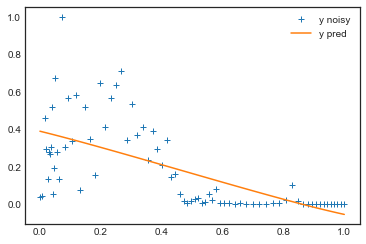

In [271]:
pl.clf()
pl.plot(population_, count_, '+', label='y noisy')
pl.plot(population_, yest, label='y pred')
pl.legend()
pl.show()

# pl.clf()
# pl.plot(population, count, '+', label='y noisy')
# pl.plot(population, yest, label='y pred')
# pl.legend()
# pl.show()

In [273]:
yest_sm = lowess_sm(df2[['population', 'weeks_reporting']], y,frac=.5,it=30)
pl.clf()
pl.plot(df2['population'], y, '+', label='y noisy')
pl.plot(df2['population'], yest_sm, label='y pred')
pl.legend()
pl.show()

ValueError: endog must be a vector

In [267]:
yest_sm

array([[ -4.01527537e+00,  -6.26134566e-01],
       [ -3.85083828e+00,  -6.38340456e-01],
       [ -1.92076352e+00,  -7.67389276e-01],
       [ -1.43362280e+00,  -8.01470804e-01],
       [ -4.60270355e-01,  -8.97811958e-01],
       [  5.20191743e-01,  -9.49852170e-01],
       [  5.23160700e-01,  -9.49709157e-01],
       [  1.35831792e+00,  -9.12325939e-01],
       [  1.88287035e+00,  -8.81432903e-01],
       [  1.93940239e+00,  -8.74629759e-01],
       [  2.35899923e+00,  -8.04371350e-01],
       [  2.50036968e+00,  -7.79661359e-01],
       [  2.53559083e+00,  -7.72314732e-01],
       [  2.56533546e+00,  -7.65725562e-01],
       [  2.66167526e+00,  -7.42217616e-01],
       [  2.94519410e+00,  -6.61646350e-01],
       [  3.07987384e+00,  -6.16932962e-01],
       [  3.14857675e+00,  -5.92528392e-01],
       [  3.17997315e+00,  -5.81174580e-01],
       [  3.22581093e+00,  -5.66651386e-01],
       [  3.43228220e+00,  -4.94970046e-01],
       [  3.58675334e+00,  -4.40217204e-01],
       [  

/opt/anaconda/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:26: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number8.448866e-17
/opt/anaconda/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:26: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number8.633126e-17
/opt/anaconda/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:26: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number7.378394e-17
/opt/anaconda/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:26: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number4.627388e-17
/opt/anaconda/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:26: LinAlgWarning: scipy.li

/opt/anaconda/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:26: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number3.589206e-19
/opt/anaconda/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:26: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number3.002058e-19
/opt/anaconda/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:26: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number2.940089e-19
/opt/anaconda/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:26: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number2.934283e-19
/opt/anaconda/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:26: LinAlgWarning: scipy.li

/opt/anaconda/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:26: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number5.404800e-18
/opt/anaconda/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:26: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number5.537513e-18
/opt/anaconda/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:26: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number3.709369e-18
/opt/anaconda/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:26: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number3.107701e-18
/opt/anaconda/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:26: LinAlgWarning: scipy.li

/opt/anaconda/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:26: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number9.140043e-18
/opt/anaconda/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:26: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number2.493103e-18
/opt/anaconda/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:26: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number9.140044e-18
/opt/anaconda/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:26: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number3.709906e-18


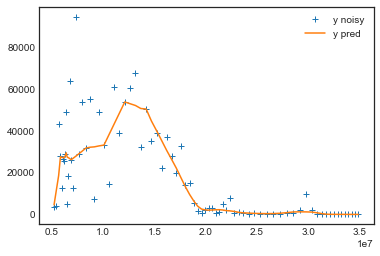

In [84]:
def lowess_ag(x, y, f=2. / 3., iter=30):
    """lowess(x, y, f=2./3., iter=3) -> yest
    Lowess smoother: Robust locally weighted regression.
    The lowess function fits a nonparametric regression curve to a scatterplot.
    The arrays x and y contain an equal number of elements; each pair
    (x[i], y[i]) defines a data point in the scatterplot. The function returns
    the estimated (smooth) values of y.
    The smoothing span is given by f. A larger value for f will result in a
    smoother curve. The number of robustifying iterations is given by iter. The
    function will run faster with a smaller number of iterations.
    """
    n = len(x)
    r = int(ceil(f * n))
    h = [np.sort(np.abs(x - x[i]))[r] for i in range(n)]
    x = x.astype('float')
    w = np.clip(np.abs((x[:, None] - x[None, :]) / h), 0.0, 1.0)
    w = (1 - w ** 3) ** 3
    yest = np.zeros(n)
    delta = np.ones(n)
    for iteration in range(iter):
        for i in range(n):
            weights = delta * w[:, i]
            b = np.array([np.sum(weights * y), np.sum(weights * y * x)])
            A = np.array([[np.sum(weights), np.sum(weights * x)],
                          [np.sum(weights * x), np.sum(weights * x * x)]])
            beta = linalg.solve(A, b)
            yest[i] = beta[0] + beta[1] * x[i]

        residuals = y - yest
        s = np.median(np.abs(residuals))
        delta = np.clip(residuals / (6.0 * s), -1, 1)
        delta = (1 - delta ** 2) ** 2

    return yest


yest = lowess_ag(population, count, .1)

pl.clf()
pl.plot(population, count, '+', label='y noisy')
pl.plot(population, yest, label='y pred')
pl.legend()
pl.show()

In [275]:
population1=scaler.fit_transform(population.reshape(-1,1))

In [ ]:
population1=scaler.fit_transform(population.reshape(-1,1))